#### Load labels

In [6]:
import csv
import sqlite3
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np

# frequently changed variables
key = 'AIexperts' #choose from these choices: inlab, mturk, prolific
folderpath = './plots_elisa/Task3_' + key + '_' #for saving the plots
TextFilePath ='./savedResults_elisa/Task3_' + key + '_'

#if Wage in ["18-20","21-25","26-30","31-35",]: # condition_chosen == age<35
    #    condition_chosen = condition_list[0]
    #if Wage in ["36-40","41-45"]: # condition_chosen == age>35<45
    #    condition_chosen = condition_list[1]
    #if Wage in ["45-50"]:
    #    condition_chosen = condition_list[2]
    #if Wgender in ['female']:
    #    condition_chosen = condition_list[3]
    #if Wgender in ['male']:
    #    condition_chosen = condition_list[4]
    #if Wdegree in ["middle school","high school"]:
    #    condition_chosen = condition_list[5]
    #if Wdegree in ['bachelor']:
    #    condition_chosen = condition_list[6]
    #if Wdegree in ['master','pg']:
    #    condition_chosen = condition_list[7]
    #if Wfield in ['United States']:
    #    condition_chosen = condition_list[8]
    #if Wfield not in ['United States']:
    #    condition_chosen = condition_list[9]
    
# choose condition
condition_list = ['ageL35','ageG35L45','ageG45','F','M','school','bachelor','postgrad','US','nonUS','wGenderQ','woGenderQ']
#,'live','sandbox']

condition_list_criteria = {'ageL35': ["18-20","21-25","26-30","31-35"], 'ageG35L45': ["36-40","41-45"], 
                           'ageG45': ["45-50"],
                           'F': ['female'],'M': ['male'], 'school': ["middle school","high school"],
                           'bachelor':['bachelor'],'postgrad': ['master','pg'], 
                           'US': ['United States'], 'nonUS':['United States'],'wGenderQ':'Agender','woGenderQ':'Agender'}
condition_attribute = {'ageL35':'age','ageG35L45':'age','ageG45':'age',
                       'F' :'gender','M':'gender',
                       'school':'education','bachelor':'education','postgrad':'education',
                       'US':'country','nonUS':'country','wGenderQ':'trialdata', 'woGenderQ':'trialdata'}


### construct ground truth dataframes for total 300 conversations and 8 lengths per conversation

df_labels = pd.read_excel (r'./Data_all/record_conversations_paper.xlsx',engine='openpyxl')
conv_list_Alab = df_labels["Alabel"]
#print(conv_list_Alab)
conv_list_Blab = df_labels["Blabel"]
#print(conv_list_Blab)
conv_list_Aspeaker = df_labels["Aspeaker"]
#print(conv_list_Aspeaker)
conv_list_Bspeaker = df_labels["Bspeaker"]
#print(conv_list_Bspeaker)

# run this cell to reset the results loading
column_names = ["hit id", "hit len", "Alabel", "Aresponse", "Blabel", "Bresponse"]
df_all_res = pd.DataFrame(columns = column_names)


num_conv_tot = 300
len_list = [3,6,9,12,15,18,21,24]
countingRow = 0
for c in range(1,num_conv_tot+1):
    for l in len_list: 
        Alab = conv_list_Alab[c-1]
        if Alab == "Human":
            Alab = "H"
        Blab = conv_list_Blab[c-1]
        if Blab == "Human":
            Blab = "H"
        df_all_res.loc[countingRow] = [c,l,Alab,[],Blab,[]]
        countingRow = countingRow + 1
        #print(df_all_res)
        
#print(df_all_res.loc[1]["Aresponse"])
#print(df_all_res.head())

hit_topic_label = []
for i in range(1,25+1):
    hit_topic_label.append(1)
for i in range(26,50+1):
    hit_topic_label.append(2)
for i in range(51,75+1):
    hit_topic_label.append(3)
for i in range(76,100+1):
    hit_topic_label.append(4)
for i in range(101,125+1):
    hit_topic_label.append(5)
for i in range(126,150+1):
    hit_topic_label.append(1)
for i in range(151,160+1):
    hit_topic_label.append(2)
for i in range(161,170+1):
    hit_topic_label.append(1)
for i in range(171,180+1):
    hit_topic_label.append(2)
for i in range(181,190+1):
    hit_topic_label.append(3)
for i in range(191,200+1):
    hit_topic_label.append(4)
for i in range(201,210+1):
    hit_topic_label.append(5)
for i in range(211,220+1):
    hit_topic_label.append(1)
for i in range(221,230+1):
    hit_topic_label.append(2)
for i in range(231,240+1):
    hit_topic_label.append(3)
for i in range(241,250+1):
    hit_topic_label.append(4)
for i in range(251,260+1):
    hit_topic_label.append(5)
for i in range(261,270+1):
    hit_topic_label.append(1)
for i in range(271,280+1):
    hit_topic_label.append(2)
for i in range(281,290+1):
    hit_topic_label.append(3)
for i in range(291,300+1):
    hit_topic_label.append(4)
    
#print(hit_topic_label)
#print(len(hit_topic_label))

def boostrap(data1, data2):
    import random
    import math
    store = []
    sample_mean = []
    if len(data1) < len(data2):
        SampleTimes = math.ceil(len(data1)/2)
        BootstrapTimes = len(data1)
    else:
        SampleTimes = math.ceil(len(data2)/2)
        BootstrapTimes = len(data2)
        
    print("bootstraptime",BootstrapTimes,"sampletime",SampleTimes)
    for i in range(BootstrapTimes):
        y1 = random.sample(data1, SampleTimes)
        #print(y1)
        y2 = random.sample(data2, SampleTimes)
        #print(y2)
        y_comb = y1+y2
        #print(y_comb)
        sample_mean.append(np.mean(np.array(y_comb), axis=0))
    
    stdval = np.std(np.array(sample_mean), axis=0)
    return stdval

def boostrap_return_mean(data1, data2):
    import random
    import math
    store = []
    sample_mean = []
    if len(data1) < len(data2):
        SampleTimes = math.ceil(len(data1)/2)
        BootstrapTimes = len(data1)
    else:
        SampleTimes = math.ceil(len(data2)/2)
        BootstrapTimes = len(data2)
        
    print("bootstraptime",BootstrapTimes,"sampletime",SampleTimes)
    for i in range(BootstrapTimes):
        y1 = random.sample(data1, SampleTimes)
        #print(y1)
        y2 = random.sample(data2, SampleTimes)
        #print(y2)
        y_comb = y1+y2
        #print(y_comb)
        sample_mean.append(np.mean(np.array(y_comb), axis=0))
    
    stdval = np.std(np.array(sample_mean), axis=0)
    return stdval, sample_mean

In [7]:
# RUN THIS FOR ALL MODELS TOGETHER
# choose condition
#condition_list = ['ageL35','ageG35L45','ageG45','F','M','school','bachelor','postgrad','US','nonUS']
#,'live','sandbox']
            
num_conv = 20
condition_numSubjs = {'ageL35':0,'ageG35L45':0,'ageG45':0,
                       'F' :0,'M':0,
                       'school':0,'bachelor':0,'postgrad':0,
                       'US':0,'nonUS':0,'wGenderQ':0, 'woGenderQ':0}

for condition_chosen in condition_list:
    
    rowidc = [] # stores the indices of the result framework that are changed
    H_responses_all = [] # all cases together
    AI_responses_all = []

    H_inHH_responses_all = [] # for H-H or AI-AI
    AI_inAIAI_responses_all = []

    H_inHAI_responses_all = [] # for H-AI
    AI_inHAI_responses_all = []
    
    cond_cri = condition_list_criteria[condition_chosen]
    cond_attri = condition_attribute[condition_chosen]
    
    #print(cond_cri)
    #print(cond_attri)
    
    worker_accepted = 0
    worker_rejected = 0

    #load the pre-compiled results
    f = open("./savedResults/compiled_elisa_AIexperts_may2.json")
    CompiledResults = json.load(f)
    #key = 'inlab'
    df = CompiledResults[key]
    num_workers = len(df["datastring"])
    flag = 1
    
    for w in range(0,num_workers):

        if w < 2: 
            num_conv = 20
        else:
            num_conv = 30

        #print("")
        #print("#### Worker {} ####".format(w))
        # load worker's data
        #data = json.loads(df["datastring"][w])
        data = df["datastring"][w]
        Wgender = data['questiondata']['gender']
        Wage = data['questiondata']['age']
        Wlanguage = data['questiondata']['native']
        Wdegree = data['questiondata']['education']
        Wfield = data['questiondata']['country']
        #print("% W data",Wgender,Wage,Wlanguage,Wdegree,Wfield)
        # keep a worker only if most of its answers are correct
        thr = 15#15 #CHANGE
        corr = 0     

        flag = 0
        if condition_chosen ==  'nonUS':
            if data['questiondata'][cond_attri] not in cond_cri:
                flag = 1
        elif condition_chosen ==  'wGenderQ':
            if data['data'][1][cond_attri][cond_cri] == 0:
                flag = 0
            else:
                flag = 1
        elif condition_chosen ==  'woGenderQ':
            if data['data'][1][cond_attri][cond_cri] == 0:
                flag = 1
        else:
            if data['questiondata'][cond_attri] in cond_cri:
                flag = 1
        #if Wage in ["18-20","21-25","26-30","31-35",]: # condition_chosen == age<35
        #    condition_chosen = condition_list[0]
        #if Wage in ["36-40","41-45"]: # condition_chosen == age>35<45
        #    condition_chosen = condition_list[1]
        #if Wage in ["45-50"]:
        #    condition_chosen = condition_list[2]
        #if Wgender in ['female']:
        #    condition_chosen = condition_list[3]
        #if Wgender in ['male']:
        #    condition_chosen = condition_list[4]
        #if Wdegree in ["middle school","high school"]:
        #    condition_chosen = condition_list[5]
        #if Wdegree in ['bachelor']:
        #    condition_chosen = condition_list[6]
        #if Wdegree in ['master','pg']:
        #    condition_chosen = condition_list[7]
        #if Wfield in ['United States']:
        #    condition_chosen = condition_list[8]
        #if Wfield not in ['United States']:
        #    condition_chosen = condition_list[9]
    #     if df["mode"][w] in ["live"]:
    #        condition_chosen = condition_list[10]
    #     if df["mode"][w] in ["sandbox"]:
    #         condition_chosen = condition_list[11]

        if flag == 1:
            
            condition_numSubjs[condition_chosen] = condition_numSubjs[condition_chosen] + 1
            
            #print("condition",condition_chosen)
            #print("% W data",Wgender,Wage,Wlanguage,Wdegree,Wfield)

            for c in range(num_conv):
                # load responses to conv1
                conv1_hit = data['data'][c]['trialdata']['hit']
                conv1_topic = data['data'][c]['trialdata']['topic']
                if conv1_topic == str(hit_topic_label[conv1_hit-1]):
                    corr += 1

            if corr >= thr: #and Wlanguage =='yes': 
            #if corr >= thr: 
                worker_accepted += 1
                for c in range(num_conv):
                    # load responses to conv1
                    conv1_hit = data['data'][c]['trialdata']['hit']
                    conv1_len = data['data'][c]['trialdata']['hit_len']
                    conv1_combclass = data['data'][c]['trialdata']['Aclass']
                    #print(conv1_combclass)
                    if conv1_combclass == 'HH':
                        conv1_Aclass = 'H'
                        conv1_Bclass = 'H'
                    elif conv1_combclass == 'HAI':
                        conv1_Aclass = 'H'
                        conv1_Bclass = 'AI'
                    elif conv1_combclass == 'AIH':
                        conv1_Aclass = 'AI'
                        conv1_Bclass = 'H'
                    elif conv1_combclass == 'AIAI':
                        conv1_Aclass = 'AI'
                        conv1_Bclass = 'AI'
                    #conv1_Aclass = data['data'][1+c]['trialdata']['Aclass']
                    #conv1_Bclass = data['data'][1+c]['trialdata']['Bclass']
                    conv1_topic = data['data'][c]['trialdata']['topic']
                    if conv1_topic == str(hit_topic_label[conv1_hit-1]):
                        topic_correct = 'Keep'
                    else:
                        topic_correct = 'Reject'
                    #print(c,"conv:",conv1_hit,conv1_len,conv1_Aclass,conv1_Bclass,conv1_topic,topic_correct)
                    if topic_correct == 'Keep': # CHANGE
                        # compute number of words per conversation
                        path = path = r"/Users/elisapavarino/Documents/Work_Directory/Kreiman_Lab/Turing Test Paper/TuringGithub/conversation/conversation_task_for_revisions/mturk_code/mturk_conversation_paper/static/dataset/"
                        with open(path+'conv'+str(conv1_hit)+'_len'+str(conv1_len)+'.html', encoding="latin-1") as f:
                        #with open('conversations_html/conv'+str(conv1_hit)+'_len'+str(conv1_len)+'.html') as f:
                            lines_conv = f.readlines()
                        tot_words = 0
                        for line in lines_conv[0:-5]:
                            #print(line)
                            tot_words += len(line[6:-5].split())
                        # reaction time
                        conv1_rt = data['data'][c]['trialdata']['rt'] # absolute
                        conv1_rt_norm = conv1_rt/tot_words/1000 # normalized to num of words
                        # only keep conversation if the worker has taken enough time to read it
                        if conv1_rt_norm>=0.1: #0.1 CHANGE
                            # check if correct or not
                            if conv_list_Alab[conv1_hit-1] == 'Human':
                                if conv1_Aclass == 'H':
                                    out = 1 # 1 = correctly classified
                                else:
                                    out = 0 # 0 = incorrectly classified
                                H_responses_all.append(out)
                                if conv_list_Blab[conv1_hit-1] == 'Human':
                                    H_inHH_responses_all.append(out)
                                else:
                                    H_inHAI_responses_all.append(out)
                            elif conv_list_Alab[conv1_hit-1] == 'AI':
                                if conv1_Aclass == 'AI':
                                    out = 1 # 1 = correctly classified
                                else:
                                    out = 0 # 0 = incorrectly classified
                                AI_responses_all.append(out)
                                if conv_list_Blab[conv1_hit-1] == 'AI':
                                    AI_inAIAI_responses_all.append(out)
                                else:
                                    AI_inHAI_responses_all.append(out)
                            if conv_list_Blab[conv1_hit-1] == 'Human':
                                if conv1_Bclass == 'H':
                                    out = 1
                                else:
                                    out = 0
                                H_responses_all.append(out)
                                if conv_list_Alab[conv1_hit-1] == 'Human':
                                    H_inHH_responses_all.append(out)
                                else:
                                    H_inHAI_responses_all.append(out)
                            elif conv_list_Blab[conv1_hit-1] == 'AI':
                                if conv1_Bclass == 'AI':
                                    out = 1
                                else:
                                    out = 0
                                AI_responses_all.append(out)
                                if conv_list_Alab[conv1_hit-1] == 'AI':
                                    AI_inAIAI_responses_all.append(out)
                                else:
                                    AI_inHAI_responses_all.append(out)

            else:
                #print("Worker excluded since there are {} misclassified topics or non native language".format(20-corr))
                worker_rejected += 1
                #print(df["mode"][w])
        else:
                #print("Worker excluded since the subject does not belong to this cateogry")
                worker_rejected += 1
                #print(df["mode"][w])
            
            
    print("==========================================")
    print(condition_chosen)
    print("Workers accepted",worker_accepted)
    print("Workers rejected",worker_rejected)

    ### save all the results
    TextFilePath ='./savedResults_elisa/Task3_' + key + '_'

    #condition_chosen = condition_list[1]
    print('saving results mean')
    filename = TextFilePath + 'HclassH_demo'+condition_chosen+'.txt'
    print('filename',filename)
    np.savetxt(filename,[np.mean(H_responses_all)])

    filename = TextFilePath + 'AIclassAI_demo'+condition_chosen+'.txt'
    np.savetxt(filename,[np.mean(AI_responses_all)])

    filename =  TextFilePath + 'HinHHclassH_demo'+condition_chosen+'.txt'
    np.savetxt(filename,[np.mean(H_inHH_responses_all)])

    filename = TextFilePath +  'AIinAIAIclassAI_demo'+condition_chosen+'.txt'
    np.savetxt(filename,[np.mean(AI_inAIAI_responses_all)])

    filename = TextFilePath +  'HinHAIclassH_demo'+condition_chosen+'.txt'
    np.savetxt(filename,[np.mean(H_inHAI_responses_all)])

    filename =  TextFilePath + 'AIinHAIclassAI_demo'+condition_chosen+'.txt'
    np.savetxt(filename,[np.mean(AI_inHAI_responses_all)])
    ################################################################
    print('saving results not mean')
    filename = TextFilePath + 'HclassH_demo'+condition_chosen+'_acc_per_image.txt'
    print('filename',filename)
    np.savetxt(filename,[H_responses_all])

    filename = TextFilePath + 'AIclassAI_demo'+condition_chosen+'_acc_per_image.txt'
    np.savetxt(filename,[AI_responses_all])

    filename = TextFilePath + 'HinHHclassH_demo'+condition_chosen+'_acc_per_image.txt'
    np.savetxt(filename,[H_inHH_responses_all])

    filename = TextFilePath + 'AIinAIAIclassAI_demo'+condition_chosen+'_acc_per_image.txt'
    np.savetxt(filename,[AI_inAIAI_responses_all])

    filename = TextFilePath + 'HinHAIclassH_demo'+condition_chosen+'_acc_per_image.txt'
    np.savetxt(filename,[H_inHAI_responses_all])

    filename = TextFilePath + 'AIinHAIclassAI_demo'+condition_chosen+'_acc_per_image.txt'
    np.savetxt(filename,[AI_inHAI_responses_all])

    #########################################################################

    # compute bootstrap accuracy
    # compute and save std for top1 accuracy
    top_std_AI = boostrap(H_responses_all, AI_responses_all)
    top_std_AI_inAIAI = boostrap(H_responses_all, AI_inAIAI_responses_all)
    top_std_AI_inHAI = boostrap(H_responses_all, AI_inHAI_responses_all)

    print('saving results')
    filename =  TextFilePath + 'AIclassAI_top1std_demo'+condition_chosen+'.txt'
    np.savetxt(filename,[top_std_AI_inHAI])
    filename =  TextFilePath + 'AIinHAIclassAI_top1std_demo'+condition_chosen+'.txt'
    np.savetxt(filename,[top_std_AI_inHAI])
    filename =  TextFilePath + 'AIinAIAIclassAI_top1std_demo'+condition_chosen+'.txt'
    np.savetxt(filename,[top_std_AI_inAIAI])


print(condition_numSubjs)
#save the compiled results as jason
with open("./savedResults_elisa/Task3_" + key + "_demorStats.json", "w") as fp:
    json.dump(condition_numSubjs,fp) 
    
print('Compilation completed! Results are saved to folder!')

ageL35
Workers accepted 12
Workers rejected 0
saving results mean
filename ./savedResults_elisa/Task3_AIexperts_HclassH_demoageL35.txt
saving results not mean
filename ./savedResults_elisa/Task3_AIexperts_HclassH_demoageL35_acc_per_image.txt
bootstraptime 233 sampletime 117
bootstraptime 233 sampletime 117
bootstraptime 129 sampletime 65
saving results
ageG35L45
Workers accepted 0
Workers rejected 12
saving results mean
filename ./savedResults_elisa/Task3_AIexperts_HclassH_demoageG35L45.txt
saving results not mean
filename ./savedResults_elisa/Task3_AIexperts_HclassH_demoageG35L45_acc_per_image.txt
bootstraptime 0 sampletime 0
bootstraptime 0 sampletime 0
bootstraptime 0 sampletime 0
saving results
ageG45
Workers accepted 0
Workers rejected 12
saving results mean
filename ./savedResults_elisa/Task3_AIexperts_HclassH_demoageG45.txt
saving results not mean
filename ./savedResults_elisa/Task3_AIexperts_HclassH_demoageG45_acc_per_image.txt
bootstraptime 0 sampletime 0
bootstraptime 0 sampl

/Users/elisapavarino/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/elisapavarino/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/elisapavarino/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/elisapavarino/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Users/elisapavarino/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


M
Workers accepted 8
Workers rejected 4
saving results mean
filename ./savedResults_elisa/Task3_AIexperts_HclassH_demoM.txt
saving results not mean
filename ./savedResults_elisa/Task3_AIexperts_HclassH_demoM_acc_per_image.txt
bootstraptime 171 sampletime 86
bootstraptime 166 sampletime 83
bootstraptime 89 sampletime 45
saving results
school
Workers accepted 1
Workers rejected 11
saving results mean
filename ./savedResults_elisa/Task3_AIexperts_HclassH_demoschool.txt
saving results not mean
filename ./savedResults_elisa/Task3_AIexperts_HclassH_demoschool_acc_per_image.txt
bootstraptime 14 sampletime 7
bootstraptime 14 sampletime 7
bootstraptime 10 sampletime 5
saving results
bachelor
Workers accepted 4
Workers rejected 8
saving results mean
filename ./savedResults_elisa/Task3_AIexperts_HclassH_demobachelor.txt
saving results not mean
filename ./savedResults_elisa/Task3_AIexperts_HclassH_demobachelor_acc_per_image.txt
bootstraptime 77 sampletime 39
bootstraptime 74 sampletime 37
bootstra

In [8]:
# RUN THIS FOR SEPARATE MODELS
#condition_list = ['ageL35','ageG35L45','ageG45','F','M','school','bachelor','postgrad','US','nonUS']#,'live','sandbox']

num_conv = 20

for condition_chosen in condition_list:
    
    rowidc = [] # stores the indices of the result framework that are changed
    #for topical chats (only HH)
    Htc_responses_all = [] # all cases together
    #for manual (friends) chats (both HH and H-AI)
    Hf_responses_all = [] # all cases together
    #for Blenderbot (both HH and H-AI)
    AIb_responses_all = []
    #for GPT3davinci (both HH and H-AI)
    AId_responses_all = []
    #for GPT3curie (both HH and H-AI)
    AIc_responses_all = []

    # Hfriend-Hfriend
    Hf_inHH_responses_all = []
    # blenderbot-blenderbot
    AIb_inAIAI_responses_all = []
    # GPT3davinci-GPT3davinci
    AId_inAIAI_responses_all = []
    # GPT3curie-GPT3curie
    AIc_inAIAI_responses_all = []

    # Hfriend - blenderbot 
    Hf_inHAIb_responses_all = [] # for H-AI
    # Hfriend - GPT3davinci 
    Hf_inHAId_responses_all = [] # for H-AI
    # Hfriend - GPT3curie 
    Hf_inHAIc_responses_all = [] # for H-AI

    # blenderbot - friend
    AIb_inHAI_responses_all = []
    # GPT3davinci - friend
    AId_inHAI_responses_all = []
    # GPT3curie - friend
    AIc_inHAI_responses_all = []
    
    cond_cri = condition_list_criteria[condition_chosen]
    cond_attri = condition_attribute[condition_chosen]
    
    #print(cond_cri)
    #print(cond_attri)
    
    worker_accepted = 0
    worker_rejected = 0

    #load the pre-compiled results
    f = open("./savedResults/compiled_elisa_AIexperts_may2.json")
    CompiledResults = json.load(f)
    #key = 'inlab'
    df = CompiledResults[key]
    num_workers = len(df["datastring"])
    
    for w in range(0,num_workers):

        if w < 2: 
            num_conv = 20
        else:
            num_conv = 30
    
        #print("")
        #print("#### Worker {} ####".format(w))
        # load worker's data
        #data = json.loads(df["datastring"][w])
        data = df["datastring"][w]
        Wgender = data['questiondata']['gender']
        Wage = data['questiondata']['age']
        Wlanguage = data['questiondata']['native']
        Wdegree = data['questiondata']['education']
        Wfield = data['questiondata']['country']
        #print("% W data",Wgender,Wage,Wlanguage,Wdegree,Wfield)
        # keep a worker only if most of its answers are correct
        thr = 15#15 #CHANGE
        corr = 0   

    #     if Wage in ["18-20","21-25","26-30","31-35",]: # condition_chosen == age<35
    #         condition_chosen = condition_list[0]
        #if Wage in ["36-40","41-45"]: # condition_chosen == age>35<45
        #    condition_chosen = condition_list[1]
        #if Wage in ["45-50"]:
        #    condition_chosen = condition_list[2]
        #if Wgender in ['female']:
        #    condition_chosen = condition_list[3]
        #if Wgender in ['male']:
        #    condition_chosen = condition_list[4]
        #if Wdegree in ["middle school","high school"]:
        #    condition_chosen = condition_list[5]
        #if Wdegree in ['bachelor']:
        #    condition_chosen = condition_list[6]
        #if Wdegree in ['master','pg']:
        #    condition_chosen = condition_list[7]
        #if Wfield in ['United States']:
        #    condition_chosen = condition_list[8]
        #if Wfield not in ['United States']:
        #    condition_chosen = condition_list[9]
        #if df["mode"][w] in ["live"]:
        #    condition_chosen = condition_list[10]
        #if df["mode"][w] in ["sandbox"]:
        #    condition_chosen = condition_list[11]
        flag = 0
        if condition_chosen ==  'nonUS':
            if data['questiondata'][cond_attri] not in cond_cri:
                flag = 1
        elif condition_chosen ==  'wGenderQ':
            if data['data'][1][cond_attri][cond_cri] == 0:
                flag = 0
            else:
                flag = 1
        elif condition_chosen ==  'woGenderQ':
            if data['data'][1][cond_attri][cond_cri] == 0:
                flag = 1
        else:
            if data['questiondata'][cond_attri] in cond_cri:
                flag = 1
        
        if flag == 1:
            
            #print("condition",condition_chosen)
            #print("% W data",Wgender,Wage,Wlanguage,Wdegree,Wfield)

            for c in range(num_conv):
                # load responses to conv1
                conv1_hit = data['data'][c]['trialdata']['hit']
                conv1_topic = data['data'][c]['trialdata']['topic']
                if conv1_topic == str(hit_topic_label[conv1_hit-1]):
                    corr += 1
            if corr >= thr: #and Wlanguage =='yes': 
            #if corr >= thr: 
                worker_accepted += 1
                for c in range(num_conv):
                    # load responses to conv1
                    conv1_hit = data['data'][c]['trialdata']['hit']
                    conv1_len = data['data'][c]['trialdata']['hit_len']
                    conv1_combclass = data['data'][c]['trialdata']['Aclass']
                    #print(conv1_combclass)
                    if conv1_combclass == 'HH':
                        conv1_Aclass = 'H'
                        conv1_Bclass = 'H'
                    elif conv1_combclass == 'HAI':
                        conv1_Aclass = 'H'
                        conv1_Bclass = 'AI'
                    elif conv1_combclass == 'AIH':
                        conv1_Aclass = 'AI'
                        conv1_Bclass = 'H'
                    elif conv1_combclass == 'AIAI':
                        conv1_Aclass = 'AI'
                        conv1_Bclass = 'AI'
                    conv1_topic = data['data'][c]['trialdata']['topic']
                    if conv1_topic == str(hit_topic_label[conv1_hit-1]):
                        topic_correct = 'Keep'
                    else:
                        topic_correct = 'Reject'
                    #print(c,"conv:",conv1_hit,conv1_len,conv1_Aclass,conv1_Bclass,conv1_topic,topic_correct)
                    if topic_correct == 'Keep': # CHANGE
                        # compute number of words per conversation
                        path = r"/Users/elisapavarino/Documents/Work_Directory/Kreiman_Lab/Turing Test Paper/TuringGithub/conversation/conversation_task_for_revisions/mturk_code/mturk_conversation_paper/static/dataset/"
                        with open(path+'conv'+str(conv1_hit)+'_len'+str(conv1_len)+'.html', encoding="latin-1") as f:
                        #with open('conversations_html/conv'+str(conv1_hit)+'_len'+str(conv1_len)+'.html') as f:
                            lines_conv = f.readlines()
                        tot_words = 0
                        for line in lines_conv[0:-5]:
                            #print(line)
                            tot_words += len(line[6:-5].split())
                        # reaction time
                        conv1_rt = data['data'][c]['trialdata']['rt'] # absolute
                        conv1_rt_norm = conv1_rt/tot_words/1000 # normalized to num of words
                        # only keep conversation if the worker has taken enough time to read it
                        if conv1_rt_norm>=0.1: #0.1 CHANGE
                            #row_index = df_all_res.loc[(df_all_res["hit id"] == conv1_hit) & (df_all_res["hit len"] == conv1_len)].index[0]
                            #df_all_res.loc[row_index, "Aresponse"].append(conv1_Aclass)
                            #df_all_res.loc[row_index, "Bresponse"].append(conv1_Bclass)
                            #rowidc.append(row_index)

                            # check if correct or not
                            if conv_list_Alab[conv1_hit-1] == 'Human':
                                if conv1_Aclass == 'H':
                                    out = 1 # 1 = correctly classified
                                else:
                                    out = 0 # 0 = incorrectly classified
                                H_responses_all.append(out)

                                if conv_list_Aspeaker[conv1_hit-1] == 'Topchat':
                                    Htc_responses_all.append(out)
                                elif conv_list_Aspeaker[conv1_hit-1] == 'Friend':
                                    Hf_responses_all.append(out)
                                if conv_list_Blab[conv1_hit-1] == 'Human' and conv_list_Aspeaker[conv1_hit-1] == 'Friend':
                                    Hf_inHH_responses_all.append(out)
                                else:
                                    if conv_list_Bspeaker[conv1_hit-1] == 'Blenderbot':
                                        Hf_inHAIb_responses_all.append(out)
                                    elif conv_list_Bspeaker[conv1_hit-1] == 'GPT3davinci':
                                        Hf_inHAId_responses_all.append(out)
                                    elif conv_list_Bspeaker[conv1_hit-1] == 'GPT3curie':
                                        Hf_inHAIc_responses_all.append(out)


                            elif conv_list_Alab[conv1_hit-1] == 'AI':
                                if conv1_Aclass == 'AI':
                                    out = 1 # 1 = correctly classified
                                else:
                                    out = 0 # 0 = incorrectly classified
                                if conv_list_Aspeaker[conv1_hit-1] == 'Blenderbot':
                                    AIb_responses_all.append(out)
                                elif conv_list_Aspeaker[conv1_hit-1] == 'GPT3davinci':
                                    AId_responses_all.append(out)
                                elif conv_list_Aspeaker[conv1_hit-1] == 'GPT3curie':
                                    AIc_responses_all.append(out)

                                if conv_list_Blab[conv1_hit-1] == 'AI':
                                    if conv_list_Aspeaker[conv1_hit-1] == 'Blenderbot':
                                        AIb_inAIAI_responses_all.append(out)
                                    elif conv_list_Aspeaker[conv1_hit-1] == 'GPT3davinci':
                                        AId_inAIAI_responses_all.append(out)
                                    elif conv_list_Aspeaker[conv1_hit-1] == 'GPT3curie':
                                        AIc_inAIAI_responses_all.append(out)
                                else:
                                    if conv_list_Aspeaker[conv1_hit-1] == 'Blenderbot':
                                        AIb_inHAI_responses_all.append(out)
                                    elif conv_list_Aspeaker[conv1_hit-1] == 'GPT3davinci':
                                        AId_inHAI_responses_all.append(out)
                                    elif conv_list_Aspeaker[conv1_hit-1] == 'GPT3curie':
                                        AIc_inHAI_responses_all.append(out)

                            if conv_list_Blab[conv1_hit-1] == 'Human':
                                if conv1_Bclass == 'H':
                                    out = 1
                                else:
                                    out = 0
                                H_responses_all.append(out)
                                if conv_list_Bspeaker[conv1_hit-1] == 'Topchat':
                                    Htc_responses_all.append(out)
                                elif conv_list_Bspeaker[conv1_hit-1] == 'Friend':
                                    Hf_responses_all.append(out)


                                if conv_list_Alab[conv1_hit-1] == 'Human':
                                    if conv_list_Bspeaker[conv1_hit-1] == 'Friend':
                                        Hf_inHH_responses_all.append(out)
                                else:
                                    if conv_list_Aspeaker[conv1_hit-1] == 'Blenderbot':
                                        Hf_inHAIb_responses_all.append(out)
                                    elif conv_list_Aspeaker[conv1_hit-1] == 'GPT3davinci':
                                        Hf_inHAId_responses_all.append(out)
                                    elif conv_list_Aspeaker[conv1_hit-1] == 'GPT3curie':
                                        Hf_inHAIc_responses_all.append(out)

                            elif conv_list_Blab[conv1_hit-1] == 'AI':
                                if conv1_Bclass == 'AI':
                                    out = 1
                                else:
                                    out = 0
                                if conv_list_Bspeaker[conv1_hit-1] == 'Blenderbot':
                                    AIb_responses_all.append(out)
                                elif conv_list_Bspeaker[conv1_hit-1] == 'GPT3davinci':
                                    AId_responses_all.append(out)
                                elif conv_list_Bspeaker[conv1_hit-1] == 'GPT3curie':
                                    AIc_responses_all.append(out)

                                if conv_list_Alab[conv1_hit-1] == 'AI':
                                    if conv_list_Bspeaker[conv1_hit-1] == 'Blenderbot':
                                        AIb_inAIAI_responses_all.append(out)
                                    elif conv_list_Bspeaker[conv1_hit-1] == 'GPT3davinci':
                                        AId_inAIAI_responses_all.append(out)
                                    elif conv_list_Bspeaker[conv1_hit-1] == 'GPT3curie':
                                        AIc_inAIAI_responses_all.append(out)
                                else:
                                    if conv_list_Bspeaker[conv1_hit-1] == 'Blenderbot':
                                        AIb_inHAI_responses_all.append(out)
                                    elif conv_list_Bspeaker[conv1_hit-1] == 'GPT3davinci':
                                        AId_inHAI_responses_all.append(out)
                                    elif conv_list_Bspeaker[conv1_hit-1] == 'GPT3curie':
                                        AIc_inHAI_responses_all.append(out)
        
            else:
                    #print("Worker excluded since there are {} misclassified topics or non native language".format(20-corr))
                    worker_rejected += 1
                    #print(df["mode"][w])
        else:
                #print("Worker excluded since the subject does not belong to this cateogry")
                worker_rejected += 1
                #print(df["mode"][w])
            
            
    print("==========================================")
    print(condition_chosen)
    print("Workers accepted",worker_accepted)
    print("Workers rejected",worker_rejected)

    ### save all the results
    TextFilePath ='./savedResults_elisa/Task3_' + key + '_'

    print('saving results')
    filename =  TextFilePath + 'AIbinAIAIclassAI_demo'+condition_chosen+'.txt'
    print(filename)
    np.savetxt(filename,[np.mean(AIb_inAIAI_responses_all)])

    filename =  TextFilePath + 'AIbinHAIclassAI_demo'+condition_chosen+'.txt'
    np.savetxt(filename,[np.mean(AIb_inHAI_responses_all)])

    filename =  TextFilePath + 'AIdinAIAIclassAI_demo'+condition_chosen+'.txt'
    np.savetxt(filename,[np.mean(AId_inAIAI_responses_all)])

    filename =  TextFilePath + 'AIdinHAIclassAI_demo'+condition_chosen+'.txt'
    np.savetxt(filename,[np.mean(AId_inHAI_responses_all)])

    filename =  TextFilePath + 'AIcinAIAIclassAI_demo'+condition_chosen+'.txt'
    np.savetxt(filename,[np.mean(AIc_inAIAI_responses_all)])

    filename =  TextFilePath + 'AIcinHAIclassAI_demo'+condition_chosen+'.txt'
    np.savetxt(filename,[np.mean(AIc_inHAI_responses_all)])

    ##################################################################
    print('saving results - binary')
    filename =  TextFilePath + 'AIbinAIAIclassAI_demo'+condition_chosen+'_acc_per_image.txt'
    print(filename)
    np.savetxt(filename,AIb_inAIAI_responses_all)

    filename =  TextFilePath + 'AIbinHAIclassAI_demo'+condition_chosen+'_acc_per_image.txt'
    np.savetxt(filename,AIb_inHAI_responses_all)

    filename =  TextFilePath + 'AIdinAIAIclassAI_demo'+condition_chosen+'_acc_per_image.txt'
    np.savetxt(filename,AId_inAIAI_responses_all)

    filename =  TextFilePath + 'AIdinHAIclassAI_demo'+condition_chosen+'_acc_per_image.txt'
    np.savetxt(filename,AId_inHAI_responses_all)

    filename =  TextFilePath + 'AIcinAIAIclassAI_demo'+condition_chosen+'_acc_per_image.txt'
    np.savetxt(filename,AIc_inAIAI_responses_all)

    filename =  TextFilePath + 'AIcinHAIclassAI_demo'+condition_chosen+'_acc_per_image.txt'
    np.savetxt(filename,AIc_inHAI_responses_all)

    # compute and save std for top1 accuracy
    top_std_AIb_inAIAI = boostrap(H_responses_all, AIb_inAIAI_responses_all)
    top_std_AIb_inHAI = boostrap(H_responses_all, AIb_inHAI_responses_all)
    top_std_AId_inAIAI = boostrap(H_responses_all, AId_inAIAI_responses_all)
    top_std_AId_inHAI = boostrap(H_responses_all, AId_inHAI_responses_all)
    top_std_AIc_inAIAI = boostrap(H_responses_all, AIc_inAIAI_responses_all)
    top_std_AIc_inHAI = boostrap(H_responses_all, AIc_inHAI_responses_all)

    print('saving results')
    filename =  TextFilePath + 'AIbinHAIclassAI_top1std_demo'+condition_chosen+'.txt'
    np.savetxt(filename,[top_std_AIb_inHAI])
    filename =  TextFilePath + 'AIbinAIAIclassAI_top1std_demo'+condition_chosen+'.txt'
    np.savetxt(filename,[top_std_AIb_inAIAI])
    filename =  TextFilePath + 'AIdinHAIclassAI_top1std_demo'+condition_chosen+'.txt'
    np.savetxt(filename,[top_std_AId_inHAI])
    filename =  TextFilePath + 'AIdinAIAIclassAI_top1std_demo'+condition_chosen+'.txt'
    np.savetxt(filename,[top_std_AId_inAIAI])
    filename =  TextFilePath + 'AIcinHAIclassAI_top1std_demo'+condition_chosen+'.txt'
    np.savetxt(filename,[top_std_AIc_inHAI])
    filename =  TextFilePath + 'AIcinAIAIclassAI_top1std_demo'+condition_chosen+'.txt'
    np.savetxt(filename,[top_std_AIc_inAIAI])



ageL35
Workers accepted 12
Workers rejected 0
saving results
./savedResults_elisa/Task3_AIexperts_AIbinAIAIclassAI_demoageL35.txt
saving results - binary
./savedResults_elisa/Task3_AIexperts_AIbinAIAIclassAI_demoageL35_acc_per_image.txt
bootstraptime 82 sampletime 41
bootstraptime 54 sampletime 27
bootstraptime 70 sampletime 35
bootstraptime 35 sampletime 18
bootstraptime 96 sampletime 48
bootstraptime 40 sampletime 20
saving results
ageG35L45
Workers accepted 0
Workers rejected 12
saving results
./savedResults_elisa/Task3_AIexperts_AIbinAIAIclassAI_demoageG35L45.txt
saving results - binary
./savedResults_elisa/Task3_AIexperts_AIbinAIAIclassAI_demoageG35L45_acc_per_image.txt
bootstraptime 0 sampletime 0
bootstraptime 0 sampletime 0
bootstraptime 0 sampletime 0
bootstraptime 0 sampletime 0
bootstraptime 0 sampletime 0
bootstraptime 0 sampletime 0
saving results
ageG45
Workers accepted 0
Workers rejected 12
saving results
./savedResults_elisa/Task3_AIexperts_AIbinAIAIclassAI_demoageG45.t

#### ELISA without population demographics

In [2]:
import json
import numpy as np
import pandas as pd
import os

# -------------------------------------------
# 1. Load participants
# -------------------------------------------

with open("./savedResults_elisa/compiled_prolific_total.json") as f:
    CompiledResults = json.load(f)

key = 'prolific'
df = CompiledResults[key]
num_workers = len(df["datastring"])

# -------------------------------------------
# 2. Load conversation metadata
# -------------------------------------------
### construct ground truth dataframes for total 300 conversations and 8 lengths per conversation

df_labels = pd.read_excel (r'./Data_all/record_conversations_paper.xlsx',engine='openpyxl')
conv_list_Alab = df_labels["Alabel"]
#print(conv_list_Alab)
conv_list_Blab = df_labels["Blabel"]
#print(conv_list_Blab)
conv_list_Aspeaker = df_labels["Aspeaker"]
#print(conv_list_Aspeaker)
conv_list_Bspeaker = df_labels["Bspeaker"]
#print(conv_list_Bspeaker)

# run this cell to reset the results loading
column_names = ["hit id", "hit len", "Alabel", "Aresponse", "Blabel", "Bresponse"]
df_all_res = pd.DataFrame(columns = column_names)

# -------------------------------------------
# 3. Load hit_topic_label
# (rebuilding it exactly like your code)
# -------------------------------------------

hit_topic_label = []
for i in range(1, 26): hit_topic_label.append(1)
for i in range(26, 51): hit_topic_label.append(2)
for i in range(51, 76): hit_topic_label.append(3)
for i in range(76, 101): hit_topic_label.append(4)
for i in range(101, 126): hit_topic_label.append(5)
for i in range(126, 151): hit_topic_label.append(1)
for i in range(151, 161): hit_topic_label.append(2)
for i in range(161, 171): hit_topic_label.append(1)
for i in range(171, 181): hit_topic_label.append(2)
for i in range(181, 191): hit_topic_label.append(3)
for i in range(191, 201): hit_topic_label.append(4)
for i in range(201, 211): hit_topic_label.append(5)
for i in range(211, 221): hit_topic_label.append(1)
for i in range(221, 231): hit_topic_label.append(2)
for i in range(231, 241): hit_topic_label.append(3)
for i in range(241, 251): hit_topic_label.append(4)
for i in range(251, 261): hit_topic_label.append(5)
for i in range(261, 271): hit_topic_label.append(1)
for i in range(271, 281): hit_topic_label.append(2)
for i in range(281, 291): hit_topic_label.append(3)
for i in range(291, 301): hit_topic_label.append(4)

print(f"Length of hit_topic_label: {len(hit_topic_label)}")

# -------------------------------------------
# 4. Initialize results containers
# -------------------------------------------

H_responses_all = []
AI_responses_all = []
H_inHH_responses_all = []
AI_inAIAI_responses_all = []
H_inHAI_responses_all = []
AI_inHAI_responses_all = []

AIb_inAIAI_responses_all = []
AIb_inHAI_responses_all = []
AId_inAIAI_responses_all = []
AId_inHAI_responses_all = []
AIc_inAIAI_responses_all = []
AIc_inHAI_responses_all = []

num_conv = 32
min_correct_topics = 15
min_catch_accuracy = 0.5
min_rt_per_word = 0.1  # seconds per word

workers_accepted = 0
workers_rejected = 0

# -------------------------------------------
# 5. Loop over participants
# -------------------------------------------

for w in range(num_workers):
    data = df["datastring"][w]
    
    try:
        # if data['questiondata']['native'].lower() != 'yes':
        #     continue  # Skip non-native speakers
        
        trial_entries = [entry for entry in data['data'] if isinstance(entry.get('trialdata'), dict) and 'hit' in entry['trialdata']]
        
        corr = 0
        catch_corr = 0
        total_catch = 0

        for entry in trial_entries:
            trial = entry['trialdata']
            hit = trial['hit']
            topic = trial.get('topic')
            is_catch = trial.get('isCatch', False)

            # Catch trial detection
            if is_catch or (hit > 300):
                total_catch += 1
                if topic == "3":
                    catch_corr += 1
                continue  # skip for topic checking

            if hit <= len(hit_topic_label):
                if str(topic) == str(hit_topic_label[hit-1]):
                    corr += 1

        # Participant acceptance
        if corr >= min_correct_topics and (total_catch == 0 or (catch_corr / total_catch) >= min_catch_accuracy):
            workers_accepted += 1
        else:
            workers_rejected += 1
            continue

        # Process trials
        for entry in trial_entries:
            trial = entry['trialdata']
            hit = trial['hit']
            hit_len = trial['hit_len']
            Aclass = trial['Aclass']
            rt = trial.get('rt', 0)
            topic = trial.get('topic')
            is_catch = trial.get('isCatch', False)

            if is_catch or (hit > 300):
                continue  # Skip catch trials

            # Load conversation text to compute reaction time normalization
            conversation_file = f"/Users/elisapavarino/Documents/Work_Directory/Kreiman_Lab/Turing Test Paper/TuringGithub/conversation/conversation_task_for_revisions/mturk_code/mturk_conversation_paper/static/dataset/conv{hit}_len{hit_len}.html"
            try:
                with open(conversation_file, encoding="latin-1") as f_html:
                    lines = f_html.readlines()
                num_words = sum(len(line.strip()[6:-5].split()) for line in lines[:-5])
            except FileNotFoundError:
                print(f"Missing conversation file: {conversation_file}")
                continue

            if num_words == 0:
                continue

            rt_norm = rt / (num_words * 1000)
            if rt_norm < min_rt_per_word:
                continue

            # Assign labels
            A_label = conv_list_Alab[hit-1]
            A_speaker = conv_list_Aspeaker[hit-1]
            B_label = conv_list_Blab[hit-1]
            B_speaker = conv_list_Bspeaker[hit-1]

            # Speaker A classification
            if A_label == 'Human':
                if Aclass in ['HH', 'HAI']:
                    H_responses_all.append(1)
                    if Aclass == 'HH':
                        H_inHH_responses_all.append(1)
                    elif Aclass == 'HAI':
                        H_inHAI_responses_all.append(1)
                else:
                    H_responses_all.append(0)

            elif A_label == 'AI':
                if Aclass in ['AIAI', 'AIH']:
                    AI_responses_all.append(1)
                    if Aclass == 'AIAI':
                        AI_inAIAI_responses_all.append(1)
                        if A_speaker == 'Blenderbot':
                            AIb_inAIAI_responses_all.append(1)
                        elif A_speaker == 'GPT3davinci':
                            AId_inAIAI_responses_all.append(1)
                        elif A_speaker == 'GPT3curie':
                            AIc_inAIAI_responses_all.append(1)
                    elif Aclass == 'AIH':
                        AI_inHAI_responses_all.append(1)
                        if A_speaker == 'Blenderbot':
                            AIb_inHAI_responses_all.append(1)
                        elif A_speaker == 'GPT3davinci':
                            AId_inHAI_responses_all.append(1)
                        elif A_speaker == 'GPT3curie':
                            AIc_inHAI_responses_all.append(1)
                else:
                    AI_responses_all.append(0)
    except Exception as e:
        print(f"Error with participant {w}: {e}")
        workers_rejected += 1
        continue

# -------------------------------------------
# 6. Compute means and stds
# -------------------------------------------

def safe_mean(x):
    return np.nan if len(x) == 0 else np.mean(x)

def bootstrap(data, num_bootstrap=1000):
    data = np.array(data)
    if len(data) == 0:
        return np.nan
    samples = [np.mean(np.random.choice(data, size=len(data), replace=True)) for _ in range(num_bootstrap)]
    return np.std(samples)

results = {
    'HclassH_demo': H_responses_all,
    'AIclassAI_demo': AI_responses_all,
    'HinHHclassH_demo': H_inHH_responses_all,
    'AIinAIAIclassAI_demo': AI_inAIAI_responses_all,
    'HinHAIclassH_demo': H_inHAI_responses_all,
    'AIinHAIclassAI_demo': AI_inHAI_responses_all,
    'AIbinAIAIclassAI_demo': AIb_inAIAI_responses_all,
    'AIbinHAIclassAI_demo': AIb_inHAI_responses_all,
    'AIdinAIAIclassAI_demo': AId_inAIAI_responses_all,
    'AIdinHAIclassAI_demo': AId_inHAI_responses_all,
    'AIcinAIAIclassAI_demo': AIc_inAIAI_responses_all,
    'AIcinHAIclassAI_demo': AIc_inHAI_responses_all,
}

save_path = './savedResults/Task3_mturk_'
os.makedirs(save_path, exist_ok=True)

for name, data in results.items():
    mean_val = safe_mean(data)
    std_val = bootstrap(data)

    np.savetxt(save_path + name + '.txt', [mean_val])
    np.savetxt(save_path + name.replace('demo', 'top1std_demo') + '.txt', [std_val])

print(f"✅ DONE! Workers accepted: {workers_accepted} | rejected: {workers_rejected}")


Length of hit_topic_label: 300
✅ DONE! Workers accepted: 46 | rejected: 2


In [ ]:
AId_inAIAI_responses_all


In [3]:
import json
import numpy as np
import pandas as pd
import math
import random
import os

# -------------------------------------------
# 1. Define conditions for analyzing all participants together
# -------------------------------------------
condition_list = ['all']
condition_list_criteria = {'all': []}
condition_attribute = {'all': None}

# Initialize counter for all participants
condition_numSubjs = {'all': 0}

# -------------------------------------------
# 2. Load hit_topic_label
# -------------------------------------------
hit_topic_label = []
for i in range(1, 26): hit_topic_label.append(1)
for i in range(26, 51): hit_topic_label.append(2)
for i in range(51, 76): hit_topic_label.append(3)
for i in range(76, 101): hit_topic_label.append(4)
for i in range(101, 126): hit_topic_label.append(5)
for i in range(126, 151): hit_topic_label.append(1)
for i in range(151, 161): hit_topic_label.append(2)
for i in range(161, 171): hit_topic_label.append(1)
for i in range(171, 181): hit_topic_label.append(2)
for i in range(181, 191): hit_topic_label.append(3)
for i in range(191, 201): hit_topic_label.append(4)
for i in range(201, 211): hit_topic_label.append(5)
for i in range(211, 221): hit_topic_label.append(1)
for i in range(221, 231): hit_topic_label.append(2)
for i in range(231, 241): hit_topic_label.append(3)
for i in range(241, 251): hit_topic_label.append(4)
for i in range(251, 261): hit_topic_label.append(5)
for i in range(261, 271): hit_topic_label.append(1)
for i in range(271, 281): hit_topic_label.append(2)
for i in range(281, 291): hit_topic_label.append(3)
for i in range(291, 301): hit_topic_label.append(4)

# -------------------------------------------
# 3. Define boostrap function
# -------------------------------------------
def boostrap(data1, data2):
    import random
    import math
    store = []
    sample_mean = []
    if len(data1) < len(data2):
        SampleTimes = math.ceil(len(data1)/2)
        BootstrapTimes = len(data1)
    else:
        SampleTimes = math.ceil(len(data2)/2)
        BootstrapTimes = len(data2)
        
    print("bootstraptime", BootstrapTimes, "sampletime", SampleTimes)
    for i in range(BootstrapTimes):
        y1 = random.sample(data1, SampleTimes)
        y2 = random.sample(data2, SampleTimes)
        y_comb = y1+y2
        sample_mean.append(np.mean(np.array(y_comb), axis=0))
    
    stdval = np.std(np.array(sample_mean), axis=0)
    return stdval

def boostrap_return_mean(data1, data2):
    import random
    import math
    store = []
    sample_mean = []
    if len(data1) < len(data2):
        SampleTimes = math.ceil(len(data1)/2)
        BootstrapTimes = len(data1)
    else:
        SampleTimes = math.ceil(len(data2)/2)
        BootstrapTimes = len(data2)
        
    print("bootstraptime", BootstrapTimes, "sampletime", SampleTimes)
    for i in range(BootstrapTimes):
        y1 = random.sample(data1, SampleTimes)
        y2 = random.sample(data2, SampleTimes)
        y_comb = y1+y2
        sample_mean.append(np.mean(np.array(y_comb), axis=0))
    
    stdval = np.std(np.array(sample_mean), axis=0)
    return stdval, sample_mean

In [4]:
# -------------------------------------------
# 4. Load ground truth data
# -------------------------------------------
df_labels = pd.read_excel(r'./Data_all/record_conversations_paper.xlsx', engine='openpyxl')
conv_list_Alab = df_labels["Alabel"]
conv_list_Blab = df_labels["Blabel"]
conv_list_Aspeaker = df_labels["Aspeaker"]
conv_list_Bspeaker = df_labels["Bspeaker"]

# Run this cell to reset the results loading
column_names = ["hit id", "hit len", "Alabel", "Aresponse", "Blabel", "Bresponse"]
df_all_res = pd.DataFrame(columns=column_names)


In [5]:
# define ground truth for catch trials

catch_trial_ground_truth = {
    301: {"A": "H", "B": "AI"},
    302: {"A": "AI", "B": "H"},
    303: {"A": "AI", "B": "H"},
    304: {"A": "H", "B": "AI"},
    305: {"A": "H", "B": "AI"}  
}

In [6]:



# -------------------------------------------
# 5. ANALYSIS 1: Combined Models Analysis
# -------------------------------------------
key = 'prolific'  # adjust as needed: inlab, mturk, prolific, AIexperts
num_conv = 32
catch_threshold = 0.5
total_catch = 0
catch_corr = 0

for condition_chosen in condition_list:
    
    rowidc = [] # stores the indices of the result framework that are changed
    H_responses_all = [] # all cases together
    AI_responses_all = []

    H_inHH_responses_all = [] # for H-H or AI-AI
    AI_inAIAI_responses_all = []

    H_inHAI_responses_all = [] # for H-AI
    AI_inHAI_responses_all = []
    
    worker_accepted = 0
    worker_rejected = 0

    # Load the pre-compiled results
    f = open("./savedResults_elisa/compiled_prolific.json") 
    CompiledResults = json.load(f)
    df = CompiledResults[key]
    num_workers = len(df["datastring"])
    
    for w in range(0, num_workers):
        # load worker's data
        data = df["datastring"][w]
        Wgender = data['questiondata']['gender']
        Wage = data['questiondata']['age']
        Wlanguage = data['questiondata']['native']
        Wdegree = data['questiondata']['education']
        Wfield = data['questiondata']['country']
        
        # keep a worker only if most of its answers are correct
        thr = 20  # threshold for correct topic identifications
        corr = 0     

        # Always include all participants (no demographic filtering)
        flag = 1
        
        if flag == 1:
            # Increment participant counter
            condition_numSubjs[condition_chosen] += 1
            
            # Check correct topic identifications
            for c in range(num_conv):
                conv1_hit = data['data'][c]['trialdata']['hit']
                conv1_topic = data['data'][c]['trialdata']['topic']
                is_catch = data['data'][c]['trialdata']['isCatch']

                # Catch trial detection
                if is_catch or (conv1_hit > 300):
                    total_catch += 1
                    if conv1_topic == "3":
                        catch_corr += 1

                    # check out if they actually got the identity of A and B correct (topic is not enough)
                    
                    continue  # skip for topic checking


                if conv1_topic == str(hit_topic_label[conv1_hit-1]):
                    corr += 1

            # Only accept participants who meet quality criteria
            if corr >= thr and Wlanguage == 'yes' and (total_catch == 0 or catch_corr / total_catch >= catch_threshold): 
                worker_accepted += 1
                for c in range(num_conv):
                    # load responses to conv1
                    conv1_hit = data['data'][c]['trialdata']['hit']
                    conv1_len = data['data'][c]['trialdata']['hit_len']
                    conv1_combclass = data['data'][c]['trialdata']['Aclass']

                    # Skip out-of-bounds hit IDs (catch trials 301-305)
                    if not conv1_hit or int(conv1_hit) > len(conv_list_Alab) or int(conv1_hit) > len(hit_topic_label):
                        print(f"Skipping out-of-bounds hit ID: {conv1_hit}")
                        continue
                    
                    # Skip catch trials
                    if is_catch:
                        continue
                    
                    # Parse the conversation classes
                    if conv1_combclass == 'HH':
                        conv1_Aclass = 'H'
                        conv1_Bclass = 'H'
                    elif conv1_combclass == 'HAI':
                        conv1_Aclass = 'H'
                        conv1_Bclass = 'AI'
                    elif conv1_combclass == 'AIH':
                        conv1_Aclass = 'AI'
                        conv1_Bclass = 'H'
                    elif conv1_combclass == 'AIAI':
                        conv1_Aclass = 'AI'
                        conv1_Bclass = 'AI'
                        
                    # Check if topic was correctly identified
                    conv1_topic = data['data'][c]['trialdata']['topic']

                    if conv1_topic == str(hit_topic_label[conv1_hit-1]):
                        topic_correct = 'Keep'
                    else:
                        topic_correct = 'Reject'
                        
                    if topic_correct == 'Keep':
                        # compute number of words per conversation
                        path = './mturk_code/mturk_conversation_paper/static/dataset/'
                        try:
                            with open(path+'conv'+str(conv1_hit)+'_len'+str(conv1_len)+'.html', encoding="latin-1") as f:
                                lines_conv = f.readlines()
                            tot_words = 0
                            for line in lines_conv[0:-5]:
                                tot_words += len(line[6:-5].split())
                                
                            # Calculate normalized reaction time
                            conv1_rt = data['data'][c]['trialdata']['rt']  # absolute
                            conv1_rt_norm = conv1_rt/tot_words/1000  # normalized to num of words
                            
                            # Only keep conversation if the worker has taken enough time to read it
                            if conv1_rt_norm >= 0.1:
                                # Check if correct or not for Speaker A
                                if conv_list_Alab[conv1_hit-1] == 'Human':
                                    if conv1_Aclass == 'H':
                                        out = 1  # 1 = correctly classified
                                    else:
                                        out = 0  # 0 = incorrectly classified
                                    H_responses_all.append(out)
                                    if conv_list_Blab[conv1_hit-1] == 'Human':
                                        H_inHH_responses_all.append(out)
                                    else:
                                        H_inHAI_responses_all.append(out)
                                        
                                elif conv_list_Alab[conv1_hit-1] == 'AI':
                                    if conv1_Aclass == 'AI':
                                        out = 1  # 1 = correctly classified
                                    else:
                                        out = 0  # 0 = incorrectly classified
                                    AI_responses_all.append(out)
                                    if conv_list_Blab[conv1_hit-1] == 'AI':
                                        AI_inAIAI_responses_all.append(out)
                                    else:
                                        AI_inHAI_responses_all.append(out)
                                
                                # Check if correct or not for Speaker B
                                if conv_list_Blab[conv1_hit-1] == 'Human':
                                    if conv1_Bclass == 'H':
                                        out = 1
                                    else:
                                        out = 0
                                    H_responses_all.append(out)
                                    if conv_list_Alab[conv1_hit-1] == 'Human':
                                        H_inHH_responses_all.append(out)
                                    else:
                                        H_inHAI_responses_all.append(out)
                                        
                                elif conv_list_Blab[conv1_hit-1] == 'AI':
                                    if conv1_Bclass == 'AI':
                                        out = 1
                                    else:
                                        out = 0
                                    AI_responses_all.append(out)
                                    if conv_list_Alab[conv1_hit-1] == 'AI':
                                        AI_inAIAI_responses_all.append(out)
                                    else:
                                        AI_inHAI_responses_all.append(out)
                        except:
                            print(f"Error processing conversation: conv{conv1_hit}_len{conv1_len}.html")
            else:
                worker_rejected += 1
        else:
            worker_rejected += 1
            
    print("==========================================")
    print("All participants")
    print("Workers accepted", worker_accepted)
    print("Workers rejected", worker_rejected)

    # Save results
    TextFilePath = './savedResults_elisa/Task3_' + key + '_'
    
    print('saving results mean')
    filename = TextFilePath + 'HclassH_all.txt'
    print('filename', filename)
    np.savetxt(filename, [np.mean(H_responses_all)])

    filename = TextFilePath + 'AIclassAI_all.txt'
    np.savetxt(filename, [np.mean(AI_responses_all)])

    filename = TextFilePath + 'HinHHclassH_all.txt'
    np.savetxt(filename, [np.mean(H_inHH_responses_all)])

    filename = TextFilePath + 'AIinAIAIclassAI_all.txt'
    np.savetxt(filename, [np.mean(AI_inAIAI_responses_all)])

    filename = TextFilePath + 'HinHAIclassH_all.txt'
    np.savetxt(filename, [np.mean(H_inHAI_responses_all)])

    filename = TextFilePath + 'AIinHAIclassAI_all.txt'
    np.savetxt(filename, [np.mean(AI_inHAI_responses_all)])
    
    # Save raw results (not mean)
    print('saving results not mean')
    filename = TextFilePath + 'HclassH_all_acc_per_image.txt'
    print('filename', filename)
    np.savetxt(filename, [H_responses_all])

    filename = TextFilePath + 'AIclassAI_all_acc_per_image.txt'
    np.savetxt(filename, [AI_responses_all])

    filename = TextFilePath + 'HinHHclassH_all_acc_per_image.txt'
    np.savetxt(filename, [H_inHH_responses_all])

    filename = TextFilePath + 'AIinAIAIclassAI_all_acc_per_image.txt'
    np.savetxt(filename, [AI_inAIAI_responses_all])

    filename = TextFilePath + 'HinHAIclassH_all_acc_per_image.txt'
    np.savetxt(filename, [H_inHAI_responses_all])

    filename = TextFilePath + 'AIinHAIclassAI_all_acc_per_image.txt'
    np.savetxt(filename, [AI_inHAI_responses_all])

    # Compute bootstrap accuracy
    top_std_AI = boostrap(H_responses_all, AI_responses_all)
    top_std_AI_inAIAI = boostrap(H_responses_all, AI_inAIAI_responses_all)
    top_std_AI_inHAI = boostrap(H_responses_all, AI_inHAI_responses_all)

    print('saving results')
    filename = TextFilePath + 'AIclassAI_top1std_all.txt'
    np.savetxt(filename, [top_std_AI_inHAI])
    filename = TextFilePath + 'AIinHAIclassAI_top1std_all.txt'
    np.savetxt(filename, [top_std_AI_inHAI])
    filename = TextFilePath + 'AIinAIAIclassAI_top1std_all.txt'
    np.savetxt(filename, [top_std_AI_inAIAI])


Skipping out-of-bounds hit ID: 304
Skipping out-of-bounds hit ID: 301
Skipping out-of-bounds hit ID: 302
Skipping out-of-bounds hit ID: 304
Skipping out-of-bounds hit ID: 302
Skipping out-of-bounds hit ID: 301
Skipping out-of-bounds hit ID: 304
Skipping out-of-bounds hit ID: 302
Skipping out-of-bounds hit ID: 301
Skipping out-of-bounds hit ID: 301
Skipping out-of-bounds hit ID: 304
Skipping out-of-bounds hit ID: 302
Skipping out-of-bounds hit ID: 302
Skipping out-of-bounds hit ID: 301
Skipping out-of-bounds hit ID: 304
Skipping out-of-bounds hit ID: 302
Skipping out-of-bounds hit ID: 304
Skipping out-of-bounds hit ID: 301
Skipping out-of-bounds hit ID: 302
Skipping out-of-bounds hit ID: 301
Skipping out-of-bounds hit ID: 304
Skipping out-of-bounds hit ID: 304
Skipping out-of-bounds hit ID: 302
Skipping out-of-bounds hit ID: 301
Skipping out-of-bounds hit ID: 301
Skipping out-of-bounds hit ID: 304
Skipping out-of-bounds hit ID: 302
Skipping out-of-bounds hit ID: 301
Skipping out-of-boun

In [10]:
# -------------------------------------------
# 6. ANALYSIS 2: Analysis by AI Model
# -------------------------------------------

import json
import numpy as np
import pandas as pd
import math
import random
import os

condition_list = ['all']
condition_list_criteria = {'all': []}
condition_attribute = {'all': None}

# Initialize counter for all participants
condition_numSubjs = {'all': 0}

total_valid_trials = 0

key = 'prolific'

for condition_chosen in condition_list:
    
    #include for all human responses
    H_responses_all = []

    rowidc = [] # stores the indices of the result framework that are changed
    # for topical chats (only HH)
    Htc_responses_all = [] # all cases together
    # for manual (friends) chats (both HH and H-AI)
    Hf_responses_all = [] # all cases together
    # for Blenderbot (both HH and H-AI)
    AIb_responses_all = []
    # for GPT3davinci (both HH and H-AI)
    AId_responses_all = []
    # for GPT3curie (both HH and H-AI)
    AIc_responses_all = []

    # Hfriend-Hfriend
    Hf_inHH_responses_all = []
    # blenderbot-blenderbot
    AIb_inAIAI_responses_all = []
    # GPT3davinci-GPT3davinci
    AId_inAIAI_responses_all = []
    # GPT3curie-GPT3curie
    AIc_inAIAI_responses_all = []

    # Hfriend - blenderbot 
    Hf_inHAIb_responses_all = [] # for H-AI
    # Hfriend - GPT3davinci 
    Hf_inHAId_responses_all = [] # for H-AI
    # Hfriend - GPT3curie 
    Hf_inHAIc_responses_all = [] # for H-AI

    # blenderbot - friend
    AIb_inHAI_responses_all = []
    # GPT3davinci - friend
    AId_inHAI_responses_all = []
    # GPT3curie - friend
    AIc_inHAI_responses_all = []
    
    worker_accepted = 0
    worker_rejected = 0

    # Load the pre-compiled results
    f = open("./savedResults_elisa/compiled_prolific_total.json")  # Use your JSON filename
    CompiledResults = json.load(f)
    df = CompiledResults[key]
    num_workers = len(df["datastring"])
    
    for w in range(0, num_workers):
        # load worker's data
        data = df["datastring"][w]
        Wgender = data['questiondata']['gender']
        Wage = data['questiondata']['age']
        Wlanguage = data['questiondata']['native']
        Wdegree = data['questiondata']['education']
        Wfield = data['questiondata']['country']
        
        # keep a worker only if most of its answers are correct
        thr = 20
        corr = 0   
        catch_corr = 0
        total_catch = 0
        num_conv = 32
        catch_threshold = 1

        # Always include all participants (no demographic filtering)
        flag = 1
        
        if flag == 1:
            # Count correctly identified topics
            for c in range(num_conv):
                conv1_hit = data['data'][c]['trialdata']['hit']
                conv1_topic = data['data'][c]['trialdata']['topic']
                is_catch = data['data'][c]['trialdata']['isCatch']

                # Catch trial detection
                if is_catch or (conv1_hit > 300):
                    total_catch += 1
                    if conv1_topic == "3":
                        catch_corr += 1
                    continue  # skip for topic checking

                if conv1_topic == str(hit_topic_label[conv1_hit-1]):
                    corr += 1
                    
            # Only accept participants who meet quality criteria
            if corr >= thr and Wlanguage == 'yes': #and (total_catch == 0 or catch_corr / total_catch >= catch_threshold): 
                worker_accepted += 1
                for c in range(num_conv):
                    # load responses to conv1
                    conv1_hit = data['data'][c]['trialdata']['hit']
                    conv1_len = data['data'][c]['trialdata']['hit_len']
                    conv1_combclass = data['data'][c]['trialdata']['Aclass']
                    
                    # Parse the conversation classes
                    if conv1_combclass == 'HH':
                        conv1_Aclass = 'H'
                        conv1_Bclass = 'H'
                    elif conv1_combclass == 'HAI':
                        conv1_Aclass = 'H'
                        conv1_Bclass = 'AI'
                    elif conv1_combclass == 'AIH':
                        conv1_Aclass = 'AI'
                        conv1_Bclass = 'H'
                    elif conv1_combclass == 'AIAI':
                        conv1_Aclass = 'AI'
                        conv1_Bclass = 'AI'
                        
                    # Check if topic was correctly identified
                    conv1_topic = data['data'][c]['trialdata']['topic']

                    # Skip out-of-bounds hit IDs (catch trials 301-305)
                    if not conv1_hit or int(conv1_hit) > len(conv_list_Alab) or int(conv1_hit) > len(hit_topic_label):
                        print(f"Skipping out-of-bounds hit ID: {conv1_hit}")
                        continue
                    
                    # Skip catch trials
                    if is_catch:
                        continue
                    if conv1_topic == str(hit_topic_label[conv1_hit-1]):
                        topic_correct = 'Keep'
                    else:
                        topic_correct = 'Reject'
                        
                    if topic_correct == 'Keep':
                        total_valid_trials += 1
                        # compute number of words per conversation
                        path = './mturk_code/mturk_conversation_paper/static/dataset/'
                        try:
                            with open(path+'conv'+str(conv1_hit)+'_len'+str(conv1_len)+'.html', encoding="latin-1") as f:
                                lines_conv = f.readlines()
                            tot_words = 0
                            for line in lines_conv[0:-5]:
                                tot_words += len(line[6:-5].split())
                                
                            # Calculate normalized reaction time
                            conv1_rt = data['data'][c]['trialdata']['rt']  # absolute
                            conv1_rt_norm = conv1_rt/tot_words/1000  # normalized to num of words
                            
                            # Only keep conversation if the worker has taken enough time to read it
                            if conv1_rt_norm >= 0.1:
                                # check if correct or not for Speaker A
                                if conv_list_Alab[conv1_hit-1] == 'Human':
                                    if conv1_Aclass == 'H':
                                        out = 1  # 1 = correctly classified
                                    else:
                                        out = 0  # 0 = incorrectly classified
                                    H_responses_all.append(out)

                                    if conv_list_Aspeaker[conv1_hit-1] == 'Topchat':
                                        Htc_responses_all.append(out)
                                    elif conv_list_Aspeaker[conv1_hit-1] == 'Friend':
                                        Hf_responses_all.append(out)
                                    if conv_list_Blab[conv1_hit-1] == 'Human' and conv_list_Aspeaker[conv1_hit-1] == 'Friend':
                                        Hf_inHH_responses_all.append(out)
                                    else:
                                        if conv_list_Bspeaker[conv1_hit-1] == 'Blenderbot':
                                            Hf_inHAIb_responses_all.append(out)
                                        elif conv_list_Bspeaker[conv1_hit-1] == 'GPT3davinci':
                                            Hf_inHAId_responses_all.append(out)
                                        elif conv_list_Bspeaker[conv1_hit-1] == 'GPT3curie':
                                            Hf_inHAIc_responses_all.append(out)

                                elif conv_list_Alab[conv1_hit-1] == 'AI':
                                    if conv1_Aclass == 'AI':
                                        out = 1  # 1 = correctly classified
                                    else:
                                        out = 0  # 0 = incorrectly classified
                                    if conv_list_Aspeaker[conv1_hit-1] == 'Blenderbot':
                                        AIb_responses_all.append(out)
                                    elif conv_list_Aspeaker[conv1_hit-1] == 'GPT3davinci':
                                        AId_responses_all.append(out)
                                    elif conv_list_Aspeaker[conv1_hit-1] == 'GPT3curie':
                                        AIc_responses_all.append(out)

                                    if conv_list_Blab[conv1_hit-1] == 'AI':
                                        if conv_list_Aspeaker[conv1_hit-1] == 'Blenderbot':
                                            AIb_inAIAI_responses_all.append(out)
                                        elif conv_list_Aspeaker[conv1_hit-1] == 'GPT3davinci':
                                            AId_inAIAI_responses_all.append(out)
                                        elif conv_list_Aspeaker[conv1_hit-1] == 'GPT3curie':
                                            AIc_inAIAI_responses_all.append(out)
                                    else:
                                        if conv_list_Aspeaker[conv1_hit-1] == 'Blenderbot':
                                            AIb_inHAI_responses_all.append(out)
                                        elif conv_list_Aspeaker[conv1_hit-1] == 'GPT3davinci':
                                            AId_inHAI_responses_all.append(out)
                                        elif conv_list_Aspeaker[conv1_hit-1] == 'GPT3curie':
                                            AIc_inHAI_responses_all.append(out)

                                # Check if correct or not for Speaker B
                                if conv_list_Blab[conv1_hit-1] == 'Human':
                                    if conv1_Bclass == 'H':
                                        out = 1
                                    else:
                                        out = 0
                                    H_responses_all.append(out)
                                    if conv_list_Bspeaker[conv1_hit-1] == 'Topchat':
                                        Htc_responses_all.append(out)
                                    elif conv_list_Bspeaker[conv1_hit-1] == 'Friend':
                                        Hf_responses_all.append(out)

                                    if conv_list_Alab[conv1_hit-1] == 'Human':
                                        if conv_list_Bspeaker[conv1_hit-1] == 'Friend':
                                            Hf_inHH_responses_all.append(out)
                                    else:
                                        if conv_list_Aspeaker[conv1_hit-1] == 'Blenderbot':
                                            Hf_inHAIb_responses_all.append(out)
                                        elif conv_list_Aspeaker[conv1_hit-1] == 'GPT3davinci':
                                            Hf_inHAId_responses_all.append(out)
                                        elif conv_list_Aspeaker[conv1_hit-1] == 'GPT3curie':
                                            Hf_inHAIc_responses_all.append(out)

                                elif conv_list_Blab[conv1_hit-1] == 'AI':
                                    if conv1_Bclass == 'AI':
                                        out = 1
                                    else:
                                        out = 0
                                    if conv_list_Bspeaker[conv1_hit-1] == 'Blenderbot':
                                        AIb_responses_all.append(out)
                                    elif conv_list_Bspeaker[conv1_hit-1] == 'GPT3davinci':
                                        AId_responses_all.append(out)
                                    elif conv_list_Bspeaker[conv1_hit-1] == 'GPT3curie':
                                        AIc_responses_all.append(out)

                                    if conv_list_Alab[conv1_hit-1] == 'AI':
                                        if conv_list_Bspeaker[conv1_hit-1] == 'Blenderbot':
                                            AIb_inAIAI_responses_all.append(out)
                                        elif conv_list_Bspeaker[conv1_hit-1] == 'GPT3davinci':
                                            AId_inAIAI_responses_all.append(out)
                                        elif conv_list_Bspeaker[conv1_hit-1] == 'GPT3curie':
                                            AIc_inAIAI_responses_all.append(out)
                                    else:
                                        if conv_list_Bspeaker[conv1_hit-1] == 'Blenderbot':
                                            AIb_inHAI_responses_all.append(out)
                                        elif conv_list_Bspeaker[conv1_hit-1] == 'GPT3davinci':
                                            AId_inHAI_responses_all.append(out)
                                        elif conv_list_Bspeaker[conv1_hit-1] == 'GPT3curie':
                                            AIc_inHAI_responses_all.append(out)
                        except:
                            print(f"Error processing conversation: conv{conv1_hit}_len{conv1_len}.html")
            else:
                worker_rejected += 1
        else:
            worker_rejected += 1
            
    print("==========================================")
    print("All participants")
    print("Workers accepted", worker_accepted)
    print("Workers rejected", worker_rejected)
    print("Number of valid trials", total_valid_trials)

    # Save results
    TextFilePath = './savedResults_elisa/Task3_' + key + '_'

    print('saving results')
    filename = TextFilePath + 'AIbinAIAIclassAI_all.txt'
    print(filename)
    np.savetxt(filename, [np.mean(AIb_inAIAI_responses_all)])

    filename = TextFilePath + 'AIbinHAIclassAI_all.txt'
    np.savetxt(filename, [np.mean(AIb_inHAI_responses_all)])

    filename = TextFilePath + 'AIdinAIAIclassAI_all.txt'
    np.savetxt(filename, [np.mean(AId_inAIAI_responses_all)])

    filename = TextFilePath + 'AIdinHAIclassAI_all.txt'
    np.savetxt(filename, [np.mean(AId_inHAI_responses_all)])

    filename = TextFilePath + 'AIcinAIAIclassAI_all.txt'
    np.savetxt(filename, [np.mean(AIc_inAIAI_responses_all)])

    filename = TextFilePath + 'AIcinHAIclassAI_all.txt'
    np.savetxt(filename, [np.mean(AIc_inHAI_responses_all)])

    # Save raw results
    print('saving results - binary')
    filename = TextFilePath + 'AIbinAIAIclassAI_all_acc_per_image.txt'
    print(filename)
    np.savetxt(filename, AIb_inAIAI_responses_all)

    filename = TextFilePath + 'AIbinHAIclassAI_all_acc_per_image.txt'
    np.savetxt(filename, AIb_inHAI_responses_all)

    filename = TextFilePath + 'AIdinAIAIclassAI_all_acc_per_image.txt'
    np.savetxt(filename, AId_inAIAI_responses_all)

    filename = TextFilePath + 'AIdinHAIclassAI_all_acc_per_image.txt'
    np.savetxt(filename, (AId_inHAI_responses_all))

    filename = TextFilePath + 'AIcinAIAIclassAI_all_acc_per_image.txt'
    np.savetxt(filename, (AIc_inAIAI_responses_all))

    filename = TextFilePath + 'AIcinHAIclassAI_all_acc_per_image.txt'
    np.savetxt(filename, (AIc_inHAI_responses_all))


    # compute and save std for top1 accuracy
    top_std_AIb_inAIAI = boostrap(H_responses_all, AIb_inAIAI_responses_all)
    top_std_AIb_inHAI = boostrap(H_responses_all, AIb_inHAI_responses_all)
    top_std_AId_inAIAI = boostrap(H_responses_all, AId_inAIAI_responses_all)
    top_std_AId_inHAI = boostrap(H_responses_all, AId_inHAI_responses_all)
    top_std_AIc_inAIAI = boostrap(H_responses_all, AIc_inAIAI_responses_all)
    top_std_AIc_inHAI = boostrap(H_responses_all, AIc_inHAI_responses_all)

    print('saving results')
    filename =  TextFilePath + 'AIbinHAIclassAI_top1std.txt'
    np.savetxt(filename,[top_std_AIb_inHAI])
    filename =  TextFilePath + 'AIbinAIAIclassAI_top1std.txt'
    np.savetxt(filename,[top_std_AIb_inAIAI])
    filename =  TextFilePath + 'AIdinHAIclassAI_top1std.txt'
    np.savetxt(filename,[top_std_AId_inHAI])
    filename =  TextFilePath + 'AIdinAIAIclassAI_top1std.txt'
    np.savetxt(filename,[top_std_AId_inAIAI])
    filename =  TextFilePath + 'AIcinHAIclassAI_top1std.txt'
    np.savetxt(filename,[top_std_AIc_inHAI])
    filename =  TextFilePath + 'AIcinAIAIclassAI_top1std.txt'
    np.savetxt(filename,[top_std_AIc_inAIAI])

Skipping out-of-bounds hit ID: 304
Skipping out-of-bounds hit ID: 301
Skipping out-of-bounds hit ID: 302
Skipping out-of-bounds hit ID: 304
Skipping out-of-bounds hit ID: 302
Skipping out-of-bounds hit ID: 301
Skipping out-of-bounds hit ID: 304
Skipping out-of-bounds hit ID: 302
Skipping out-of-bounds hit ID: 301
Skipping out-of-bounds hit ID: 301
Skipping out-of-bounds hit ID: 304
Skipping out-of-bounds hit ID: 302
Skipping out-of-bounds hit ID: 302
Skipping out-of-bounds hit ID: 301
Skipping out-of-bounds hit ID: 304
Skipping out-of-bounds hit ID: 302
Skipping out-of-bounds hit ID: 304
Skipping out-of-bounds hit ID: 301
Skipping out-of-bounds hit ID: 302
Skipping out-of-bounds hit ID: 301
Skipping out-of-bounds hit ID: 304
Skipping out-of-bounds hit ID: 304
Skipping out-of-bounds hit ID: 302
Skipping out-of-bounds hit ID: 301
Skipping out-of-bounds hit ID: 301
Skipping out-of-bounds hit ID: 304
Skipping out-of-bounds hit ID: 302
Skipping out-of-bounds hit ID: 301
Skipping out-of-boun

# Now repeat, but separating out the trials that have feedback, from the ones that don't

## With feedback trials

In [8]:



# -------------------------------------------
# 5. ANALYSIS 1: Combined Models Analysis
# -------------------------------------------
key = 'prolific'  # adjust as needed: inlab, mturk, prolific
num_conv = 32
catch_threshold = 0.5
total_catch = 0
catch_corr = 0
total_valid_trials = 0

for condition_chosen in condition_list:
    
    rowidc = [] # stores the indices of the result framework that are changed
    H_responses_all = [] # all cases together
    AI_responses_all = []

    H_inHH_responses_all = [] # for H-H or AI-AI
    AI_inAIAI_responses_all = []

    H_inHAI_responses_all = [] # for H-AI
    AI_inHAI_responses_all = []
    
    worker_accepted = 0
    worker_rejected = 0

    # Load the pre-compiled results
    f = open("./savedResults_elisa/compiled_prolific_total.json") 
    CompiledResults = json.load(f)
    df = CompiledResults[key]
    num_workers = len(df["datastring"])
    
    for w in range(0, num_workers):
        # load worker's data
        data = df["datastring"][w]
        Wgender = data['questiondata']['gender']
        Wage = data['questiondata']['age']
        Wlanguage = data['questiondata']['native']
        Wdegree = data['questiondata']['education']
        Wfield = data['questiondata']['country']
        
        # keep a worker only if most of its answers are correct
        thr = 20  # threshold for correct topic identifications
        corr = 0     

        # Always include all participants (no demographic filtering)
        flag = 1
        
        if flag == 1:
            # Increment participant counter
            condition_numSubjs[condition_chosen] += 1
            
            # Check correct topic identifications
            for c in range(num_conv):
                conv1_hit = data['data'][c]['trialdata']['hit']
                conv1_topic = data['data'][c]['trialdata']['topic']
                is_catch = data['data'][c]['trialdata']['isCatch']

                # Catch trial detection
                if is_catch or (conv1_hit > 300):
                    total_catch += 1
                    if conv1_topic == "3":
                        catch_corr += 1
                    continue  # skip for topic checking


                if conv1_topic == str(hit_topic_label[conv1_hit-1]):
                    corr += 1

            # Only accept participants who meet quality criteria
            if corr >= thr and Wlanguage == 'yes' and (total_catch == 0 or catch_corr / total_catch >= catch_threshold): 
                worker_accepted += 1
                for c in range(num_conv):
                    # load responses to conv1
                    conv1_hit = data['data'][c]['trialdata']['hit']
                    conv1_len = data['data'][c]['trialdata']['hit_len']
                    conv1_combclass = data['data'][c]['trialdata']['Aclass']

                    # Skip out-of-bounds hit IDs (catch trials 301-305)
                    if not conv1_hit or int(conv1_hit) > len(conv_list_Alab) or int(conv1_hit) > len(hit_topic_label):
                        print(f"Skipping out-of-bounds hit ID: {conv1_hit}")
                        continue
                    
                    # Skip catch trials
                    if is_catch:
                        continue
                    
                    # Parse the conversation classes
                    if conv1_combclass == 'HH':
                        conv1_Aclass = 'H'
                        conv1_Bclass = 'H'
                    elif conv1_combclass == 'HAI':
                        conv1_Aclass = 'H'
                        conv1_Bclass = 'AI'
                    elif conv1_combclass == 'AIH':
                        conv1_Aclass = 'AI'
                        conv1_Bclass = 'H'
                    elif conv1_combclass == 'AIAI':
                        conv1_Aclass = 'AI'
                        conv1_Bclass = 'AI'
                        
                    # Check if topic was correctly identified
                    conv1_topic = data['data'][c]['trialdata']['topic']

                    if conv1_topic == str(hit_topic_label[conv1_hit-1]):
                        topic_correct = 'Keep'
                    else:
                        topic_correct = 'Reject'
                        
                    if topic_correct == 'Keep':
                        if data['data'][c]['trialdata']['hasFeedback']:
                            total_valid_trials += 1
                            # compute number of words per conversation
                            path = './mturk_code/mturk_conversation_paper/static/dataset/'
                            try:
                                with open(path+'conv'+str(conv1_hit)+'_len'+str(conv1_len)+'.html', encoding="latin-1") as f:
                                    lines_conv = f.readlines()
                                tot_words = 0
                                for line in lines_conv[0:-5]:
                                    tot_words += len(line[6:-5].split())
                                    
                                # Calculate normalized reaction time
                                conv1_rt = data['data'][c]['trialdata']['rt']  # absolute
                                conv1_rt_norm = conv1_rt/tot_words/1000  # normalized to num of words
                                
                                # Only keep conversation if the worker has taken enough time to read it
                                if conv1_rt_norm >= 0.1:
                                    # Check if correct or not for Speaker A
                                    if conv_list_Alab[conv1_hit-1] == 'Human':
                                        if conv1_Aclass == 'H':
                                            out = 1  # 1 = correctly classified
                                        else:
                                            out = 0  # 0 = incorrectly classified
                                        H_responses_all.append(out)
                                        if conv_list_Blab[conv1_hit-1] == 'Human':
                                            H_inHH_responses_all.append(out)
                                        else:
                                            H_inHAI_responses_all.append(out)
                                            
                                    elif conv_list_Alab[conv1_hit-1] == 'AI':
                                        if conv1_Aclass == 'AI':
                                            out = 1  # 1 = correctly classified
                                        else:
                                            out = 0  # 0 = incorrectly classified
                                        AI_responses_all.append(out)
                                        if conv_list_Blab[conv1_hit-1] == 'AI':
                                            AI_inAIAI_responses_all.append(out)
                                        else:
                                            AI_inHAI_responses_all.append(out)
                                    
                                    # Check if correct or not for Speaker B
                                    if conv_list_Blab[conv1_hit-1] == 'Human':
                                        if conv1_Bclass == 'H':
                                            out = 1
                                        else:
                                            out = 0
                                        H_responses_all.append(out)
                                        if conv_list_Alab[conv1_hit-1] == 'Human':
                                            H_inHH_responses_all.append(out)
                                        else:
                                            H_inHAI_responses_all.append(out)
                                            
                                    elif conv_list_Blab[conv1_hit-1] == 'AI':
                                        if conv1_Bclass == 'AI':
                                            out = 1
                                        else:
                                            out = 0
                                        AI_responses_all.append(out)
                                        if conv_list_Alab[conv1_hit-1] == 'AI':
                                            AI_inAIAI_responses_all.append(out)
                                        else:
                                            AI_inHAI_responses_all.append(out)
                            except:
                                print(f"Error processing conversation: conv{conv1_hit}_len{conv1_len}.html")
            else:
                worker_rejected += 1
        else:
            worker_rejected += 1
            
    print("==========================================")
    print("All participants")
    print("Workers accepted", worker_accepted)
    print("Workers rejected", worker_rejected)
    print("Total valid trials", total_valid_trials)

    # Save results
    TextFilePath = './savedResults_elisa/Task3_' + key + '_'
    
    print('saving results mean')
    filename = TextFilePath + 'HclassH_all_feedback.txt'
    print('filename', filename)
    np.savetxt(filename, [np.mean(H_responses_all)])

    filename = TextFilePath + 'AIclassAI_all_feedback.txt'
    np.savetxt(filename, [np.mean(AI_responses_all)])

    filename = TextFilePath + 'HinHHclassH_all_feedback.txt'
    np.savetxt(filename, [np.mean(H_inHH_responses_all)])

    filename = TextFilePath + 'AIinAIAIclassAI_all_feedback.txt'
    np.savetxt(filename, [np.mean(AI_inAIAI_responses_all)])

    filename = TextFilePath + 'HinHAIclassH_all_feedback.txt'
    np.savetxt(filename, [np.mean(H_inHAI_responses_all)])

    filename = TextFilePath + 'AIinHAIclassAI_all_feedback.txt'
    np.savetxt(filename, [np.mean(AI_inHAI_responses_all)])
    
    # Save raw results (not mean)
    print('saving results not mean')
    filename = TextFilePath + 'HclassH_all_acc_per_image_feedback.txt'
    print('filename', filename)
    np.savetxt(filename, [H_responses_all])

    filename = TextFilePath + 'AIclassAI_all_acc_per_image_feedback.txt'
    np.savetxt(filename, [AI_responses_all])

    filename = TextFilePath + 'HinHHclassH_all_acc_per_image_feedback.txt'
    np.savetxt(filename, [H_inHH_responses_all])

    filename = TextFilePath + 'AIinAIAIclassAI_all_acc_per_image_feedback.txt'
    np.savetxt(filename, [AI_inAIAI_responses_all])

    filename = TextFilePath + 'HinHAIclassH_all_acc_per_image_feedback.txt'
    np.savetxt(filename, [H_inHAI_responses_all])

    filename = TextFilePath + 'AIinHAIclassAI_all_acc_per_image_feedback.txt'
    np.savetxt(filename, [AI_inHAI_responses_all])

    # Compute bootstrap accuracy
    top_std_AI = boostrap(H_responses_all, AI_responses_all)
    top_std_AI_inAIAI = boostrap(H_responses_all, AI_inAIAI_responses_all)
    top_std_AI_inHAI = boostrap(H_responses_all, AI_inHAI_responses_all)

    print('saving results')
    filename = TextFilePath + 'AIclassAI_top1std_all_feedback.txt'
    np.savetxt(filename, [top_std_AI_inHAI])
    filename = TextFilePath + 'AIinHAIclassAI_top1std_all_feedback.txt'
    np.savetxt(filename, [top_std_AI_inHAI])
    filename = TextFilePath + 'AIinAIAIclassAI_top1std_all_feedback.txt'
    np.savetxt(filename, [top_std_AI_inAIAI])


Skipping out-of-bounds hit ID: 304
Skipping out-of-bounds hit ID: 301
Skipping out-of-bounds hit ID: 302
Skipping out-of-bounds hit ID: 304
Skipping out-of-bounds hit ID: 302
Skipping out-of-bounds hit ID: 301
Skipping out-of-bounds hit ID: 304
Skipping out-of-bounds hit ID: 302
Skipping out-of-bounds hit ID: 301
Skipping out-of-bounds hit ID: 301
Skipping out-of-bounds hit ID: 304
Skipping out-of-bounds hit ID: 302
Skipping out-of-bounds hit ID: 302
Skipping out-of-bounds hit ID: 301
Skipping out-of-bounds hit ID: 304
Skipping out-of-bounds hit ID: 302
Skipping out-of-bounds hit ID: 304
Skipping out-of-bounds hit ID: 301
Skipping out-of-bounds hit ID: 302
Skipping out-of-bounds hit ID: 301
Skipping out-of-bounds hit ID: 304
Skipping out-of-bounds hit ID: 304
Skipping out-of-bounds hit ID: 302
Skipping out-of-bounds hit ID: 301
Skipping out-of-bounds hit ID: 301
Skipping out-of-bounds hit ID: 304
Skipping out-of-bounds hit ID: 302
Skipping out-of-bounds hit ID: 301
Skipping out-of-boun

In [9]:
# -------------------------------------------
# 6. ANALYSIS 2: Analysis by AI Model
# -------------------------------------------

import json
import numpy as np
import pandas as pd
import math
import random
import os

condition_list = ['all']
condition_list_criteria = {'all': []}
condition_attribute = {'all': None}

# Initialize counter for all participants
condition_numSubjs = {'all': 0}

total_valid_trials = 0

key = 'prolific'

for condition_chosen in condition_list:
    
    #include for all human responses
    H_responses_all = []

    rowidc = [] # stores the indices of the result framework that are changed
    # for topical chats (only HH)
    Htc_responses_all = [] # all cases together
    # for manual (friends) chats (both HH and H-AI)
    Hf_responses_all = [] # all cases together
    # for Blenderbot (both HH and H-AI)
    AIb_responses_all = []
    # for GPT3davinci (both HH and H-AI)
    AId_responses_all = []
    # for GPT3curie (both HH and H-AI)
    AIc_responses_all = []

    # Hfriend-Hfriend
    Hf_inHH_responses_all = []
    # blenderbot-blenderbot
    AIb_inAIAI_responses_all = []
    # GPT3davinci-GPT3davinci
    AId_inAIAI_responses_all = []
    # GPT3curie-GPT3curie
    AIc_inAIAI_responses_all = []

    # Hfriend - blenderbot 
    Hf_inHAIb_responses_all = [] # for H-AI
    # Hfriend - GPT3davinci 
    Hf_inHAId_responses_all = [] # for H-AI
    # Hfriend - GPT3curie 
    Hf_inHAIc_responses_all = [] # for H-AI

    # blenderbot - friend
    AIb_inHAI_responses_all = []
    # GPT3davinci - friend
    AId_inHAI_responses_all = []
    # GPT3curie - friend
    AIc_inHAI_responses_all = []
    
    worker_accepted = 0
    worker_rejected = 0

    # Load the pre-compiled results
    f = open("./savedResults_elisa/compiled_prolific_total.json")  # Use your JSON filename
    CompiledResults = json.load(f)
    df = CompiledResults[key]
    num_workers = len(df["datastring"])
    
    for w in range(0, num_workers):
        # load worker's data
        data = df["datastring"][w]
        Wgender = data['questiondata']['gender']
        Wage = data['questiondata']['age']
        Wlanguage = data['questiondata']['native']
        Wdegree = data['questiondata']['education']
        Wfield = data['questiondata']['country']
        
        # keep a worker only if most of its answers are correct
        thr = 20
        corr = 0   
        catch_corr = 0
        total_catch = 0
        num_conv = 32
        catch_threshold = 1

        # Always include all participants (no demographic filtering)
        flag = 1
        
        if flag == 1:
            # Count correctly identified topics
            for c in range(num_conv):
                conv1_hit = data['data'][c]['trialdata']['hit']
                conv1_topic = data['data'][c]['trialdata']['topic']
                is_catch = data['data'][c]['trialdata']['isCatch']

                # Catch trial detection
                if is_catch or (conv1_hit > 300):
                    total_catch += 1
                    if conv1_topic == "3":
                        catch_corr += 1
                    continue  # skip for topic checking

                if conv1_topic == str(hit_topic_label[conv1_hit-1]):
                    corr += 1
                    
            # Only accept participants who meet quality criteria
            if corr >= thr and Wlanguage == 'yes' and (total_catch == 0 or catch_corr / total_catch >= catch_threshold): 
                worker_accepted += 1
                for c in range(num_conv):
                    # load responses to conv1
                    conv1_hit = data['data'][c]['trialdata']['hit']
                    conv1_len = data['data'][c]['trialdata']['hit_len']
                    conv1_combclass = data['data'][c]['trialdata']['Aclass']
                    
                    # Parse the conversation classes
                    if conv1_combclass == 'HH':
                        conv1_Aclass = 'H'
                        conv1_Bclass = 'H'
                    elif conv1_combclass == 'HAI':
                        conv1_Aclass = 'H'
                        conv1_Bclass = 'AI'
                    elif conv1_combclass == 'AIH':
                        conv1_Aclass = 'AI'
                        conv1_Bclass = 'H'
                    elif conv1_combclass == 'AIAI':
                        conv1_Aclass = 'AI'
                        conv1_Bclass = 'AI'
                        
                    # Check if topic was correctly identified
                    conv1_topic = data['data'][c]['trialdata']['topic']

                    # Skip out-of-bounds hit IDs (catch trials 301-305)
                    if not conv1_hit or int(conv1_hit) > len(conv_list_Alab) or int(conv1_hit) > len(hit_topic_label):
                        print(f"Skipping out-of-bounds hit ID: {conv1_hit}")
                        continue
                    
                    # Skip catch trials
                    if is_catch:
                        continue
                    if conv1_topic == str(hit_topic_label[conv1_hit-1]):
                        topic_correct = 'Keep'
                    else:
                        topic_correct = 'Reject'
                        
                    if topic_correct == 'Keep':
                        if data['data'][c]['trialdata']['hasFeedback']: 
                            total_valid_trials += 1
                            # compute number of words per conversation
                            path = './mturk_code/mturk_conversation_paper/static/dataset/'
                            try:
                                with open(path+'conv'+str(conv1_hit)+'_len'+str(conv1_len)+'.html', encoding="latin-1") as f:
                                    lines_conv = f.readlines()
                                tot_words = 0
                                for line in lines_conv[0:-5]:
                                    tot_words += len(line[6:-5].split())
                                    
                                # Calculate normalized reaction time
                                conv1_rt = data['data'][c]['trialdata']['rt']  # absolute
                                conv1_rt_norm = conv1_rt/tot_words/1000  # normalized to num of words
                                
                                # Only keep conversation if the worker has taken enough time to read it
                                if conv1_rt_norm >= 0.1:
                                    # check if correct or not for Speaker A
                                    if conv_list_Alab[conv1_hit-1] == 'Human':
                                        if conv1_Aclass == 'H':
                                            out = 1  # 1 = correctly classified
                                        else:
                                            out = 0  # 0 = incorrectly classified
                                        H_responses_all.append(out)

                                        if conv_list_Aspeaker[conv1_hit-1] == 'Topchat':
                                            Htc_responses_all.append(out)
                                        elif conv_list_Aspeaker[conv1_hit-1] == 'Friend':
                                            Hf_responses_all.append(out)
                                        if conv_list_Blab[conv1_hit-1] == 'Human' and conv_list_Aspeaker[conv1_hit-1] == 'Friend':
                                            Hf_inHH_responses_all.append(out)
                                        else:
                                            if conv_list_Bspeaker[conv1_hit-1] == 'Blenderbot':
                                                Hf_inHAIb_responses_all.append(out)
                                            elif conv_list_Bspeaker[conv1_hit-1] == 'GPT3davinci':
                                                Hf_inHAId_responses_all.append(out)
                                            elif conv_list_Bspeaker[conv1_hit-1] == 'GPT3curie':
                                                Hf_inHAIc_responses_all.append(out)

                                    elif conv_list_Alab[conv1_hit-1] == 'AI':
                                        if conv1_Aclass == 'AI':
                                            out = 1  # 1 = correctly classified
                                        else:
                                            out = 0  # 0 = incorrectly classified
                                        if conv_list_Aspeaker[conv1_hit-1] == 'Blenderbot':
                                            AIb_responses_all.append(out)
                                        elif conv_list_Aspeaker[conv1_hit-1] == 'GPT3davinci':
                                            AId_responses_all.append(out)
                                        elif conv_list_Aspeaker[conv1_hit-1] == 'GPT3curie':
                                            AIc_responses_all.append(out)

                                        if conv_list_Blab[conv1_hit-1] == 'AI':
                                            if conv_list_Aspeaker[conv1_hit-1] == 'Blenderbot':
                                                AIb_inAIAI_responses_all.append(out)
                                            elif conv_list_Aspeaker[conv1_hit-1] == 'GPT3davinci':
                                                AId_inAIAI_responses_all.append(out)
                                            elif conv_list_Aspeaker[conv1_hit-1] == 'GPT3curie':
                                                AIc_inAIAI_responses_all.append(out)
                                        else:
                                            if conv_list_Aspeaker[conv1_hit-1] == 'Blenderbot':
                                                AIb_inHAI_responses_all.append(out)
                                            elif conv_list_Aspeaker[conv1_hit-1] == 'GPT3davinci':
                                                AId_inHAI_responses_all.append(out)
                                            elif conv_list_Aspeaker[conv1_hit-1] == 'GPT3curie':
                                                AIc_inHAI_responses_all.append(out)

                                    # Check if correct or not for Speaker B
                                    if conv_list_Blab[conv1_hit-1] == 'Human':
                                        if conv1_Bclass == 'H':
                                            out = 1
                                        else:
                                            out = 0
                                        H_responses_all.append(out)
                                        if conv_list_Bspeaker[conv1_hit-1] == 'Topchat':
                                            Htc_responses_all.append(out)
                                        elif conv_list_Bspeaker[conv1_hit-1] == 'Friend':
                                            Hf_responses_all.append(out)

                                        if conv_list_Alab[conv1_hit-1] == 'Human':
                                            if conv_list_Bspeaker[conv1_hit-1] == 'Friend':
                                                Hf_inHH_responses_all.append(out)
                                        else:
                                            if conv_list_Aspeaker[conv1_hit-1] == 'Blenderbot':
                                                Hf_inHAIb_responses_all.append(out)
                                            elif conv_list_Aspeaker[conv1_hit-1] == 'GPT3davinci':
                                                Hf_inHAId_responses_all.append(out)
                                            elif conv_list_Aspeaker[conv1_hit-1] == 'GPT3curie':
                                                Hf_inHAIc_responses_all.append(out)

                                    elif conv_list_Blab[conv1_hit-1] == 'AI':
                                        if conv1_Bclass == 'AI':
                                            out = 1
                                        else:
                                            out = 0
                                        if conv_list_Bspeaker[conv1_hit-1] == 'Blenderbot':
                                            AIb_responses_all.append(out)
                                        elif conv_list_Bspeaker[conv1_hit-1] == 'GPT3davinci':
                                            AId_responses_all.append(out)
                                        elif conv_list_Bspeaker[conv1_hit-1] == 'GPT3curie':
                                            AIc_responses_all.append(out)

                                        if conv_list_Alab[conv1_hit-1] == 'AI':
                                            if conv_list_Bspeaker[conv1_hit-1] == 'Blenderbot':
                                                AIb_inAIAI_responses_all.append(out)
                                            elif conv_list_Bspeaker[conv1_hit-1] == 'GPT3davinci':
                                                AId_inAIAI_responses_all.append(out)
                                            elif conv_list_Bspeaker[conv1_hit-1] == 'GPT3curie':
                                                AIc_inAIAI_responses_all.append(out)
                                        else:
                                            if conv_list_Bspeaker[conv1_hit-1] == 'Blenderbot':
                                                AIb_inHAI_responses_all.append(out)
                                            elif conv_list_Bspeaker[conv1_hit-1] == 'GPT3davinci':
                                                AId_inHAI_responses_all.append(out)
                                            elif conv_list_Bspeaker[conv1_hit-1] == 'GPT3curie':
                                                AIc_inHAI_responses_all.append(out)
                            except:
                                print(f"Error processing conversation: conv{conv1_hit}_len{conv1_len}.html")
            else:
                worker_rejected += 1
        else:
            worker_rejected += 1
            
    print("==========================================")
    print("All participants")
    print("Workers accepted", worker_accepted)
    print("Workers rejected", worker_rejected)
    print("Number of valid trials", total_valid_trials)

    # Save results
    TextFilePath = './savedResults_elisa/Task3_' + key + '_'

    print('saving results')
    filename = TextFilePath + 'AIbinAIAIclassAI_all_feedback.txt'
    print(filename)
    np.savetxt(filename, [np.mean(AIb_inAIAI_responses_all)])

    filename = TextFilePath + 'AIbinHAIclassAI_all_feedback.txt'
    np.savetxt(filename, [np.mean(AIb_inHAI_responses_all)])

    filename = TextFilePath + 'AIdinAIAIclassAI_all_feedback.txt'
    np.savetxt(filename, [np.mean(AId_inAIAI_responses_all)])

    filename = TextFilePath + 'AIdinHAIclassAI_all_feedback.txt'
    np.savetxt(filename, [np.mean(AId_inHAI_responses_all)])

    filename = TextFilePath + 'AIcinAIAIclassAI_all_feedback.txt'
    np.savetxt(filename, [np.mean(AIc_inAIAI_responses_all)])

    filename = TextFilePath + 'AIcinHAIclassAI_all_feedback.txt'
    np.savetxt(filename, [np.mean(AIc_inHAI_responses_all)])

    # Save raw results
    print('saving results - binary')
    filename = TextFilePath + 'AIbinAIAIclassAI_all_acc_per_image_feedback.txt'
    print(filename)
    np.savetxt(filename, AIb_inAIAI_responses_all)

    filename = TextFilePath + 'AIbinHAIclassAI_all_acc_per_image_feedback.txt'
    np.savetxt(filename, AIb_inHAI_responses_all)

    filename = TextFilePath + 'AIdinAIAIclassAI_all_acc_per_image_feedback.txt'
    np.savetxt(filename, AId_inAIAI_responses_all)

    filename = TextFilePath + 'AIdinHAIclassAI_all_acc_per_image_feedback.txt'
    np.savetxt(filename, (AId_inHAI_responses_all))

    filename = TextFilePath + 'AIcinAIAIclassAI_all_acc_per_image_feedback.txt'
    np.savetxt(filename, (AIc_inAIAI_responses_all))

    filename = TextFilePath + 'AIcinHAIclassAI_all_acc_per_image_feedback.txt'
    np.savetxt(filename, (AIc_inHAI_responses_all))


    # compute and save std for top1 accuracy
    top_std_AIb_inAIAI = boostrap(H_responses_all, AIb_inAIAI_responses_all)
    top_std_AIb_inHAI = boostrap(H_responses_all, AIb_inHAI_responses_all)
    top_std_AId_inAIAI = boostrap(H_responses_all, AId_inAIAI_responses_all)
    top_std_AId_inHAI = boostrap(H_responses_all, AId_inHAI_responses_all)
    top_std_AIc_inAIAI = boostrap(H_responses_all, AIc_inAIAI_responses_all)
    top_std_AIc_inHAI = boostrap(H_responses_all, AIc_inHAI_responses_all)

    print('saving results')
    filename =  TextFilePath + 'AIbinHAIclassAI_top1std_feedback.txt'
    np.savetxt(filename,[top_std_AIb_inHAI])
    filename =  TextFilePath + 'AIbinAIAIclassAI_top1std_feedback.txt'
    np.savetxt(filename,[top_std_AIb_inAIAI])
    filename =  TextFilePath + 'AIdinHAIclassAI_top1std_feedback.txt'
    np.savetxt(filename,[top_std_AId_inHAI])
    filename =  TextFilePath + 'AIdinAIAIclassAI_top1std_feedback.txt'
    np.savetxt(filename,[top_std_AId_inAIAI])
    filename =  TextFilePath + 'AIcinHAIclassAI_top1std_feedback.txt'
    np.savetxt(filename,[top_std_AIc_inHAI])
    filename =  TextFilePath + 'AIcinAIAIclassAI_top1std_feedback.txt'
    np.savetxt(filename,[top_std_AIc_inAIAI])

Skipping out-of-bounds hit ID: 304
Skipping out-of-bounds hit ID: 301
Skipping out-of-bounds hit ID: 302
Skipping out-of-bounds hit ID: 304
Skipping out-of-bounds hit ID: 302
Skipping out-of-bounds hit ID: 301
Skipping out-of-bounds hit ID: 302
Skipping out-of-bounds hit ID: 301
Skipping out-of-bounds hit ID: 304
Skipping out-of-bounds hit ID: 302
Skipping out-of-bounds hit ID: 304
Skipping out-of-bounds hit ID: 301
Skipping out-of-bounds hit ID: 302
Skipping out-of-bounds hit ID: 301
Skipping out-of-bounds hit ID: 304
Skipping out-of-bounds hit ID: 304
Skipping out-of-bounds hit ID: 302
Skipping out-of-bounds hit ID: 301
Skipping out-of-bounds hit ID: 301
Skipping out-of-bounds hit ID: 304
Skipping out-of-bounds hit ID: 302
Skipping out-of-bounds hit ID: 301
Skipping out-of-bounds hit ID: 302
Skipping out-of-bounds hit ID: 304
Skipping out-of-bounds hit ID: 301
Skipping out-of-bounds hit ID: 304
Skipping out-of-bounds hit ID: 302
Skipping out-of-bounds hit ID: 304
Skipping out-of-boun

## Without feedback trials

In [11]:



# -------------------------------------------
# 5. ANALYSIS 1: Combined Models Analysis
# -------------------------------------------
key = 'prolific'  # adjust as needed: inlab, mturk, prolific
num_conv = 32
catch_threshold = 0.5
total_catch = 0
catch_corr = 0
total_valid_trials = 0

for condition_chosen in condition_list:
    
    rowidc = [] # stores the indices of the result framework that are changed
    H_responses_all = [] # all cases together
    AI_responses_all = []

    H_inHH_responses_all = [] # for H-H or AI-AI
    AI_inAIAI_responses_all = []

    H_inHAI_responses_all = [] # for H-AI
    AI_inHAI_responses_all = []
    
    worker_accepted = 0
    worker_rejected = 0

    # Load the pre-compiled results
    f = open("./savedResults_elisa/compiled_prolific_total.json") 
    CompiledResults = json.load(f)
    df = CompiledResults[key]
    num_workers = len(df["datastring"])
    
    for w in range(0, num_workers):
        # load worker's data
        data = df["datastring"][w]
        Wgender = data['questiondata']['gender']
        Wage = data['questiondata']['age']
        Wlanguage = data['questiondata']['native']
        Wdegree = data['questiondata']['education']
        Wfield = data['questiondata']['country']
        
        # keep a worker only if most of its answers are correct
        thr = 20  # threshold for correct topic identifications
        corr = 0     

        # Always include all participants (no demographic filtering)
        flag = 1
        
        if flag == 1:
            # Increment participant counter
            condition_numSubjs[condition_chosen] += 1
            
            # Check correct topic identifications
            for c in range(num_conv):
                conv1_hit = data['data'][c]['trialdata']['hit']
                conv1_topic = data['data'][c]['trialdata']['topic']
                is_catch = data['data'][c]['trialdata']['isCatch']

                # Catch trial detection
                if is_catch or (conv1_hit > 300):
                    total_catch += 1
                    if conv1_topic == "3":
                        catch_corr += 1
                    continue  # skip for topic checking


                if conv1_topic == str(hit_topic_label[conv1_hit-1]):
                    corr += 1

            # Only accept participants who meet quality criteria
            if corr >= thr and Wlanguage == 'yes' and (total_catch == 0 or catch_corr / total_catch >= catch_threshold): 
                worker_accepted += 1
                for c in range(num_conv):
                    # load responses to conv1
                    conv1_hit = data['data'][c]['trialdata']['hit']
                    conv1_len = data['data'][c]['trialdata']['hit_len']
                    conv1_combclass = data['data'][c]['trialdata']['Aclass']

                    # Skip out-of-bounds hit IDs (catch trials 301-305)
                    if not conv1_hit or int(conv1_hit) > len(conv_list_Alab) or int(conv1_hit) > len(hit_topic_label):
                        print(f"Skipping out-of-bounds hit ID: {conv1_hit}")
                        continue
                    
                    # Skip catch trials
                    if is_catch:
                        continue
                    
                    # Parse the conversation classes
                    if conv1_combclass == 'HH':
                        conv1_Aclass = 'H'
                        conv1_Bclass = 'H'
                    elif conv1_combclass == 'HAI':
                        conv1_Aclass = 'H'
                        conv1_Bclass = 'AI'
                    elif conv1_combclass == 'AIH':
                        conv1_Aclass = 'AI'
                        conv1_Bclass = 'H'
                    elif conv1_combclass == 'AIAI':
                        conv1_Aclass = 'AI'
                        conv1_Bclass = 'AI'
                        
                    # Check if topic was correctly identified
                    conv1_topic = data['data'][c]['trialdata']['topic']

                    if conv1_topic == str(hit_topic_label[conv1_hit-1]):
                        topic_correct = 'Keep'
                    else:
                        topic_correct = 'Reject'
                        
                    if topic_correct == 'Keep':
                        if data['data'][c]['trialdata']['hasFeedback'] == False:
                            total_valid_trials += 1
                            # compute number of words per conversation
                            path = './mturk_code/mturk_conversation_paper/static/dataset/'
                            try:
                                with open(path+'conv'+str(conv1_hit)+'_len'+str(conv1_len)+'.html', encoding="latin-1") as f:
                                    lines_conv = f.readlines()
                                tot_words = 0
                                for line in lines_conv[0:-5]:
                                    tot_words += len(line[6:-5].split())
                                    
                                # Calculate normalized reaction time
                                conv1_rt = data['data'][c]['trialdata']['rt']  # absolute
                                conv1_rt_norm = conv1_rt/tot_words/1000  # normalized to num of words
                                
                                # Only keep conversation if the worker has taken enough time to read it
                                if conv1_rt_norm >= 0.1:
                                    # Check if correct or not for Speaker A
                                    if conv_list_Alab[conv1_hit-1] == 'Human':
                                        if conv1_Aclass == 'H':
                                            out = 1  # 1 = correctly classified
                                        else:
                                            out = 0  # 0 = incorrectly classified
                                        H_responses_all.append(out)
                                        if conv_list_Blab[conv1_hit-1] == 'Human':
                                            H_inHH_responses_all.append(out)
                                        else:
                                            H_inHAI_responses_all.append(out)
                                            
                                    elif conv_list_Alab[conv1_hit-1] == 'AI':
                                        if conv1_Aclass == 'AI':
                                            out = 1  # 1 = correctly classified
                                        else:
                                            out = 0  # 0 = incorrectly classified
                                        AI_responses_all.append(out)
                                        if conv_list_Blab[conv1_hit-1] == 'AI':
                                            AI_inAIAI_responses_all.append(out)
                                        else:
                                            AI_inHAI_responses_all.append(out)
                                    
                                    # Check if correct or not for Speaker B
                                    if conv_list_Blab[conv1_hit-1] == 'Human':
                                        if conv1_Bclass == 'H':
                                            out = 1
                                        else:
                                            out = 0
                                        H_responses_all.append(out)
                                        if conv_list_Alab[conv1_hit-1] == 'Human':
                                            H_inHH_responses_all.append(out)
                                        else:
                                            H_inHAI_responses_all.append(out)
                                            
                                    elif conv_list_Blab[conv1_hit-1] == 'AI':
                                        if conv1_Bclass == 'AI':
                                            out = 1
                                        else:
                                            out = 0
                                        AI_responses_all.append(out)
                                        if conv_list_Alab[conv1_hit-1] == 'AI':
                                            AI_inAIAI_responses_all.append(out)
                                        else:
                                            AI_inHAI_responses_all.append(out)
                            except:
                                print(f"Error processing conversation: conv{conv1_hit}_len{conv1_len}.html")
            else:
                worker_rejected += 1
        else:
            worker_rejected += 1
            
    print("==========================================")
    print("All participants")
    print("Workers accepted", worker_accepted)
    print("Workers rejected", worker_rejected)
    print("Total valid trials", total_valid_trials)

    # Save results
    TextFilePath = './savedResults_elisa/Task3_' + key + '_'
    
    print('saving results mean')
    filename = TextFilePath + 'HclassH_all_nofeedback.txt'
    print('filename', filename)
    np.savetxt(filename, [np.mean(H_responses_all)])

    filename = TextFilePath + 'AIclassAI_all_nofeedback.txt'
    np.savetxt(filename, [np.mean(AI_responses_all)])

    filename = TextFilePath + 'HinHHclassH_all_nofeedback.txt'
    np.savetxt(filename, [np.mean(H_inHH_responses_all)])

    filename = TextFilePath + 'AIinAIAIclassAI_all_nofeedback.txt'
    np.savetxt(filename, [np.mean(AI_inAIAI_responses_all)])

    filename = TextFilePath + 'HinHAIclassH_all_nofeedback.txt'
    np.savetxt(filename, [np.mean(H_inHAI_responses_all)])

    filename = TextFilePath + 'AIinHAIclassAI_all_nofeedback.txt'
    np.savetxt(filename, [np.mean(AI_inHAI_responses_all)])
    
    # Save raw results (not mean)
    print('saving results not mean')
    filename = TextFilePath + 'HclassH_all_acc_per_image_nofeedback.txt'
    print('filename', filename)
    np.savetxt(filename, [H_responses_all])

    filename = TextFilePath + 'AIclassAI_all_acc_per_image_nofeedback.txt'
    np.savetxt(filename, [AI_responses_all])

    filename = TextFilePath + 'HinHHclassH_all_acc_per_image_nofeedback.txt'
    np.savetxt(filename, [H_inHH_responses_all])

    filename = TextFilePath + 'AIinAIAIclassAI_all_acc_per_image_nofeedback.txt'
    np.savetxt(filename, [AI_inAIAI_responses_all])

    filename = TextFilePath + 'HinHAIclassH_all_acc_per_image_nofeedback.txt'
    np.savetxt(filename, [H_inHAI_responses_all])

    filename = TextFilePath + 'AIinHAIclassAI_all_acc_per_image_nofeedback.txt'
    np.savetxt(filename, [AI_inHAI_responses_all])

    # Compute bootstrap accuracy
    top_std_AI = boostrap(H_responses_all, AI_responses_all)
    top_std_AI_inAIAI = boostrap(H_responses_all, AI_inAIAI_responses_all)
    top_std_AI_inHAI = boostrap(H_responses_all, AI_inHAI_responses_all)

    print('saving results')
    filename = TextFilePath + 'AIclassAI_top1std_all_nofeedback.txt'
    np.savetxt(filename, [top_std_AI_inHAI])
    filename = TextFilePath + 'AIinHAIclassAI_top1std_all_nofeedback.txt'
    np.savetxt(filename, [top_std_AI_inHAI])
    filename = TextFilePath + 'AIinAIAIclassAI_top1std_all_nofeedback.txt'
    np.savetxt(filename, [top_std_AI_inAIAI])


Skipping out-of-bounds hit ID: 304
Skipping out-of-bounds hit ID: 301
Skipping out-of-bounds hit ID: 302
Skipping out-of-bounds hit ID: 304
Skipping out-of-bounds hit ID: 302
Skipping out-of-bounds hit ID: 301
Skipping out-of-bounds hit ID: 304
Skipping out-of-bounds hit ID: 302
Skipping out-of-bounds hit ID: 301
Skipping out-of-bounds hit ID: 301
Skipping out-of-bounds hit ID: 304
Skipping out-of-bounds hit ID: 302
Skipping out-of-bounds hit ID: 302
Skipping out-of-bounds hit ID: 301
Skipping out-of-bounds hit ID: 304
Skipping out-of-bounds hit ID: 302
Skipping out-of-bounds hit ID: 304
Skipping out-of-bounds hit ID: 301
Skipping out-of-bounds hit ID: 302
Skipping out-of-bounds hit ID: 301
Skipping out-of-bounds hit ID: 304
Skipping out-of-bounds hit ID: 304
Skipping out-of-bounds hit ID: 302
Skipping out-of-bounds hit ID: 301
Skipping out-of-bounds hit ID: 301
Skipping out-of-bounds hit ID: 304
Skipping out-of-bounds hit ID: 302
Skipping out-of-bounds hit ID: 301
Skipping out-of-boun

In [12]:
# -------------------------------------------
# 6. ANALYSIS 2: Analysis by AI Model
# -------------------------------------------

import json
import numpy as np
import pandas as pd
import math
import random
import os

condition_list = ['all']
condition_list_criteria = {'all': []}
condition_attribute = {'all': None}

# Initialize counter for all participants
condition_numSubjs = {'all': 0}

total_valid_trials = 0

key = 'prolific'

for condition_chosen in condition_list:
    
    #include for all human responses
    H_responses_all = []

    rowidc = [] # stores the indices of the result framework that are changed
    # for topical chats (only HH)
    Htc_responses_all = [] # all cases together
    # for manual (friends) chats (both HH and H-AI)
    Hf_responses_all = [] # all cases together
    # for Blenderbot (both HH and H-AI)
    AIb_responses_all = []
    # for GPT3davinci (both HH and H-AI)
    AId_responses_all = []
    # for GPT3curie (both HH and H-AI)
    AIc_responses_all = []

    # Hfriend-Hfriend
    Hf_inHH_responses_all = []
    # blenderbot-blenderbot
    AIb_inAIAI_responses_all = []
    # GPT3davinci-GPT3davinci
    AId_inAIAI_responses_all = []
    # GPT3curie-GPT3curie
    AIc_inAIAI_responses_all = []

    # Hfriend - blenderbot 
    Hf_inHAIb_responses_all = [] # for H-AI
    # Hfriend - GPT3davinci 
    Hf_inHAId_responses_all = [] # for H-AI
    # Hfriend - GPT3curie 
    Hf_inHAIc_responses_all = [] # for H-AI

    # blenderbot - friend
    AIb_inHAI_responses_all = []
    # GPT3davinci - friend
    AId_inHAI_responses_all = []
    # GPT3curie - friend
    AIc_inHAI_responses_all = []
    
    worker_accepted = 0
    worker_rejected = 0

    # Load the pre-compiled results
    f = open("./savedResults_elisa/compiled_prolific_total.json")  # Use your JSON filename
    CompiledResults = json.load(f)
    df = CompiledResults[key]
    num_workers = len(df["datastring"])
    
    for w in range(0, num_workers):
        # load worker's data
        data = df["datastring"][w]
        Wgender = data['questiondata']['gender']
        Wage = data['questiondata']['age']
        Wlanguage = data['questiondata']['native']
        Wdegree = data['questiondata']['education']
        Wfield = data['questiondata']['country']
        
        # keep a worker only if most of its answers are correct
        thr = 20
        corr = 0   
        catch_corr = 0
        total_catch = 0
        num_conv = 32
        catch_threshold = 1

        # Always include all participants (no demographic filtering)
        flag = 1
        
        if flag == 1:
            # Count correctly identified topics
            for c in range(num_conv):
                conv1_hit = data['data'][c]['trialdata']['hit']
                conv1_topic = data['data'][c]['trialdata']['topic']
                is_catch = data['data'][c]['trialdata']['isCatch']

                # Catch trial detection
                if is_catch or (conv1_hit > 300):
                    total_catch += 1
                    if conv1_topic == "3":
                        catch_corr += 1
                    continue  # skip for topic checking

                if conv1_topic == str(hit_topic_label[conv1_hit-1]):
                    corr += 1
                    
            # Only accept participants who meet quality criteria
            if corr >= thr and Wlanguage == 'yes' and (total_catch == 0 or catch_corr / total_catch >= catch_threshold): 
                worker_accepted += 1
                for c in range(num_conv):
                    # load responses to conv1
                    conv1_hit = data['data'][c]['trialdata']['hit']
                    conv1_len = data['data'][c]['trialdata']['hit_len']
                    conv1_combclass = data['data'][c]['trialdata']['Aclass']
                    
                    # Parse the conversation classes
                    if conv1_combclass == 'HH':
                        conv1_Aclass = 'H'
                        conv1_Bclass = 'H'
                    elif conv1_combclass == 'HAI':
                        conv1_Aclass = 'H'
                        conv1_Bclass = 'AI'
                    elif conv1_combclass == 'AIH':
                        conv1_Aclass = 'AI'
                        conv1_Bclass = 'H'
                    elif conv1_combclass == 'AIAI':
                        conv1_Aclass = 'AI'
                        conv1_Bclass = 'AI'
                        
                    # Check if topic was correctly identified
                    conv1_topic = data['data'][c]['trialdata']['topic']

                    # Skip out-of-bounds hit IDs (catch trials 301-305)
                    if not conv1_hit or int(conv1_hit) > len(conv_list_Alab) or int(conv1_hit) > len(hit_topic_label):
                        print(f"Skipping out-of-bounds hit ID: {conv1_hit}")
                        continue
                    
                    # Skip catch trials
                    if is_catch:
                        continue
                    if conv1_topic == str(hit_topic_label[conv1_hit-1]):
                        topic_correct = 'Keep'
                    else:
                        topic_correct = 'Reject'
                        
                    if topic_correct == 'Keep':
                        if data['data'][c]['trialdata']['hasFeedback'] == False: 
                            total_valid_trials += 1
                            # compute number of words per conversation
                            path = './mturk_code/mturk_conversation_paper/static/dataset/'
                            try:
                                with open(path+'conv'+str(conv1_hit)+'_len'+str(conv1_len)+'.html', encoding="latin-1") as f:
                                    lines_conv = f.readlines()
                                tot_words = 0
                                for line in lines_conv[0:-5]:
                                    tot_words += len(line[6:-5].split())
                                    
                                # Calculate normalized reaction time
                                conv1_rt = data['data'][c]['trialdata']['rt']  # absolute
                                conv1_rt_norm = conv1_rt/tot_words/1000  # normalized to num of words
                                
                                # Only keep conversation if the worker has taken enough time to read it
                                if conv1_rt_norm >= 0.1:
                                    # check if correct or not for Speaker A
                                    if conv_list_Alab[conv1_hit-1] == 'Human':
                                        if conv1_Aclass == 'H':
                                            out = 1  # 1 = correctly classified
                                        else:
                                            out = 0  # 0 = incorrectly classified
                                        H_responses_all.append(out)

                                        if conv_list_Aspeaker[conv1_hit-1] == 'Topchat':
                                            Htc_responses_all.append(out)
                                        elif conv_list_Aspeaker[conv1_hit-1] == 'Friend':
                                            Hf_responses_all.append(out)
                                        if conv_list_Blab[conv1_hit-1] == 'Human' and conv_list_Aspeaker[conv1_hit-1] == 'Friend':
                                            Hf_inHH_responses_all.append(out)
                                        else:
                                            if conv_list_Bspeaker[conv1_hit-1] == 'Blenderbot':
                                                Hf_inHAIb_responses_all.append(out)
                                            elif conv_list_Bspeaker[conv1_hit-1] == 'GPT3davinci':
                                                Hf_inHAId_responses_all.append(out)
                                            elif conv_list_Bspeaker[conv1_hit-1] == 'GPT3curie':
                                                Hf_inHAIc_responses_all.append(out)

                                    elif conv_list_Alab[conv1_hit-1] == 'AI':
                                        if conv1_Aclass == 'AI':
                                            out = 1  # 1 = correctly classified
                                        else:
                                            out = 0  # 0 = incorrectly classified
                                        if conv_list_Aspeaker[conv1_hit-1] == 'Blenderbot':
                                            AIb_responses_all.append(out)
                                        elif conv_list_Aspeaker[conv1_hit-1] == 'GPT3davinci':
                                            AId_responses_all.append(out)
                                        elif conv_list_Aspeaker[conv1_hit-1] == 'GPT3curie':
                                            AIc_responses_all.append(out)

                                        if conv_list_Blab[conv1_hit-1] == 'AI':
                                            if conv_list_Aspeaker[conv1_hit-1] == 'Blenderbot':
                                                AIb_inAIAI_responses_all.append(out)
                                            elif conv_list_Aspeaker[conv1_hit-1] == 'GPT3davinci':
                                                AId_inAIAI_responses_all.append(out)
                                            elif conv_list_Aspeaker[conv1_hit-1] == 'GPT3curie':
                                                AIc_inAIAI_responses_all.append(out)
                                        else:
                                            if conv_list_Aspeaker[conv1_hit-1] == 'Blenderbot':
                                                AIb_inHAI_responses_all.append(out)
                                            elif conv_list_Aspeaker[conv1_hit-1] == 'GPT3davinci':
                                                AId_inHAI_responses_all.append(out)
                                            elif conv_list_Aspeaker[conv1_hit-1] == 'GPT3curie':
                                                AIc_inHAI_responses_all.append(out)

                                    # Check if correct or not for Speaker B
                                    if conv_list_Blab[conv1_hit-1] == 'Human':
                                        if conv1_Bclass == 'H':
                                            out = 1
                                        else:
                                            out = 0
                                        H_responses_all.append(out)
                                        if conv_list_Bspeaker[conv1_hit-1] == 'Topchat':
                                            Htc_responses_all.append(out)
                                        elif conv_list_Bspeaker[conv1_hit-1] == 'Friend':
                                            Hf_responses_all.append(out)

                                        if conv_list_Alab[conv1_hit-1] == 'Human':
                                            if conv_list_Bspeaker[conv1_hit-1] == 'Friend':
                                                Hf_inHH_responses_all.append(out)
                                        else:
                                            if conv_list_Aspeaker[conv1_hit-1] == 'Blenderbot':
                                                Hf_inHAIb_responses_all.append(out)
                                            elif conv_list_Aspeaker[conv1_hit-1] == 'GPT3davinci':
                                                Hf_inHAId_responses_all.append(out)
                                            elif conv_list_Aspeaker[conv1_hit-1] == 'GPT3curie':
                                                Hf_inHAIc_responses_all.append(out)

                                    elif conv_list_Blab[conv1_hit-1] == 'AI':
                                        if conv1_Bclass == 'AI':
                                            out = 1
                                        else:
                                            out = 0
                                        if conv_list_Bspeaker[conv1_hit-1] == 'Blenderbot':
                                            AIb_responses_all.append(out)
                                        elif conv_list_Bspeaker[conv1_hit-1] == 'GPT3davinci':
                                            AId_responses_all.append(out)
                                        elif conv_list_Bspeaker[conv1_hit-1] == 'GPT3curie':
                                            AIc_responses_all.append(out)

                                        if conv_list_Alab[conv1_hit-1] == 'AI':
                                            if conv_list_Bspeaker[conv1_hit-1] == 'Blenderbot':
                                                AIb_inAIAI_responses_all.append(out)
                                            elif conv_list_Bspeaker[conv1_hit-1] == 'GPT3davinci':
                                                AId_inAIAI_responses_all.append(out)
                                            elif conv_list_Bspeaker[conv1_hit-1] == 'GPT3curie':
                                                AIc_inAIAI_responses_all.append(out)
                                        else:
                                            if conv_list_Bspeaker[conv1_hit-1] == 'Blenderbot':
                                                AIb_inHAI_responses_all.append(out)
                                            elif conv_list_Bspeaker[conv1_hit-1] == 'GPT3davinci':
                                                AId_inHAI_responses_all.append(out)
                                            elif conv_list_Bspeaker[conv1_hit-1] == 'GPT3curie':
                                                AIc_inHAI_responses_all.append(out)
                            except:
                                print(f"Error processing conversation: conv{conv1_hit}_len{conv1_len}.html")
            else:
                worker_rejected += 1
        else:
            worker_rejected += 1
            
    print("==========================================")
    print("All participants")
    print("Workers accepted", worker_accepted)
    print("Workers rejected", worker_rejected)
    print("Number of valid trials", total_valid_trials)

    # Save results
    TextFilePath = './savedResults_elisa/Task3_' + key + '_'

    print('saving results')
    filename = TextFilePath + 'AIbinAIAIclassAI_all_nofeedback.txt'
    print(filename)
    np.savetxt(filename, [np.mean(AIb_inAIAI_responses_all)])

    filename = TextFilePath + 'AIbinHAIclassAI_all_nofeedback.txt'
    np.savetxt(filename, [np.mean(AIb_inHAI_responses_all)])

    filename = TextFilePath + 'AIdinAIAIclassAI_all_nofeedback.txt'
    np.savetxt(filename, [np.mean(AId_inAIAI_responses_all)])

    filename = TextFilePath + 'AIdinHAIclassAI_all_nofeedback.txt'
    np.savetxt(filename, [np.mean(AId_inHAI_responses_all)])

    filename = TextFilePath + 'AIcinAIAIclassAI_all_nofeedback.txt'
    np.savetxt(filename, [np.mean(AIc_inAIAI_responses_all)])

    filename = TextFilePath + 'AIcinHAIclassAI_all_nofeedback.txt'
    np.savetxt(filename, [np.mean(AIc_inHAI_responses_all)])

    # Save raw results
    print('saving results - binary')
    filename = TextFilePath + 'AIbinAIAIclassAI_all_acc_per_image_nofeedback.txt'
    print(filename)
    np.savetxt(filename, AIb_inAIAI_responses_all)

    filename = TextFilePath + 'AIbinHAIclassAI_all_acc_per_image_nofeedback.txt'
    np.savetxt(filename, AIb_inHAI_responses_all)

    filename = TextFilePath + 'AIdinHAIclassAI_all_acc_per_image_nofeedback.txt'
    np.savetxt(filename, AId_inHAI_responses_all)

    filename = TextFilePath + 'AIdinAIAIclassAI_all_acc_per_image_nofeedback.txt'
    np.savetxt(filename, AId_inAIAI_responses_all)

    filename = TextFilePath + 'AIcinAIAIclassAI_all_acc_per_image_nofeedback.txt'
    np.savetxt(filename, (AIc_inAIAI_responses_all))

    filename = TextFilePath + 'AIcinHAIclassAI_all_acc_per_image_nofeedback.txt'
    np.savetxt(filename, (AIc_inHAI_responses_all))

    #filename = TextFilePath + 'AIdinHAIclassAI_all_acc_


    # compute and save std for top1 accuracy
    top_std_AIb_inAIAI = boostrap(H_responses_all, AIb_inAIAI_responses_all)
    top_std_AIb_inHAI = boostrap(H_responses_all, AIb_inHAI_responses_all)
    top_std_AId_inAIAI = boostrap(H_responses_all, AId_inAIAI_responses_all)
    top_std_AId_inHAI = boostrap(H_responses_all, AId_inHAI_responses_all)
    top_std_AIc_inAIAI = boostrap(H_responses_all, AIc_inAIAI_responses_all)
    top_std_AIc_inHAI = boostrap(H_responses_all, AIc_inHAI_responses_all)

    print('saving results')
    filename =  TextFilePath + 'AIbinHAIclassAI_top1std_nofeedback.txt'
    np.savetxt(filename,[top_std_AIb_inHAI])
    filename =  TextFilePath + 'AIbinAIAIclassAI_top1std_nofeedback.txt'
    np.savetxt(filename,[top_std_AIb_inAIAI])
    filename =  TextFilePath + 'AIdinHAIclassAI_top1std_nofeedback.txt'
    np.savetxt(filename,[top_std_AId_inHAI])
    filename =  TextFilePath + 'AIdinAIAIclassAI_top1std_nofeedback.txt'
    np.savetxt(filename,[top_std_AId_inAIAI])
    filename =  TextFilePath + 'AIcinHAIclassAI_top1std_nofeedback.txt'
    np.savetxt(filename,[top_std_AIc_inHAI])
    filename =  TextFilePath + 'AIcinAIAIclassAI_top1std_nofeedback.txt'
    np.savetxt(filename,[top_std_AIc_inAIAI])

Skipping out-of-bounds hit ID: 304
Skipping out-of-bounds hit ID: 301
Skipping out-of-bounds hit ID: 302
Skipping out-of-bounds hit ID: 304
Skipping out-of-bounds hit ID: 302
Skipping out-of-bounds hit ID: 301
Skipping out-of-bounds hit ID: 302
Skipping out-of-bounds hit ID: 301
Skipping out-of-bounds hit ID: 304
Skipping out-of-bounds hit ID: 302
Skipping out-of-bounds hit ID: 304
Skipping out-of-bounds hit ID: 301
Skipping out-of-bounds hit ID: 302
Skipping out-of-bounds hit ID: 301
Skipping out-of-bounds hit ID: 304
Skipping out-of-bounds hit ID: 304
Skipping out-of-bounds hit ID: 302
Skipping out-of-bounds hit ID: 301
Skipping out-of-bounds hit ID: 301
Skipping out-of-bounds hit ID: 304
Skipping out-of-bounds hit ID: 302
Skipping out-of-bounds hit ID: 301
Skipping out-of-bounds hit ID: 302
Skipping out-of-bounds hit ID: 304
Skipping out-of-bounds hit ID: 301
Skipping out-of-bounds hit ID: 304
Skipping out-of-bounds hit ID: 302
Skipping out-of-bounds hit ID: 304
Skipping out-of-boun

# AI Experts

In [ ]:
import json
import numpy as np
import pandas as pd
import os

# -------------------------------------------
# 1. Load participants
# -------------------------------------------

with open("./savedResults/compiled_elisa_AIexperts_may2.json") as f:
    CompiledResults = json.load(f)

key = 'AIexperts'
df = CompiledResults[key]
num_workers = len(df["datastring"])

# -------------------------------------------
# 2. Load conversation metadata
# -------------------------------------------
### construct ground truth dataframes for total 300 conversations and 8 lengths per conversation

df_labels = pd.read_excel (r'./Data_all/record_conversations_paper.xlsx',engine='openpyxl')
conv_list_Alab = df_labels["Alabel"]
#print(conv_list_Alab)
conv_list_Blab = df_labels["Blabel"]
#print(conv_list_Blab)
conv_list_Aspeaker = df_labels["Aspeaker"]
#print(conv_list_Aspeaker)
conv_list_Bspeaker = df_labels["Bspeaker"]
#print(conv_list_Bspeaker)

# run this cell to reset the results loading
column_names = ["hit id", "hit len", "Alabel", "Aresponse", "Blabel", "Bresponse"]
df_all_res = pd.DataFrame(columns = column_names)

# -------------------------------------------
# 3. Load hit_topic_label
# (rebuilding it exactly like your code)
# -------------------------------------------

hit_topic_label = []
for i in range(1, 26): hit_topic_label.append(1)
for i in range(26, 51): hit_topic_label.append(2)
for i in range(51, 76): hit_topic_label.append(3)
for i in range(76, 101): hit_topic_label.append(4)
for i in range(101, 126): hit_topic_label.append(5)
for i in range(126, 151): hit_topic_label.append(1)
for i in range(151, 161): hit_topic_label.append(2)
for i in range(161, 171): hit_topic_label.append(1)
for i in range(171, 181): hit_topic_label.append(2)
for i in range(181, 191): hit_topic_label.append(3)
for i in range(191, 201): hit_topic_label.append(4)
for i in range(201, 211): hit_topic_label.append(5)
for i in range(211, 221): hit_topic_label.append(1)
for i in range(221, 231): hit_topic_label.append(2)
for i in range(231, 241): hit_topic_label.append(3)
for i in range(241, 251): hit_topic_label.append(4)
for i in range(251, 261): hit_topic_label.append(5)
for i in range(261, 271): hit_topic_label.append(1)
for i in range(271, 281): hit_topic_label.append(2)
for i in range(281, 291): hit_topic_label.append(3)
for i in range(291, 301): hit_topic_label.append(4)

print(f"Length of hit_topic_label: {len(hit_topic_label)}")

# -------------------------------------------
# 4. Initialize results containers
# -------------------------------------------

H_responses_all = []
AI_responses_all = []
H_inHH_responses_all = []
AI_inAIAI_responses_all = []
H_inHAI_responses_all = []
AI_inHAI_responses_all = []

AIb_inAIAI_responses_all = []
AIb_inHAI_responses_all = []
AId_inAIAI_responses_all = []
AId_inHAI_responses_all = []
AIc_inAIAI_responses_all = []
AIc_inHAI_responses_all = []

num_conv = 32
min_correct_topics = 15
min_catch_accuracy = 0.5
min_rt_per_word = 0.1  # seconds per word

workers_accepted = 0
workers_rejected = 0

# -------------------------------------------
# 5. Loop over participants
# -------------------------------------------

for w in range(num_workers):
    data = df["datastring"][w]
    
    try:
        # remove the English condition
        
        trial_entries = [entry for entry in data['data'] if isinstance(entry.get('trialdata'), dict) and 'hit' in entry['trialdata']]

        for entry in trial_entries:
            trial = entry['trialdata']
            hit = trial['hit']
            topic = trial.get('topic')

            if hit <= len(hit_topic_label):
                if str(topic) == str(hit_topic_label[hit-1]):
                    corr += 1

        # Participant acceptance
        if corr >= min_correct_topics:
            workers_accepted += 1
        else:
            workers_rejected += 1
            continue

        # Process trials
        for entry in trial_entries:
            trial = entry['trialdata']
            hit = trial['hit']
            hit_len = trial['hit_len']
            Aclass = trial['Aclass']
            rt = trial.get('rt', 0)
            topic = trial.get('topic')
            is_catch = trial.get('isCatch', False)

            if is_catch or (hit > 300):
                continue  # Skip catch trials

            # Load conversation text to compute reaction time normalization
            conversation_file = f"/Users/elisapavarino/Documents/Work_Directory/Kreiman_Lab/Turing Test Paper/TuringGithub/conversation/conversation_task_for_revisions/mturk_code/mturk_conversation_paper/static/dataset/conv{hit}_len{hit_len}.html"
            try:
                with open(conversation_file, encoding="latin-1") as f_html:
                    lines = f_html.readlines()
                num_words = sum(len(line.strip()[6:-5].split()) for line in lines[:-5])
            except FileNotFoundError:
                print(f"Missing conversation file: {conversation_file}")
                continue

            if num_words == 0:
                continue

            rt_norm = rt / (num_words * 1000)
            if rt_norm < min_rt_per_word:
                continue

            # Assign labels
            A_label = conv_list_Alab[hit-1]
            A_speaker = conv_list_Aspeaker[hit-1]
            B_label = conv_list_Blab[hit-1]
            B_speaker = conv_list_Bspeaker[hit-1]

            # Speaker A classification
            if A_label == 'Human':
                if Aclass in ['HH', 'HAI']:
                    H_responses_all.append(1)
                    if Aclass == 'HH':
                        H_inHH_responses_all.append(1)
                    elif Aclass == 'HAI':
                        H_inHAI_responses_all.append(1)
                else:
                    H_responses_all.append(0)

            elif A_label == 'AI':
                if Aclass in ['AIAI', 'AIH']:
                    AI_responses_all.append(1)
                    if Aclass == 'AIAI':
                        AI_inAIAI_responses_all.append(1)
                        if A_speaker == 'Blenderbot':
                            AIb_inAIAI_responses_all.append(1)
                        elif A_speaker == 'GPT3davinci':
                            AId_inAIAI_responses_all.append(1)
                        elif A_speaker == 'GPT3curie':
                            AIc_inAIAI_responses_all.append(1)
                    elif Aclass == 'AIH':
                        AI_inHAI_responses_all.append(1)
                        if A_speaker == 'Blenderbot':
                            AIb_inHAI_responses_all.append(1)
                        elif A_speaker == 'GPT3davinci':
                            AId_inHAI_responses_all.append(1)
                        elif A_speaker == 'GPT3curie':
                            AIc_inHAI_responses_all.append(1)
                else:
                    AI_responses_all.append(0)
    except Exception as e:
        print(f"Error with participant {w}: {e}")
        workers_rejected += 1
        continue

# -------------------------------------------
# 6. Compute means and stds
# -------------------------------------------

def safe_mean(x):
    return np.nan if len(x) == 0 else np.mean(x)

def bootstrap(data, num_bootstrap=1000):
    data = np.array(data)
    if len(data) == 0:
        return np.nan
    samples = [np.mean(np.random.choice(data, size=len(data), replace=True)) for _ in range(num_bootstrap)]
    return np.std(samples)

results = {
    'HclassH_demo': H_responses_all,
    'AIclassAI_demo': AI_responses_all,
    'HinHHclassH_demo': H_inHH_responses_all,
    'AIinAIAIclassAI_demo': AI_inAIAI_responses_all,
    'HinHAIclassH_demo': H_inHAI_responses_all,
    'AIinHAIclassAI_demo': AI_inHAI_responses_all,
    'AIbinAIAIclassAI_demo': AIb_inAIAI_responses_all,
    'AIbinHAIclassAI_demo': AIb_inHAI_responses_all,
    'AIdinAIAIclassAI_demo': AId_inAIAI_responses_all,
    'AIdinHAIclassAI_demo': AId_inHAI_responses_all,
    'AIcinAIAIclassAI_demo': AIc_inAIAI_responses_all,
    'AIcinHAIclassAI_demo': AIc_inHAI_responses_all,
}

save_path = './savedResults/Task3_mturk_'
os.makedirs(save_path, exist_ok=True)

for name, data in results.items():
    mean_val = safe_mean(data)
    std_val = bootstrap(data)

    np.savetxt(save_path + name + '.txt', [mean_val])
    np.savetxt(save_path + name.replace('demo', 'top1std_demo') + '.txt', [std_val])

print(f"DONE! Workers accepted: {workers_accepted} | rejected: {workers_rejected}")


In [ ]:
import json
import numpy as np
import pandas as pd
import math
import random
import os

# -------------------------------------------
# 1. Define conditions for analyzing all participants together
# -------------------------------------------
condition_list = ['all']
condition_list_criteria = {'all': []}
condition_attribute = {'all': None}

# Initialize counter for all participants
condition_numSubjs = {'all': 0}

# -------------------------------------------
# 2. Load hit_topic_label
# -------------------------------------------
hit_topic_label = []
for i in range(1, 26): hit_topic_label.append(1)
for i in range(26, 51): hit_topic_label.append(2)
for i in range(51, 76): hit_topic_label.append(3)
for i in range(76, 101): hit_topic_label.append(4)
for i in range(101, 126): hit_topic_label.append(5)
for i in range(126, 151): hit_topic_label.append(1)
for i in range(151, 161): hit_topic_label.append(2)
for i in range(161, 171): hit_topic_label.append(1)
for i in range(171, 181): hit_topic_label.append(2)
for i in range(181, 191): hit_topic_label.append(3)
for i in range(191, 201): hit_topic_label.append(4)
for i in range(201, 211): hit_topic_label.append(5)
for i in range(211, 221): hit_topic_label.append(1)
for i in range(221, 231): hit_topic_label.append(2)
for i in range(231, 241): hit_topic_label.append(3)
for i in range(241, 251): hit_topic_label.append(4)
for i in range(251, 261): hit_topic_label.append(5)
for i in range(261, 271): hit_topic_label.append(1)
for i in range(271, 281): hit_topic_label.append(2)
for i in range(281, 291): hit_topic_label.append(3)
for i in range(291, 301): hit_topic_label.append(4)

# -------------------------------------------
# 3. Define boostrap function
# -------------------------------------------
def boostrap(data1, data2):
    import random
    import math
    store = []
    sample_mean = []
    if len(data1) < len(data2):
        SampleTimes = math.ceil(len(data1)/2)
        BootstrapTimes = len(data1)
    else:
        SampleTimes = math.ceil(len(data2)/2)
        BootstrapTimes = len(data2)
        
    print("bootstraptime", BootstrapTimes, "sampletime", SampleTimes)
    for i in range(BootstrapTimes):
        y1 = random.sample(data1, SampleTimes)
        y2 = random.sample(data2, SampleTimes)
        y_comb = y1+y2
        sample_mean.append(np.mean(np.array(y_comb), axis=0))
    
    stdval = np.std(np.array(sample_mean), axis=0)
    return stdval

def boostrap_return_mean(data1, data2):
    import random
    import math
    store = []
    sample_mean = []
    if len(data1) < len(data2):
        SampleTimes = math.ceil(len(data1)/2)
        BootstrapTimes = len(data1)
    else:
        SampleTimes = math.ceil(len(data2)/2)
        BootstrapTimes = len(data2)
        
    print("bootstraptime", BootstrapTimes, "sampletime", SampleTimes)
    for i in range(BootstrapTimes):
        y1 = random.sample(data1, SampleTimes)
        y2 = random.sample(data2, SampleTimes)
        y_comb = y1+y2
        sample_mean.append(np.mean(np.array(y_comb), axis=0))
    
    stdval = np.std(np.array(sample_mean), axis=0)
    return stdval, sample_mean

In [ ]:
# -------------------------------------------
# 4. Load ground truth data
# -------------------------------------------
df_labels = pd.read_excel(r'./Data_all/record_conversations_paper.xlsx', engine='openpyxl')
conv_list_Alab = df_labels["Alabel"]
conv_list_Blab = df_labels["Blabel"]
conv_list_Aspeaker = df_labels["Aspeaker"]
conv_list_Bspeaker = df_labels["Bspeaker"]

# Run this cell to reset the results loading
column_names = ["hit id", "hit len", "Alabel", "Aresponse", "Blabel", "Bresponse"]
df_all_res = pd.DataFrame(columns=column_names)

In [ ]:



# -------------------------------------------
# 5. ANALYSIS 1: Combined Models Analysis
# -------------------------------------------
key = 'AIexperts'  # adjust as needed: inlab, mturk, prolific
num_conv = 32
num_accepted_trials = 0

for condition_chosen in condition_list:
    
    rowidc = [] # stores the indices of the result framework that are changed
    H_responses_all = [] # all cases together
    AI_responses_all = []

    H_inHH_responses_all = [] # for H-H or AI-AI
    AI_inAIAI_responses_all = []

    H_inHAI_responses_all = [] # for H-AI
    AI_inHAI_responses_all = []
    
    worker_accepted = 0
    worker_rejected = 0

    # Load the pre-compiled results
    f = open("./savedResults/compiled_elisa_AIexperts_may2.json") 
    CompiledResults = json.load(f)
    df = CompiledResults[key]
    num_workers = len(df["datastring"])
    
    for w in range(0, num_workers):
        # load worker's data
        data = df["datastring"][w]
        Wgender = data['questiondata']['gender']
        Wage = data['questiondata']['age']
        Wlanguage = data['questiondata']['native']
        Wdegree = data['questiondata']['education']
        Wfield = data['questiondata']['country']

        if w < 2:
            num_conv = 20
        else: 
            num_conv = 30
        
        # keep a worker only if most of its answers are correct
        thr = 15  # threshold for correct topic identifications
        corr = 0     

        # Always include all participants (no demographic filtering)
        flag = 1
        
        if flag == 1:
            # Increment participant counter
            condition_numSubjs[condition_chosen] += 1
            
            # Check correct topic identifications
            for c in range(num_conv):
                conv1_hit = data['data'][c]['trialdata']['hit']
                conv1_topic = data['data'][c]['trialdata']['topic']


                if conv1_topic == str(hit_topic_label[conv1_hit-1]):
                    corr += 1

            # Only accept participants who meet quality criteria
            if corr >= thr: 
                worker_accepted += 1
                for c in range(num_conv):
                    # load responses to conv1
                    conv1_hit = data['data'][c]['trialdata']['hit']
                    conv1_len = data['data'][c]['trialdata']['hit_len']
                    conv1_combclass = data['data'][c]['trialdata']['Aclass']

                    # Skip out-of-bounds hit IDs (catch trials 301-305)
                    if not conv1_hit or int(conv1_hit) > len(conv_list_Alab) or int(conv1_hit) > len(hit_topic_label):
                        print(f"Skipping out-of-bounds hit ID: {conv1_hit}")
                        continue
                
                    
                    # Parse the conversation classes
                    if conv1_combclass == 'HH':
                        conv1_Aclass = 'H'
                        conv1_Bclass = 'H'
                    elif conv1_combclass == 'HAI':
                        conv1_Aclass = 'H'
                        conv1_Bclass = 'AI'
                    elif conv1_combclass == 'AIH':
                        conv1_Aclass = 'AI'
                        conv1_Bclass = 'H'
                    elif conv1_combclass == 'AIAI':
                        conv1_Aclass = 'AI'
                        conv1_Bclass = 'AI'
                        
                    # Check if topic was correctly identified
                    conv1_topic = data['data'][c]['trialdata']['topic']

                    if conv1_topic == str(hit_topic_label[conv1_hit-1]):
                        topic_correct = 'Keep'
                    else:
                        topic_correct = 'Reject'
                        
                    if topic_correct == 'Keep':
                        num_accepted_trials += 1
                        # compute number of words per conversation
                        path = './mturk_code/mturk_conversation_paper/static/dataset/'
                        try:
                            with open(path+'conv'+str(conv1_hit)+'_len'+str(conv1_len)+'.html', encoding="latin-1") as f:
                                lines_conv = f.readlines()
                            tot_words = 0
                            for line in lines_conv[0:-5]:
                                tot_words += len(line[6:-5].split())
                                
                            # Calculate normalized reaction time
                            conv1_rt = data['data'][c]['trialdata']['rt']  # absolute
                            conv1_rt_norm = conv1_rt/tot_words/1000  # normalized to num of words
                            
                            # Only keep conversation if the worker has taken enough time to read it
                            if conv1_rt_norm >= 0.1:
                                # Check if correct or not for Speaker A
                                if conv_list_Alab[conv1_hit-1] == 'Human':
                                    if conv1_Aclass == 'H':
                                        out = 1  # 1 = correctly classified
                                    else:
                                        out = 0  # 0 = incorrectly classified
                                    H_responses_all.append(out)
                                    if conv_list_Blab[conv1_hit-1] == 'Human':
                                        H_inHH_responses_all.append(out)
                                    else:
                                        H_inHAI_responses_all.append(out)
                                        
                                elif conv_list_Alab[conv1_hit-1] == 'AI':
                                    if conv1_Aclass == 'AI':
                                        out = 1  # 1 = correctly classified
                                    else:
                                        out = 0  # 0 = incorrectly classified
                                    AI_responses_all.append(out)
                                    if conv_list_Blab[conv1_hit-1] == 'AI':
                                        AI_inAIAI_responses_all.append(out)
                                    else:
                                        AI_inHAI_responses_all.append(out)
                                
                                # Check if correct or not for Speaker B
                                if conv_list_Blab[conv1_hit-1] == 'Human':
                                    if conv1_Bclass == 'H':
                                        out = 1
                                    else:
                                        out = 0
                                    H_responses_all.append(out)
                                    if conv_list_Alab[conv1_hit-1] == 'Human':
                                        H_inHH_responses_all.append(out)
                                    else:
                                        H_inHAI_responses_all.append(out)
                                        
                                elif conv_list_Blab[conv1_hit-1] == 'AI':
                                    if conv1_Bclass == 'AI':
                                        out = 1
                                    else:
                                        out = 0
                                    AI_responses_all.append(out)
                                    if conv_list_Alab[conv1_hit-1] == 'AI':
                                        AI_inAIAI_responses_all.append(out)
                                    else:
                                        AI_inHAI_responses_all.append(out)
                        except:
                            print(f"Error processing conversation: conv{conv1_hit}_len{conv1_len}.html")
            else:
                worker_rejected += 1
        else:
            worker_rejected += 1
            
    print("==========================================")
    print("All participants")
    print("Workers accepted", worker_accepted)
    print("Workers rejected", worker_rejected)
    print("Total trials", num_accepted_trials)

    # Save results
    TextFilePath = './savedResults_elisa/Task3_' + key + '_'
    
    print('saving results mean')
    filename = TextFilePath + 'HclassH_all.txt'
    print('filename', filename)
    np.savetxt(filename, [np.mean(H_responses_all)])

    filename = TextFilePath + 'AIclassAI_all.txt'
    np.savetxt(filename, [np.mean(AI_responses_all)])

    filename = TextFilePath + 'HinHHclassH_all.txt'
    np.savetxt(filename, [np.mean(H_inHH_responses_all)])

    filename = TextFilePath + 'AIinAIAIclassAI_all.txt'
    np.savetxt(filename, [np.mean(AI_inAIAI_responses_all)])

    filename = TextFilePath + 'HinHAIclassH_all.txt'
    np.savetxt(filename, [np.mean(H_inHAI_responses_all)])

    filename = TextFilePath + 'AIinHAIclassAI_all.txt'
    np.savetxt(filename, [np.mean(AI_inHAI_responses_all)])
    
    # Save raw results (not mean)
    print('saving results not mean')
    filename = TextFilePath + 'HclassH_all_acc_per_image.txt'
    print('filename', filename)
    np.savetxt(filename, [H_responses_all])

    filename = TextFilePath + 'AIclassAI_all_acc_per_image.txt'
    np.savetxt(filename, [AI_responses_all])

    filename = TextFilePath + 'HinHHclassH_all_acc_per_image.txt'
    np.savetxt(filename, [H_inHH_responses_all])

    filename = TextFilePath + 'AIinAIAIclassAI_all_acc_per_image.txt'
    np.savetxt(filename, [AI_inAIAI_responses_all])

    filename = TextFilePath + 'HinHAIclassH_all_acc_per_image.txt'
    np.savetxt(filename, [H_inHAI_responses_all])

    filename = TextFilePath + 'AIinHAIclassAI_all_acc_per_image.txt'
    np.savetxt(filename, [AI_inHAI_responses_all])

    # Compute bootstrap accuracy
    top_std_AI = boostrap(H_responses_all, AI_responses_all)
    top_std_AI_inAIAI = boostrap(H_responses_all, AI_inAIAI_responses_all)
    top_std_AI_inHAI = boostrap(H_responses_all, AI_inHAI_responses_all)

    print('saving results')
    filename = TextFilePath + 'AIclassAI_top1std_all.txt'
    np.savetxt(filename, [top_std_AI_inHAI])
    filename = TextFilePath + 'AIinHAIclassAI_top1std_all.txt'
    np.savetxt(filename, [top_std_AI_inHAI])
    filename = TextFilePath + 'AIinAIAIclassAI_top1std_all.txt'
    np.savetxt(filename, [top_std_AI_inAIAI])


In [ ]:
# -------------------------------------------
# 6. ANALYSIS 2: Analysis by AI Model
# -------------------------------------------

import json
import numpy as np
import pandas as pd
import math
import random
import os

condition_list = ['all']
condition_list_criteria = {'all': []}
condition_attribute = {'all': None}

# Initialize counter for all participants
condition_numSubjs = {'all': 0}

total_valid_trials = 0

key = 'AIexperts'

for condition_chosen in condition_list:
    
    #include for all human responses
    H_responses_all = []

    rowidc = [] # stores the indices of the result framework that are changed
    # for topical chats (only HH)
    Htc_responses_all = [] # all cases together
    # for manual (friends) chats (both HH and H-AI)
    Hf_responses_all = [] # all cases together
    # for Blenderbot (both HH and H-AI)
    AIb_responses_all = []
    # for GPT3davinci (both HH and H-AI)
    AId_responses_all = []
    # for GPT3curie (both HH and H-AI)
    AIc_responses_all = []

    # Hfriend-Hfriend
    Hf_inHH_responses_all = []
    # blenderbot-blenderbot
    AIb_inAIAI_responses_all = []
    # GPT3davinci-GPT3davinci
    AId_inAIAI_responses_all = []
    # GPT3curie-GPT3curie
    AIc_inAIAI_responses_all = []

    # Hfriend - blenderbot 
    Hf_inHAIb_responses_all = [] # for H-AI
    # Hfriend - GPT3davinci 
    Hf_inHAId_responses_all = [] # for H-AI
    # Hfriend - GPT3curie 
    Hf_inHAIc_responses_all = [] # for H-AI

    # blenderbot - friend
    AIb_inHAI_responses_all = []
    # GPT3davinci - friend
    AId_inHAI_responses_all = []
    # GPT3curie - friend
    AIc_inHAI_responses_all = []
    
    worker_accepted = 0
    worker_rejected = 0

    # Load the pre-compiled results
    f = open("./savedResults/compiled_elisa_AIexperts_may2.json")  # Use your JSON filename
    CompiledResults = json.load(f)
    df = CompiledResults[key]
    num_workers = len(df["datastring"])
    
    for w in range(0, num_workers):
        # load worker's data
        data = df["datastring"][w]
        Wgender = data['questiondata']['gender']
        Wage = data['questiondata']['age']
        Wlanguage = data['questiondata']['native']
        Wdegree = data['questiondata']['education']
        Wfield = data['questiondata']['country']
        
        # keep a worker only if most of its answers are correct
        thr = 15
        corr = 0   
        catch_corr = 0
        total_catch = 0
        num_conv = 32
        catch_threshold = 1

        if w < 2:
            num_conv = 20
        else: 
            num_conv = 30

        # Always include all participants (no demographic filtering)
        flag = 1
        
        if flag == 1:
            # Count correctly identified topics
            for c in range(num_conv):
                conv1_hit = data['data'][c]['trialdata']['hit']
                conv1_topic = data['data'][c]['trialdata']['topic']


                if conv1_topic == str(hit_topic_label[conv1_hit-1]):
                    corr += 1
                    
            # Only accept participants who meet quality criteria
            if corr >= thr: 
                worker_accepted += 1
                for c in range(num_conv):
                    # load responses to conv1
                    conv1_hit = data['data'][c]['trialdata']['hit']
                    conv1_len = data['data'][c]['trialdata']['hit_len']
                    conv1_combclass = data['data'][c]['trialdata']['Aclass']
                    
                    # Parse the conversation classes
                    if conv1_combclass == 'HH':
                        conv1_Aclass = 'H'
                        conv1_Bclass = 'H'
                    elif conv1_combclass == 'HAI':
                        conv1_Aclass = 'H'
                        conv1_Bclass = 'AI'
                    elif conv1_combclass == 'AIH':
                        conv1_Aclass = 'AI'
                        conv1_Bclass = 'H'
                    elif conv1_combclass == 'AIAI':
                        conv1_Aclass = 'AI'
                        conv1_Bclass = 'AI'
                        
                    # Check if topic was correctly identified
                    conv1_topic = data['data'][c]['trialdata']['topic']

                    # Skip out-of-bounds hit IDs (catch trials 301-305)
                    if not conv1_hit or int(conv1_hit) > len(conv_list_Alab) or int(conv1_hit) > len(hit_topic_label):
                        print(f"Skipping out-of-bounds hit ID: {conv1_hit}")
                        continue

                    if conv1_topic == str(hit_topic_label[conv1_hit-1]):
                        topic_correct = 'Keep'
                    else:
                        topic_correct = 'Reject'
                        
                    if topic_correct == 'Keep':
                        total_valid_trials += 1
                        # compute number of words per conversation
                        path = './mturk_code/mturk_conversation_paper/static/dataset/'
                        try:
                            with open(path+'conv'+str(conv1_hit)+'_len'+str(conv1_len)+'.html', encoding="latin-1") as f:
                                lines_conv = f.readlines()
                            tot_words = 0
                            for line in lines_conv[0:-5]:
                                tot_words += len(line[6:-5].split())
                                
                            # Calculate normalized reaction time
                            conv1_rt = data['data'][c]['trialdata']['rt']  # absolute
                            conv1_rt_norm = conv1_rt/tot_words/1000  # normalized to num of words
                            
                            # Only keep conversation if the worker has taken enough time to read it
                            if conv1_rt_norm >= 0.1:
                                # check if correct or not for Speaker A
                                if conv_list_Alab[conv1_hit-1] == 'Human':
                                    if conv1_Aclass == 'H':
                                        out = 1  # 1 = correctly classified
                                    else:
                                        out = 0  # 0 = incorrectly classified
                                    H_responses_all.append(out)

                                    if conv_list_Aspeaker[conv1_hit-1] == 'Topchat':
                                        Htc_responses_all.append(out)
                                    elif conv_list_Aspeaker[conv1_hit-1] == 'Friend':
                                        Hf_responses_all.append(out)
                                    if conv_list_Blab[conv1_hit-1] == 'Human' and conv_list_Aspeaker[conv1_hit-1] == 'Friend':
                                        Hf_inHH_responses_all.append(out)
                                    else:
                                        if conv_list_Bspeaker[conv1_hit-1] == 'Blenderbot':
                                            Hf_inHAIb_responses_all.append(out)
                                        elif conv_list_Bspeaker[conv1_hit-1] == 'GPT3davinci':
                                            Hf_inHAId_responses_all.append(out)
                                        elif conv_list_Bspeaker[conv1_hit-1] == 'GPT3curie':
                                            Hf_inHAIc_responses_all.append(out)

                                elif conv_list_Alab[conv1_hit-1] == 'AI':
                                    if conv1_Aclass == 'AI':
                                        out = 1  # 1 = correctly classified
                                    else:
                                        out = 0  # 0 = incorrectly classified
                                    if conv_list_Aspeaker[conv1_hit-1] == 'Blenderbot':
                                        AIb_responses_all.append(out)
                                    elif conv_list_Aspeaker[conv1_hit-1] == 'GPT3davinci':
                                        AId_responses_all.append(out)
                                    elif conv_list_Aspeaker[conv1_hit-1] == 'GPT3curie':
                                        AIc_responses_all.append(out)

                                    if conv_list_Blab[conv1_hit-1] == 'AI':
                                        if conv_list_Aspeaker[conv1_hit-1] == 'Blenderbot':
                                            AIb_inAIAI_responses_all.append(out)
                                        elif conv_list_Aspeaker[conv1_hit-1] == 'GPT3davinci':
                                            AId_inAIAI_responses_all.append(out)
                                        elif conv_list_Aspeaker[conv1_hit-1] == 'GPT3curie':
                                            AIc_inAIAI_responses_all.append(out)
                                    else:
                                        if conv_list_Aspeaker[conv1_hit-1] == 'Blenderbot':
                                            AIb_inHAI_responses_all.append(out)
                                        elif conv_list_Aspeaker[conv1_hit-1] == 'GPT3davinci':
                                            AId_inHAI_responses_all.append(out)
                                        elif conv_list_Aspeaker[conv1_hit-1] == 'GPT3curie':
                                            AIc_inHAI_responses_all.append(out)

                                # Check if correct or not for Speaker B
                                if conv_list_Blab[conv1_hit-1] == 'Human':
                                    if conv1_Bclass == 'H':
                                        out = 1
                                    else:
                                        out = 0
                                    H_responses_all.append(out)
                                    if conv_list_Bspeaker[conv1_hit-1] == 'Topchat':
                                        Htc_responses_all.append(out)
                                    elif conv_list_Bspeaker[conv1_hit-1] == 'Friend':
                                        Hf_responses_all.append(out)

                                    if conv_list_Alab[conv1_hit-1] == 'Human':
                                        if conv_list_Bspeaker[conv1_hit-1] == 'Friend':
                                            Hf_inHH_responses_all.append(out)
                                    else:
                                        if conv_list_Aspeaker[conv1_hit-1] == 'Blenderbot':
                                            Hf_inHAIb_responses_all.append(out)
                                        elif conv_list_Aspeaker[conv1_hit-1] == 'GPT3davinci':
                                            Hf_inHAId_responses_all.append(out)
                                        elif conv_list_Aspeaker[conv1_hit-1] == 'GPT3curie':
                                            Hf_inHAIc_responses_all.append(out)

                                elif conv_list_Blab[conv1_hit-1] == 'AI':
                                    if conv1_Bclass == 'AI':
                                        out = 1
                                    else:
                                        out = 0
                                    if conv_list_Bspeaker[conv1_hit-1] == 'Blenderbot':
                                        AIb_responses_all.append(out)
                                    elif conv_list_Bspeaker[conv1_hit-1] == 'GPT3davinci':
                                        AId_responses_all.append(out)
                                    elif conv_list_Bspeaker[conv1_hit-1] == 'GPT3curie':
                                        AIc_responses_all.append(out)

                                    if conv_list_Alab[conv1_hit-1] == 'AI':
                                        if conv_list_Bspeaker[conv1_hit-1] == 'Blenderbot':
                                            AIb_inAIAI_responses_all.append(out)
                                        elif conv_list_Bspeaker[conv1_hit-1] == 'GPT3davinci':
                                            AId_inAIAI_responses_all.append(out)
                                        elif conv_list_Bspeaker[conv1_hit-1] == 'GPT3curie':
                                            AIc_inAIAI_responses_all.append(out)
                                    else:
                                        if conv_list_Bspeaker[conv1_hit-1] == 'Blenderbot':
                                            AIb_inHAI_responses_all.append(out)
                                        elif conv_list_Bspeaker[conv1_hit-1] == 'GPT3davinci':
                                            AId_inHAI_responses_all.append(out)
                                        elif conv_list_Bspeaker[conv1_hit-1] == 'GPT3curie':
                                            AIc_inHAI_responses_all.append(out)
                        except:
                            print(f"Error processing conversation: conv{conv1_hit}_len{conv1_len}.html")
            else:
                worker_rejected += 1
        else:
            worker_rejected += 1
            
    print("==========================================")
    print("All participants")
    print("Workers accepted", worker_accepted)
    print("Workers rejected", worker_rejected)
    print("Number of valid trials", total_valid_trials)

    # Save results
    TextFilePath = './savedResults_elisa/Task3_' + key + '_'

    print('saving results')
    filename = TextFilePath + 'AIbinAIAIclassAI_all.txt'
    print(filename)
    np.savetxt(filename, [np.mean(AIb_inAIAI_responses_all)])

    filename = TextFilePath + 'AIbinHAIclassAI_all.txt'
    np.savetxt(filename, [np.mean(AIb_inHAI_responses_all)])

    filename = TextFilePath + 'AIdinAIAIclassAI_all.txt'
    np.savetxt(filename, [np.mean(AId_inAIAI_responses_all)])

    filename = TextFilePath + 'AIdinHAIclassAI_all.txt'
    np.savetxt(filename, [np.mean(AId_inHAI_responses_all)])

    filename = TextFilePath + 'AIcinAIAIclassAI_all.txt'
    np.savetxt(filename, [np.mean(AIc_inAIAI_responses_all)])

    filename = TextFilePath + 'AIcinHAIclassAI_all.txt'
    np.savetxt(filename, [np.mean(AIc_inHAI_responses_all)])

    # Save raw results
    print('saving results - binary')
    filename = TextFilePath + 'AIbinAIAIclassAI_all_acc_per_image.txt'
    print(filename)
    np.savetxt(filename, AIb_inAIAI_responses_all)

    filename = TextFilePath + 'AIbinHAIclassAI_all_acc_per_image.txt'
    np.savetxt(filename, AIb_inHAI_responses_all)

    filename = TextFilePath + 'AIdinAIAIclassAI_all_acc_per_image.txt'
    np.savetxt(filename, AId_inAIAI_responses_all)

    filename = TextFilePath + 'AIdinHAIclassAI_all_acc_per_image.txt'
    np.savetxt(filename, (AId_inHAI_responses_all))

    filename = TextFilePath + 'AIcinAIAIclassAI_all_acc_per_image.txt'
    np.savetxt(filename, (AIc_inAIAI_responses_all))

    filename = TextFilePath + 'AIcinHAIclassAI_all_acc_per_image.txt'
    np.savetxt(filename, (AIc_inHAI_responses_all))


    # compute and save std for top1 accuracy
    top_std_AIb_inAIAI = boostrap(H_responses_all, AIb_inAIAI_responses_all)
    top_std_AIb_inHAI = boostrap(H_responses_all, AIb_inHAI_responses_all)
    top_std_AId_inAIAI = boostrap(H_responses_all, AId_inAIAI_responses_all)
    top_std_AId_inHAI = boostrap(H_responses_all, AId_inHAI_responses_all)
    top_std_AIc_inAIAI = boostrap(H_responses_all, AIc_inAIAI_responses_all)
    top_std_AIc_inHAI = boostrap(H_responses_all, AIc_inHAI_responses_all)

    print('saving results')
    filename =  TextFilePath + 'AIbinHAIclassAI_top1std.txt'
    np.savetxt(filename,[top_std_AIb_inHAI])
    filename =  TextFilePath + 'AIbinAIAIclassAI_top1std.txt'
    np.savetxt(filename,[top_std_AIb_inAIAI])
    filename =  TextFilePath + 'AIdinHAIclassAI_top1std.txt'
    np.savetxt(filename,[top_std_AId_inHAI])
    filename =  TextFilePath + 'AIdinAIAIclassAI_top1std.txt'
    np.savetxt(filename,[top_std_AId_inAIAI])
    filename =  TextFilePath + 'AIcinHAIclassAI_top1std.txt'
    np.savetxt(filename,[top_std_AIc_inHAI])
    filename =  TextFilePath + 'AIcinAIAIclassAI_top1std.txt'
    np.savetxt(filename,[top_std_AIc_inAIAI])

# MTurk demographics

In [ ]:
startColor = 'darkgrey' #Color('#6495ED') #light blue
EndColor = 'lightgrey' #Color("#00008B") #dark blue

folderpath = './plots_elisa/Task5_' + key + '_'

#data: a list containing counts of each bin
#labels: for each data bin
#startcolor: fixed; do NOT change, always start from light blue
#endcolor: fixed; do NOT change, always end with dark blue
def plot_PieCharts(data, labels, startcolor, endcolor, folderpath, demoinfor):
    
    #label must have same lengths as data
    #normalize the list of data so that sum is 1
    datanorm = [float(i)/sum(data) for i in data]
    labels_actual = []
    for i, item in enumerate(datanorm):
        labels_actual.append( labels[i]+ "[" + str("{:.1f}".format(item*100)) + "%]" )
    
    colors = ['dimgray','darkgrey','lightgrey'] #list(startColor.range_to(EndColor,len(datanorm)))
    colorlist = []
    for item in colors:
        colorlist.append(item)
    #print(colorlist)
    plt.figure(figsize=(8, 5.5))
    plt.pie(datanorm, labels = labels_actual, colors = colorlist, startangle = -11, textprops={'fontsize': 14}, wedgeprops={'edgecolor': 'black', 'linewidth': 1.5})
    plt.savefig(folderpath + demoinfor + '_DemorDistri.eps', format='eps', bbox_inches='tight')
    plt.savefig(folderpath + demoinfor + '_DemorDistri.png', bbox_inches='tight')
    plt.show() 


agelist = np.array([condition_numSubjs['ageL35'],
                    condition_numSubjs['ageG35L45'],
                    condition_numSubjs['ageG45']]) #number of counts within a bin
mylabels = ["Age<35","Age(35-45)","Age(>45)"]
demoinfor = 'age'
plot_PieCharts(agelist, mylabels, startColor, EndColor, folderpath, demoinfor)
    
agelist = np.array([condition_numSubjs['F'],condition_numSubjs['M']]) #number of counts within a bin
mylabels = ["Gender(F)",'Gender(M)']
demoinfor = 'gender'
plot_PieCharts(agelist, mylabels, startColor, EndColor, folderpath, demoinfor)
    
agelist = np.array([condition_numSubjs['school'],
                    condition_numSubjs['bachelor'], 
                    condition_numSubjs['postgrad']]) #number of counts within a bin
demoinfor = 'education'
mylabels = ["Middle/High","Bachelor","PostGrad"]
plot_PieCharts(agelist, mylabels, startColor, EndColor, folderpath, demoinfor)


Subject counts: {'ageL35': 55, 'ageG35L45': 73, 'ageG45': 72, 'F': 93, 'M': 106, 'school': 80, 'bachelor': 95, 'postgrad': 25}


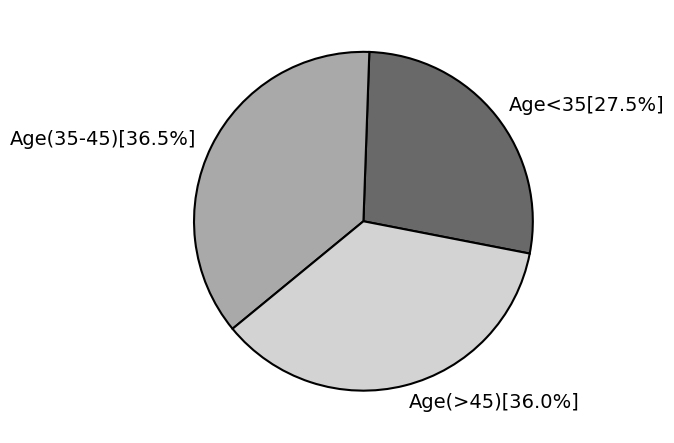

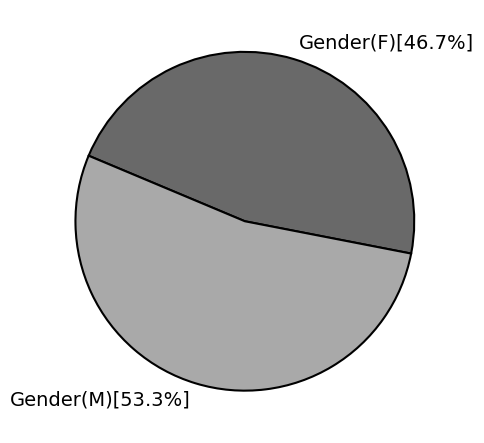

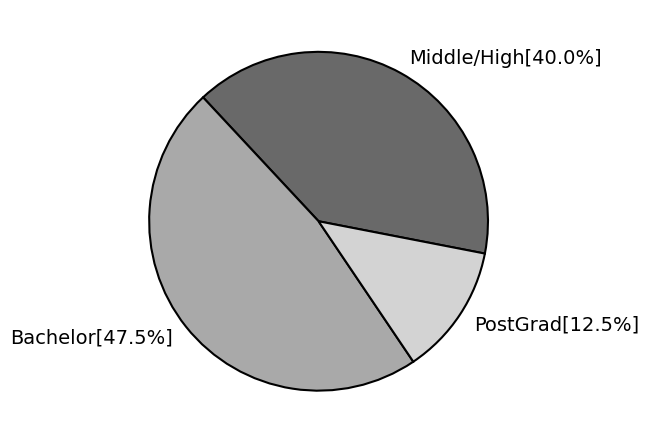

In [10]:
import json
import matplotlib.pyplot as plt
import numpy as np

# Load mturk
with open("./savedResults/compiled.json", 'r') as f:
    CompiledResults = json.load(f)

key = 'mturk'  # choose from these choices: inlab, mturk
folderpath = './plots_elisa/Task_' + key + '_'  # for saving the plots
conversation_trials = CompiledResults[key]['datastring']  # Note the different structure

# Define conditions
condition_list = ['ageL35','ageG35L45','ageG45','F','M','school','bachelor','postgrad']

condition_list_criteria = {'ageL35': ["18-20","21-25","26-30","31-35"], 'ageG35L45': ["36-40","41-45"], 
                           'ageG45': ["45-50","46-50"],
                           'F': ['female'],'M': ['male'], 'school': ["middle school","high school"],
                           'bachelor':['bachelor'],'postgrad': ['master','pg']}

condition_attribute = {'ageL35':'age','ageG35L45':'age','ageG45':'age',
                       'F' :'gender','M':'gender',
                       'school':'education','bachelor':'education','postgrad':'education'}

# Initialize counters
condition_numSubjs = {'ageL35':0,'ageG35L45':0,'ageG45':0,
                      'F' :0,'M':0,
                      'school':0,'bachelor':0,'postgrad':0}

# Count subjects based on their demographics
for subject_data in conversation_trials:
    # Extract demographic info from questiondata
    demographics = subject_data['questiondata']
    
    for condition_chosen in condition_list:
        attribute = condition_attribute[condition_chosen]
        if demographics[attribute] in condition_list_criteria[condition_chosen]:
            condition_numSubjs[condition_chosen] += 1

print("Subject counts:", condition_numSubjs)

# Your existing pie chart function (with the filter for zero values)
def plot_PieCharts(data, labels, startcolor, endcolor, folderpath, demoinfor):
    
    # Filter out zero values and their corresponding labels
    filtered_data = []
    filtered_labels = []
    for i, value in enumerate(data):
        if value > 0:  # Only include non-zero values
            filtered_data.append(value)
            filtered_labels.append(labels[i])
    
    # Check if we have any data left to plot
    if not filtered_data:
        print(f"No data to plot for {demoinfor} - all values are zero")
        return
    
    # Normalize the filtered data so that sum is 1
    datanorm = [float(i)/sum(filtered_data) for i in filtered_data]
    labels_actual = []
    for i, item in enumerate(datanorm):
        labels_actual.append(filtered_labels[i] + "[" + str("{:.1f}".format(item*100)) + "%]")
    
    colors = ['dimgray','darkgrey','lightgrey']
    colorlist = []
    for item in colors:
        colorlist.append(item)
    
    plt.figure(figsize=(8, 5.5))
    plt.pie(datanorm, labels=labels_actual, colors=colorlist, startangle=-11, 
            textprops={'fontsize': 14}, wedgeprops={'edgecolor': 'black', 'linewidth': 1.5})
    plt.savefig(folderpath + demoinfor + '_DemorDistri.eps', format='eps', bbox_inches='tight')
    plt.savefig(folderpath + demoinfor + '_DemorDistri.png', bbox_inches='tight')
    plt.show()

# Set colors
startColor = 'darkgrey'
EndColor = 'lightgrey'

# Generate pie charts
# Age distribution
agelist = np.array([condition_numSubjs['ageL35'],
                    condition_numSubjs['ageG35L45'],
                    condition_numSubjs['ageG45']])
mylabels = ["Age<35","Age(35-45)","Age(>45)"]
demoinfor = 'age'
plot_PieCharts(agelist, mylabels, startColor, EndColor, folderpath, demoinfor)

# Gender distribution
genderlist = np.array([condition_numSubjs['F'],condition_numSubjs['M']])
mylabels = ["Gender(F)",'Gender(M)']
demoinfor = 'gender'
plot_PieCharts(genderlist, mylabels, startColor, EndColor, folderpath, demoinfor)

# Education distribution
edulist = np.array([condition_numSubjs['school'],
                    condition_numSubjs['bachelor'], 
                    condition_numSubjs['postgrad']])
demoinfor = 'education'
mylabels = ["Middle/High","Bachelor","PostGrad"]
plot_PieCharts(edulist, mylabels, startColor, EndColor, folderpath, demoinfor)

In [33]:
import json
import numpy as np
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import pingouin as pg
from scipy import stats
import random
import math
import statsmodels.api as sm 
from statsmodels.formula.api import ols

def outputIconForStats(pval):
    if pval <= 0.05:
        icon = '*'
    else:
        icon = ' '
    return icon

def ConvertDictToDataFrame(datadict):
    X = []
    Y = []
    for key in datadict.keys():
        for ele in datadict[key]:
            X.append(ele)
            Y.append(key)
    data = {'X': X, 'group': Y}
    df = pd.DataFrame.from_dict(data)
    return df

def ComputeStats_group1(d_cond):
    #compare against chance
    r_data = np.random.choice([0, 1], size=len(d_cond), p=[.5, .5])
    result = pg.ttest(d_cond, r_data, correction=True) 
    pval = result.at['T-test',"p-val"]
    Tval = result.at['T-test',"T"]
    dof = math.floor(result.at['T-test',"dof"])
    icon = outputIconForStats(pval)
    return icon, pval, Tval, dof

def ComputeStats_group2(data_d1, data_d2):
    result = pg.ttest(data_d1, data_d2, correction=True) 
    pval = result.at['T-test',"p-val"]
    Tval = result.at['T-test',"T"]
    dof = math.floor(result.at['T-test',"dof"])
    icon = outputIconForStats(pval)
    return icon, pval, Tval, dof
    
def ComputeStats_group3(data_dict):
    df = ConvertDictToDataFrame(data_dict)
    mod = ols('X ~ group', data=df).fit()
    aov_table = sm.stats.anova_lm(mod, typ=2)
    BetweenGP_df = aov_table.df.group
    WithinGP_df = aov_table.df.Residual
    Fval = aov_table.F.group
    pval = aov_table['PR(>F)'].group
    icon = outputIconForStats(pval)
    return icon, BetweenGP_df, WithinGP_df, Fval, pval

def load_conversation_results_for_condition(condition_chosen, TextFilePath):
    """
    Load the saved conversation results for a specific demographic condition
    """
    results = {}
    
    # Map of result keys to accuracy and std filenames
    file_mapping = {
        # Accuracy files (single numbers)
        'H_responses_all': f'HclassH_demo{condition_chosen}.txt',
        'AI_responses_all': f'AIclassAI_demo{condition_chosen}.txt',
        'H_inHH_responses_all': f'HinHHclassH_demo{condition_chosen}.txt',
        'AI_inAIAI_responses_all': f'AIinAIAIclassAI_demo{condition_chosen}.txt',
        'H_inHAI_responses_all': f'HinHAIclassH_demo{condition_chosen}.txt',
        'AI_inHAI_responses_all': f'AIinHAIclassAI_demo{condition_chosen}.txt',
        'AIb_inAIAI_responses_all': f'AIbinAIAIclassAI_demo{condition_chosen}.txt',
        'AIb_inHAI_responses_all': f'AIbinHAIclassAI_demo{condition_chosen}.txt',
        'AId_inAIAI_responses_all': f'AIdinAIAIclassAI_demo{condition_chosen}.txt',
        'AId_inHAI_responses_all': f'AIdinHAIclassAI_demo{condition_chosen}.txt',
        'AIc_inAIAI_responses_all': f'AIcinAIAIclassAI_demo{condition_chosen}.txt',
        'AIc_inHAI_responses_all': f'AIcinHAIclassAI_demo{condition_chosen}.txt'
    }
    
    # Standard deviation files
    std_file_mapping = {
        'H_responses_all_std': f'HclassH_top1std_demo{condition_chosen}.txt',
        'AI_responses_all_std': f'AIclassAI_top1std_demo{condition_chosen}.txt',
        'H_inHH_responses_all_std': f'HinHHclassH_top1std_demo{condition_chosen}.txt',
        'AI_inAIAI_responses_all_std': f'AIinAIAIclassAI_top1std_demo{condition_chosen}.txt',
        'H_inHAI_responses_all_std': f'HinHAIclassH_top1std_demo{condition_chosen}.txt',
        'AI_inHAI_responses_all_std': f'AIinHAIclassAI_top1std_demo{condition_chosen}.txt',
        'AIb_inAIAI_responses_all_std': f'AIbinAIAIclassAI_top1std_demo{condition_chosen}.txt',
        'AIb_inHAI_responses_all_std': f'AIbinHAIclassAI_top1std_demo{condition_chosen}.txt',
        'AId_inAIAI_responses_all_std': f'AIdinAIAIclassAI_top1std_demo{condition_chosen}.txt',
        'AId_inHAI_responses_all_std': f'AIdinHAIclassAI_top1std_demo{condition_chosen}.txt',
        'AIc_inAIAI_responses_all_std': f'AIcinAIAIclassAI_top1std_demo{condition_chosen}.txt',
        'AIc_inHAI_responses_all_std': f'AIcinHAIclassAI_top1std_demo{condition_chosen}.txt'
    }
    
    # Raw data files for statistics (individual 0/1 values)
    raw_data_mapping = {
        'H_responses_all_raw': f'HclassH_demo{condition_chosen}_acc_per_image.txt',
        'AI_responses_all_raw': f'AIclassAI_demo{condition_chosen}_acc_per_image.txt',
        'H_inHH_responses_all_raw': f'HinHHclassH_demo{condition_chosen}_acc_per_image.txt',
        'AI_inAIAI_responses_all_raw': f'AIinAIAIclassAI_demo{condition_chosen}_acc_per_image.txt',
        'H_inHAI_responses_all_raw': f'HinHAIclassH_demo{condition_chosen}_acc_per_image.txt',
        'AI_inHAI_responses_all_raw': f'AIinHAIclassAI_demo{condition_chosen}_acc_per_image.txt',
        'AIb_inAIAI_responses_all_raw': f'AIbinAIAIclassAI_demo{condition_chosen}_acc_per_image.txt',
        'AIb_inHAI_responses_all_raw': f'AIbinHAIclassAI_demo{condition_chosen}_acc_per_image.txt',
        'AId_inAIAI_responses_all_raw': f'AIdinAIAIclassAI_demo{condition_chosen}_acc_per_image.txt',
        'AId_inHAI_responses_all_raw': f'AIdinHAIclassAI_demo{condition_chosen}_acc_per_image.txt',
        'AIc_inAIAI_responses_all_raw': f'AIcinAIAIclassAI_demo{condition_chosen}_acc_per_image.txt',
        'AIc_inHAI_responses_all_raw': f'AIcinHAIclassAI_demo{condition_chosen}_acc_per_image.txt'
    }
    
    # Load accuracy files
    for key, filename in file_mapping.items():
        try:
            filepath = TextFilePath + filename
            data = np.loadtxt(filepath)
            results[key] = float(data) if data.ndim == 0 else data
        except FileNotFoundError:
            print(f"Warning: File not found: {filepath}")
            results[key] = 0.0
        except Exception as e:
            print(f"Error loading {filepath}: {e}")
            results[key] = 0.0
    
    # Load std files
    for key, filename in std_file_mapping.items():
        try:
            filepath = TextFilePath + filename
            data = np.loadtxt(filepath)
            results[key] = float(data) if data.ndim == 0 else data
        except FileNotFoundError:
            print(f"Warning: File not found: {filepath}")
            results[key] = 0.0
        except Exception as e:
            print(f"Error loading {filepath}: {e}")
            results[key] = 0.0
    
    # Load raw data files for statistics
    for key, filename in raw_data_mapping.items():
        try:
            filepath = TextFilePath + filename
            data = np.loadtxt(filepath)
            results[key] = data if data.ndim > 0 else [float(data)]
        except FileNotFoundError:
            print(f"Warning: File not found: {filepath}")
            results[key] = np.array([])
        except Exception as e:
            print(f"Error loading {filepath}: {e}")
            results[key] = np.array([])
    
    return results

def compute_stats_and_plot_demographics(condition_chosen_list, TextFilePath, plotname, facebarcolor, key):
    """
    Compute statistics and create demographic comparison plots based on your structure
    """
    
    # Model list matching your confusion matrix structure
    modelist = ['Machine (ALL)',
                'Machine (ALL, M-M)',
                'Machine (ALL, H-M)',
                'Blenderbot (M-M)',
                'Blenderbot (H-M)',
                'GPT3 DaVinci (M-M)',
                'GPT3 DaVinci (H-M)',
                'GPT3 Curie (M-M)',
                'GPT3 Curie (H-M)']
    
    compiledAllConds = {}
    Pdata = {}
    
    # Initialize PData
    for model in modelist:
        Pdata[model] = {}
    
    # Load data for each condition
    for condition_chosen in condition_chosen_list:
        print(f"Loading data for condition: {condition_chosen}")
        
        # Load the results for this condition
        condition_data = load_conversation_results_for_condition(condition_chosen, TextFilePath)
        
        # Check if we have data
        if not any(isinstance(val, (int, float)) and val != 0 for key, val in condition_data.items() if not key.endswith('_std') and not key.endswith('_raw')):
            print(f"Warning: No data for condition '{condition_chosen}', skipping...")
            continue
        
        # Get accuracies and standard deviations from loaded files
        accuracies = [
            condition_data['AI_responses_all'],        # Machine (ALL)
            condition_data['AI_inAIAI_responses_all'], # Machine (ALL, M-M)
            condition_data['AI_inHAI_responses_all'],  # Machine (ALL, H-M)
            condition_data['AIb_inAIAI_responses_all'], # Blenderbot (M-M)
            condition_data['AIb_inHAI_responses_all'],  # Blenderbot (H-M)
            condition_data['AId_inAIAI_responses_all'], # GPT3 DaVinci (M-M)
            condition_data['AId_inHAI_responses_all'],  # GPT3 DaVinci (H-M)
            condition_data['AIc_inAIAI_responses_all'], # GPT3 Curie (M-M)
            condition_data['AIc_inHAI_responses_all']   # GPT3 Curie (H-M)
        ]
        
        stds = [
            condition_data['AI_responses_all_std'],        # Machine (ALL)
            condition_data['AI_inAIAI_responses_all_std'], # Machine (ALL, M-M)
            condition_data['AI_inHAI_responses_all_std'],  # Machine (ALL, H-M)
            condition_data['AIb_inAIAI_responses_all_std'], # Blenderbot (M-M)
            condition_data['AIb_inHAI_responses_all_std'],  # Blenderbot (H-M)
            condition_data['AId_inAIAI_responses_all_std'], # GPT3 DaVinci (M-M)
            condition_data['AId_inHAI_responses_all_std'],  # GPT3 DaVinci (H-M)
            condition_data['AIc_inAIAI_responses_all_std'], # GPT3 Curie (M-M)
            condition_data['AIc_inHAI_responses_all_std']   # GPT3 Curie (H-M)
        ]
        
        # Organize raw data for statistics
        raw_data_sequence = [
            condition_data['AI_responses_all_raw'],        # Machine (ALL)
            condition_data['AI_inAIAI_responses_all_raw'], # Machine (ALL, M-M)
            condition_data['AI_inHAI_responses_all_raw'],  # Machine (ALL, H-M)
            condition_data['AIb_inAIAI_responses_all_raw'], # Blenderbot (M-M)
            condition_data['AIb_inHAI_responses_all_raw'],  # Blenderbot (H-M)
            condition_data['AId_inAIAI_responses_all_raw'], # GPT3 DaVinci (M-M)
            condition_data['AId_inHAI_responses_all_raw'],  # GPT3 DaVinci (H-M)
            condition_data['AIc_inAIAI_responses_all_raw'], # GPT3 Curie (M-M)
            condition_data['AIc_inHAI_responses_all_raw']   # GPT3 Curie (H-M)
        ]
        
        # Store data for statistics
        for i, raw_data in enumerate(raw_data_sequence):
            Pdata[modelist[i]][condition_chosen] = raw_data
        
        compiledAllConds[condition_chosen] = accuracies
        compiledAllConds[condition_chosen + '_std'] = stds
    
    # Compute statistics
    chancePval = []
    groupPval = []
    
    # Get list of conditions that actually have data
    valid_conditions = [cond for cond in condition_chosen_list if cond in compiledAllConds]
    
    if not valid_conditions:
        print("No valid conditions found!")
        return
    
    for i, model in enumerate(modelist):
        # Compute against chance for each condition
        for condition_chosen in valid_conditions:
            d_cond = Pdata[model][condition_chosen]
            if len(d_cond) > 0:
                icon, pval, Tval, dof = ComputeStats_group1(d_cond)
                chancePval.append(icon)
            else:
                chancePval.append('n.s.')
        
        # Compute group comparisons
        valid_model_data = {cond: Pdata[model][cond] for cond in valid_conditions if len(Pdata[model][cond]) > 0}
        
        if len(valid_model_data) == 2:
            valid_cond_keys = list(valid_model_data.keys())
            data_d1 = valid_model_data[valid_cond_keys[0]]
            data_d2 = valid_model_data[valid_cond_keys[1]]
            icon, pval, Tval, dof = ComputeStats_group2(data_d1, data_d2)
            groupPval.append(icon)
        elif len(valid_model_data) >= 3:
            try:
                icon, BetweenGP_df, WithinGP_df, Fval, pval = ComputeStats_group3(valid_model_data)
                groupPval.append(icon)
            except:
                groupPval.append('n.s.')
        else:
            groupPval.append('n.s.')
    
    # Create the plot
    valid_facebarcolor = [facebarcolor[i] for i, cond in enumerate(condition_chosen_list) 
                          if cond in valid_conditions]
    
    # Figure Size
    fig, ax = plt.subplots(layout='constrained')
    x = np.arange(len(modelist))
    point_x = []
    
    width = 0.2
    if len(valid_conditions) == 2:
        multiplier = -0.5
    else:
        multiplier = -len(valid_conditions) / 2 + 0.5
    
    # Plot bars for each condition
    for ind, condition_chosen in enumerate(valid_conditions):
        measurement = compiledAllConds[condition_chosen]
        measurement_std = compiledAllConds[condition_chosen + '_std']
        
        offset = width * multiplier
        rects = ax.bar(x + offset, measurement, yerr=measurement_std, width=width, alpha=0.5,
                      label=condition_chosen, edgecolor='black', color=valid_facebarcolor[ind], ecolor='black')
        point_x.extend((x + offset).tolist())
        multiplier += 1
    
    # Add yellow rectangle (chance region)
    #ax.add_patch(Rectangle((-0.5, 0.45), len(modelist), 0.1, facecolor='yellow', alpha=0.3))
    
    # Plot statistics
    point_x.sort(reverse=False)
    for i, p in enumerate(point_x):        
        ax.text(p, .85, chancePval[i], fontsize=8, transform=ax.get_xaxis_transform())
    
    # Set labels and formatting
    ax.set_xticks(x)
    ax.set_xticklabels(modelist, rotation=45, ha='right')
    ax.legend(loc='upper left', ncols=len(valid_conditions), frameon=False)
    
    # Plot group statistics
    totalPx = len(point_x)
    count = 0
    for s1 in range(0, totalPx, len(valid_conditions)):
        center_x = 0
        for s2 in range(len(valid_conditions)):
            if s1 + s2 < len(point_x):
                center_x += point_x[s1 + s2]
        center_x = center_x / len(valid_conditions)
        starting_x = point_x[s1]
        ending_x = point_x[s1 + len(valid_conditions) - 1] if s1 + len(valid_conditions) - 1 < len(point_x) else point_x[-1]
        plt.plot(np.array([starting_x, ending_x]),
                np.arange(2) * 0 + 0.89, 'k-', linewidth=1)
        if count < len(groupPval):
            ax.text(center_x, .93, groupPval[count], fontsize=8, transform=ax.get_xaxis_transform())
        count += 1
    
    plt.ylabel('Imitation detectability', fontsize=14)
    plt.ylim(0, 1)
    
    # Draw chance line
    chancex = np.arange(len(modelist) + 1) - 0.5
    plt.plot(chancex, np.arange(len(chancex)) * 0 + 0.5, 'k--', label='chance (50%)', alpha=0.7)
    
    fig.tight_layout()
    fig.set_figwidth(12)
    fig.set_figheight(6)
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    plt.savefig(plotname + '.eps', format='eps', bbox_inches='tight')
    plt.savefig(plotname + '.png', bbox_inches='tight')
    plt.show()



Loading data for condition: ageL35
Loading data for condition: ageG35L45
Loading data for condition: ageG45


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


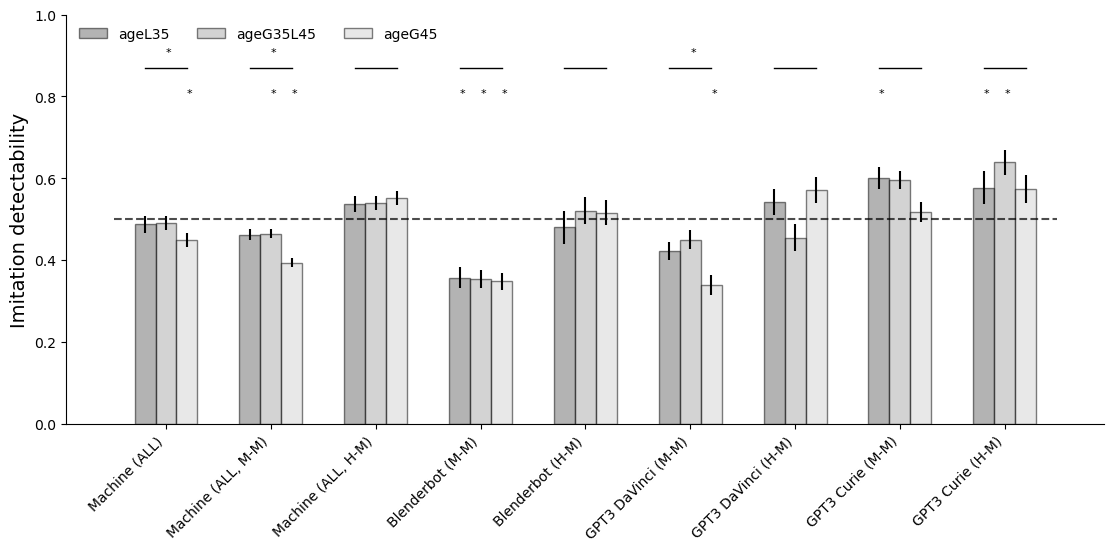

Loading data for condition: F
Loading data for condition: M


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


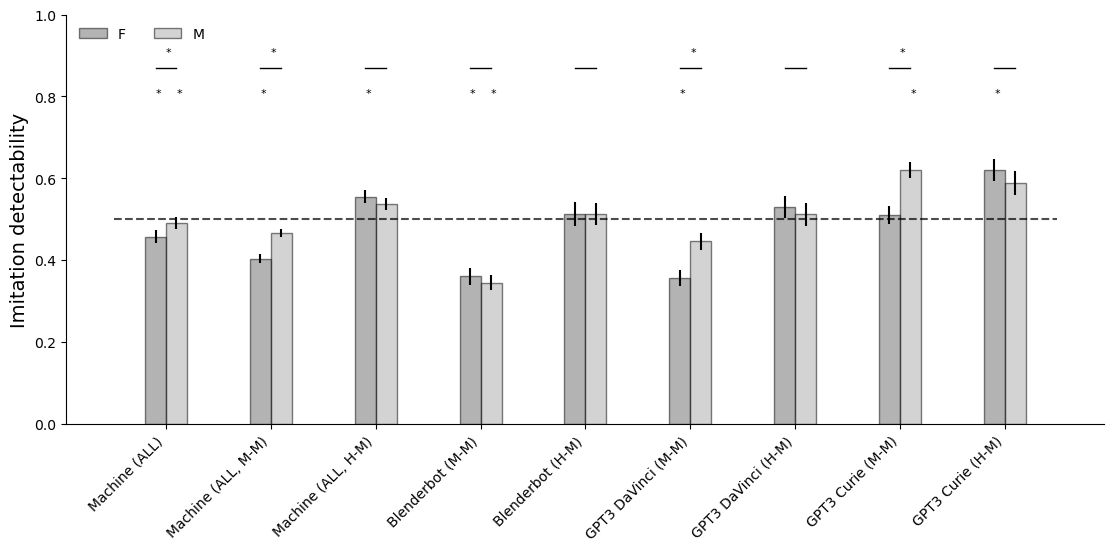

Loading data for condition: school
Loading data for condition: bachelor
Loading data for condition: postgrad


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


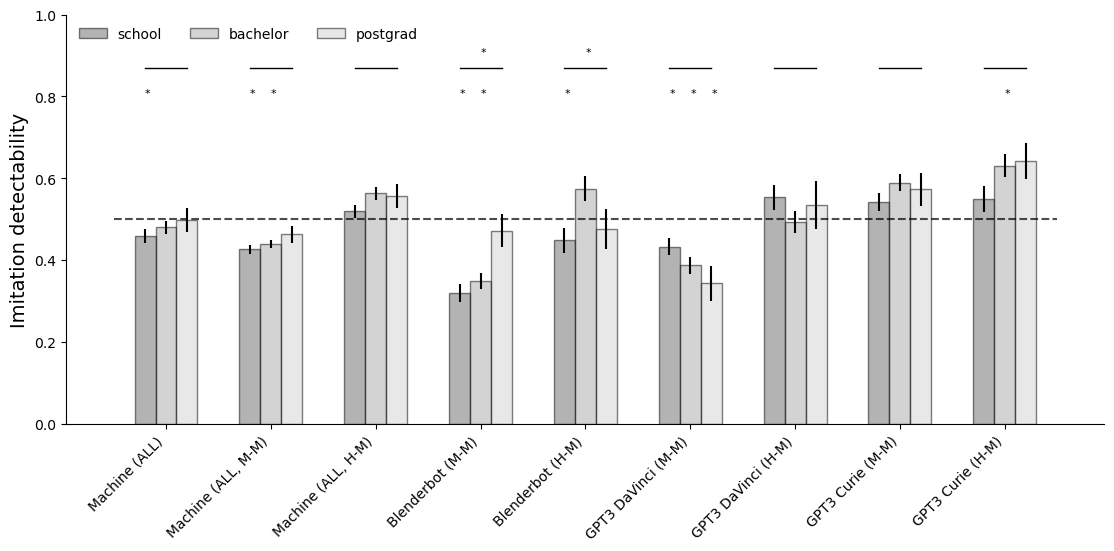

In [26]:
# Usage example - adapt this to your needs:
key = 'mturk'  # or 'mturk', 'inlab'
TextFilePath = f'./savedResults/Task3_{key}_'

# Age comparison
condition_chosen_list = ['ageL35', 'ageG35L45', 'ageG45']
plotpathname = f'./plots_elisa/Task3_{key}_demor_AgeBarPlotOverall'
facebarcolor = ['dimgray', 'darkgrey', 'lightgrey']
compute_stats_and_plot_demographics(condition_chosen_list, TextFilePath, plotpathname, facebarcolor, key)

# Gender comparison  
condition_chosen_list = ['F', 'M']
plotpathname = f'./plots_elisa/Task3_{key}_demor_GenderBarPlotOverall'
facebarcolor = ['dimgray', 'darkgrey']
compute_stats_and_plot_demographics(condition_chosen_list, TextFilePath, plotpathname, facebarcolor, key)

# Education comparison
condition_chosen_list = ['school', 'bachelor', 'postgrad']
plotpathname = f'./plots_elisa/Task3_{key}_demor_EducationBarPlotOverall'
facebarcolor = ['dimgray', 'darkgrey', 'lightgrey']
compute_stats_and_plot_demographics(condition_chosen_list, TextFilePath, plotpathname, facebarcolor, key)

# Demographic AI experts

In [14]:
with open("./savedResults/compiled_elisa_AIexperts_may2.json", 'r') as f:
    CompiledResults = json.load(f)

key = 'AIexperts'  # choose from these choices: inlab, mturk
folderpath = './plots_elisa/Task_' + key + '_'  # for saving the plots
conversation_trials = CompiledResults[key]['datastring']  # Note the different structure

# Define conditions
condition_list = ['ageL35','ageG35L45','ageG45','F','M','school','bachelor','postgrad']

condition_list_criteria = {'ageL35': ["18-20","21-25","26-30","31-35"], 'ageG35L45': ["36-40","41-45"], 
                           'ageG45': ["45-50","46-50"],
                           'F': ['female'],'M': ['male'], 'school': ["middle school","high school"],
                           'bachelor':['bachelor'],'postgrad': ['master','pg']}

condition_attribute = {'ageL35':'age','ageG35L45':'age','ageG45':'age',
                       'F' :'gender','M':'gender',
                       'school':'education','bachelor':'education','postgrad':'education'}

# Initialize counters
condition_numSubjs = {'ageL35':0,'ageG35L45':0,'ageG45':0,
                      'F' :0,'M':0,
                      'school':0,'bachelor':0,'postgrad':0}

# Count subjects based on their demographics
for subject_data in conversation_trials:
    # Extract demographic info from questiondata
    demographics = subject_data['questiondata']
    
    for condition_chosen in condition_list:
        attribute = condition_attribute[condition_chosen]
        if demographics[attribute] in condition_list_criteria[condition_chosen]:
            condition_numSubjs[condition_chosen] += 1

print("Subject counts:", condition_numSubjs)

Subject counts: {'ageL35': 12, 'ageG35L45': 0, 'ageG45': 0, 'F': 4, 'M': 8, 'school': 1, 'bachelor': 4, 'postgrad': 7}


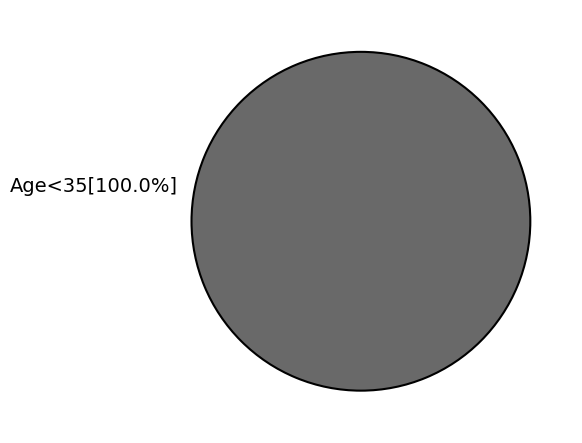

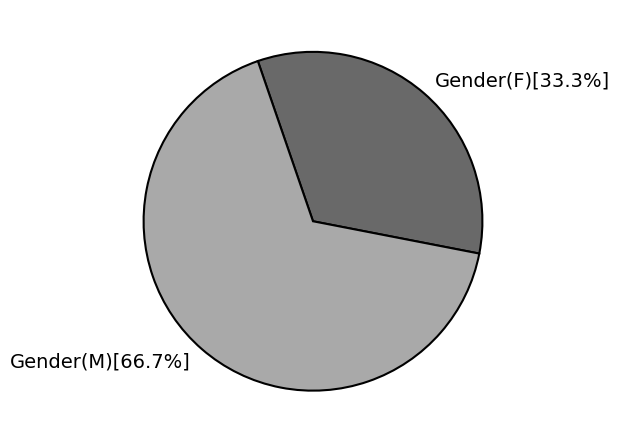

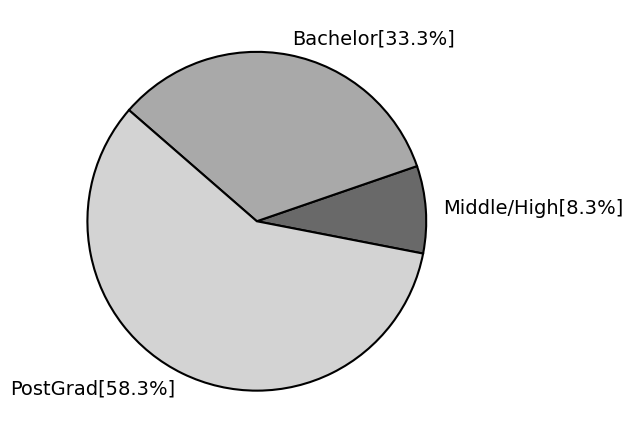

In [15]:
# Set colors
startColor = 'darkgrey'
EndColor = 'lightgrey'

# Generate pie charts
# Age distribution
agelist = np.array([condition_numSubjs['ageL35'],
                    condition_numSubjs['ageG35L45'],
                    condition_numSubjs['ageG45']])
mylabels = ["Age<35","Age(35-45)","Age(>45)"]
demoinfor = 'age'
plot_PieCharts(agelist, mylabels, startColor, EndColor, folderpath, demoinfor)

# Gender distribution
genderlist = np.array([condition_numSubjs['F'],condition_numSubjs['M']])
mylabels = ["Gender(F)",'Gender(M)']
demoinfor = 'gender'
plot_PieCharts(genderlist, mylabels, startColor, EndColor, folderpath, demoinfor)

# Education distribution
edulist = np.array([condition_numSubjs['school'],
                    condition_numSubjs['bachelor'], 
                    condition_numSubjs['postgrad']])
demoinfor = 'education'
mylabels = ["Middle/High","Bachelor","PostGrad"]
plot_PieCharts(edulist, mylabels, startColor, EndColor, folderpath, demoinfor)

Loading data for condition: F
Loading data for condition: M


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


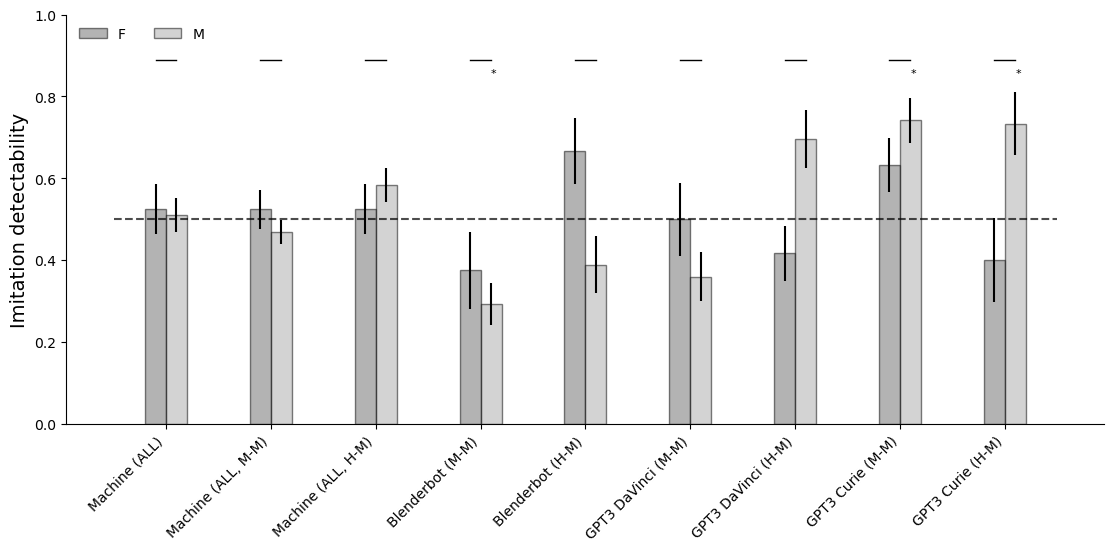

Loading data for condition: school
Loading data for condition: bachelor
Loading data for condition: postgrad


/Users/elisapavarino/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_stats_py.py:1253: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/Users/elisapavarino/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_stats_py.py:1253: RuntimeWarning: invalid value encountered in double_scalars
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/Users/elisapavarino/opt/anaconda3/lib/python3.8/site-packages/pingouin/parametric.py:243: RuntimeWarning: Degrees of freedom <= 0 for slice
  se = np.sqrt(x.var(ddof=1) / nx)
/Users/elisapavarino/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/elisapavarino/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof

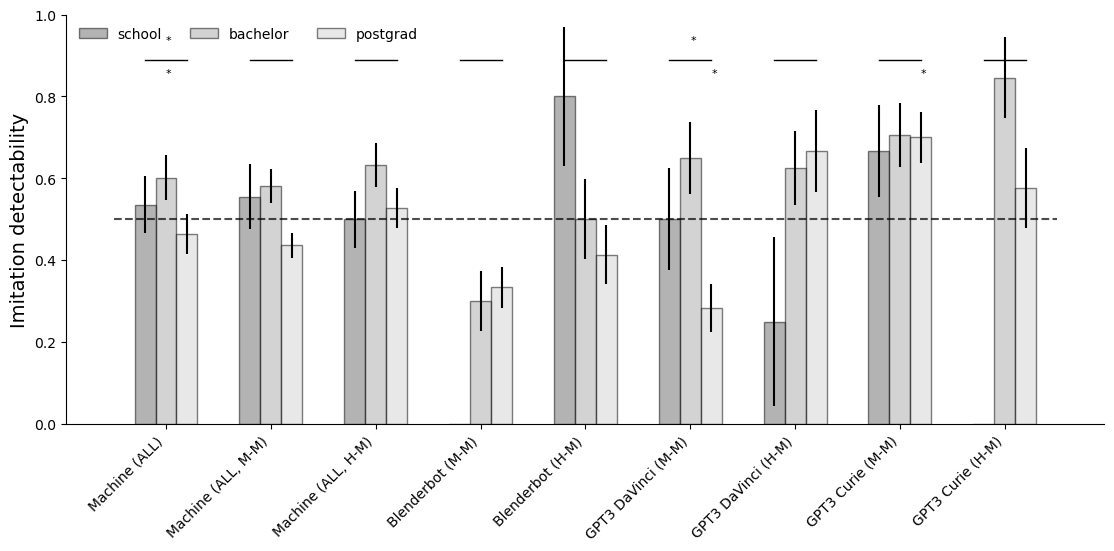

In [34]:
key = 'AIexperts'  # or 'mturk', 'inlab'
TextFilePath = f'./savedResults_elisa/Task3_{key}_'

# Age comparison
# condition_chosen_list = ['ageL35', 'ageG35L45', 'ageG45']
# plotpathname = f'./plots_elisa/Task3_{key}_demor_AgeBarPlotOverall'
# facebarcolor = ['dimgray', 'darkgrey', 'lightgrey']
# compute_stats_and_plot_demographics(condition_chosen_list, TextFilePath, plotpathname, facebarcolor, key)

# Gender comparison  
condition_chosen_list = ['F', 'M']
plotpathname = f'./plots_elisa/Task3_{key}_demor_GenderBarPlotOverall'
facebarcolor = ['dimgray', 'darkgrey']
compute_stats_and_plot_demographics(condition_chosen_list, TextFilePath, plotpathname, facebarcolor, key)

# Education comparison
condition_chosen_list = ['school', 'bachelor', 'postgrad']
plotpathname = f'./plots_elisa/Task3_{key}_demor_EducationBarPlotOverall'
facebarcolor = ['dimgray', 'darkgrey', 'lightgrey']
compute_stats_and_plot_demographics(condition_chosen_list, TextFilePath, plotpathname, facebarcolor, key)

In [42]:
import json
import numpy as np
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import pingouin as pg
from scipy import stats
import random
import math
import statsmodels.api as sm 
from statsmodels.formula.api import ols

def outputIconForStats(pval):
    if pval <= 0.05:
        icon = '*'
    else:
        icon = ' '
    return icon

def ConvertDictToDataFrame(datadict):
    X = []
    Y = []
    for key in datadict.keys():
        for ele in datadict[key]:
            X.append(ele)
            Y.append(key)
    data = {'X': X, 'group': Y}
    df = pd.DataFrame.from_dict(data)
    return df

def ComputeStats_group1(d_cond):
    # Handle empty data
    if len(d_cond) == 0:
        return 'n.s.', 1.0, 0, 0
    
    #compare against chance
    r_data = np.random.choice([0, 1], size=len(d_cond), p=[.5, .5])
    result = pg.ttest(d_cond, r_data, correction=True) 
    pval = result.at['T-test',"p-val"]
    Tval = result.at['T-test',"T"]
    dof = math.floor(result.at['T-test',"dof"])
    icon = outputIconForStats(pval)
    return icon, pval, Tval, dof

def ComputeStats_group2(data_d1, data_d2):
    # Handle empty data
    if len(data_d1) == 0 or len(data_d2) == 0:
        return ' ', 1.0, 0, 0
    
    result = pg.ttest(data_d1, data_d2, correction=True) 
    pval = result.at['T-test',"p-val"]
    Tval = result.at['T-test',"T"]
    dof = math.floor(result.at['T-test',"dof"])
    icon = outputIconForStats(pval)
    return icon, pval, Tval, dof
    
def ComputeStats_group3(data_dict):
    # Filter out empty data
    filtered_dict = {k: v for k, v in data_dict.items() if len(v) > 0}
    
    if len(filtered_dict) < 2:
        return ' ', 0, 0, 0, 1.0
    
    try:
        df = ConvertDictToDataFrame(filtered_dict)
        mod = ols('X ~ group', data=df).fit()
        aov_table = sm.stats.anova_lm(mod, typ=2)
        BetweenGP_df = aov_table.df.group
        WithinGP_df = aov_table.df.Residual
        Fval = aov_table.F.group
        pval = aov_table['PR(>F)'].group
        icon = outputIconForStats(pval)
        return icon, BetweenGP_df, WithinGP_df, Fval, pval
    except Exception as e:
        print(f"Warning: ANOVA failed: {e}")
        return ' ', 0, 0, 0, 1.0

def load_conversation_results_for_condition(condition_chosen, TextFilePath):
    """
    Load the saved conversation results for a specific demographic condition
    """
    results = {}
    
    # Map of result keys to accuracy and std filenames
    file_mapping = {
        # Accuracy files (single numbers)
        'H_responses_all': f'HclassH_demo{condition_chosen}.txt',
        'AI_responses_all': f'AIclassAI_demo{condition_chosen}.txt',
        'H_inHH_responses_all': f'HinHHclassH_demo{condition_chosen}.txt',
        'AI_inAIAI_responses_all': f'AIinAIAIclassAI_demo{condition_chosen}.txt',
        'H_inHAI_responses_all': f'HinHAIclassH_demo{condition_chosen}.txt',
        'AI_inHAI_responses_all': f'AIinHAIclassAI_demo{condition_chosen}.txt',
        'AIb_inAIAI_responses_all': f'AIbinAIAIclassAI_demo{condition_chosen}.txt',
        'AIb_inHAI_responses_all': f'AIbinHAIclassAI_demo{condition_chosen}.txt',
        'AId_inAIAI_responses_all': f'AIdinAIAIclassAI_demo{condition_chosen}.txt',
        'AId_inHAI_responses_all': f'AIdinHAIclassAI_demo{condition_chosen}.txt',
        'AIc_inAIAI_responses_all': f'AIcinAIAIclassAI_demo{condition_chosen}.txt',
        'AIc_inHAI_responses_all': f'AIcinHAIclassAI_demo{condition_chosen}.txt'
    }
    
    # Standard deviation files
    std_file_mapping = {
        'H_responses_all_std': f'HclassH_top1std_demo{condition_chosen}.txt',
        'AI_responses_all_std': f'AIclassAI_top1std_demo{condition_chosen}.txt',
        'H_inHH_responses_all_std': f'HinHHclassH_top1std_demo{condition_chosen}.txt',
        'AI_inAIAI_responses_all_std': f'AIinAIAIclassAI_top1std_demo{condition_chosen}.txt',
        'H_inHAI_responses_all_std': f'HinHAIclassH_top1std_demo{condition_chosen}.txt',
        'AI_inHAI_responses_all_std': f'AIinHAIclassAI_top1std_demo{condition_chosen}.txt',
        'AIb_inAIAI_responses_all_std': f'AIbinAIAIclassAI_top1std_demo{condition_chosen}.txt',
        'AIb_inHAI_responses_all_std': f'AIbinHAIclassAI_top1std_demo{condition_chosen}.txt',
        'AId_inAIAI_responses_all_std': f'AIdinAIAIclassAI_top1std_demo{condition_chosen}.txt',
        'AId_inHAI_responses_all_std': f'AIdinHAIclassAI_top1std_demo{condition_chosen}.txt',
        'AIc_inAIAI_responses_all_std': f'AIcinAIAIclassAI_top1std_demo{condition_chosen}.txt',
        'AIc_inHAI_responses_all_std': f'AIcinHAIclassAI_top1std_demo{condition_chosen}.txt'
    }
    
    # Raw data files for statistics (individual 0/1 values)
    raw_data_mapping = {
        'H_responses_all_raw': f'HclassH_demo{condition_chosen}_acc_per_image.txt',
        'AI_responses_all_raw': f'AIclassAI_demo{condition_chosen}_acc_per_image.txt',
        'H_inHH_responses_all_raw': f'HinHHclassH_demo{condition_chosen}_acc_per_image.txt',
        'AI_inAIAI_responses_all_raw': f'AIinAIAIclassAI_demo{condition_chosen}_acc_per_image.txt',
        'H_inHAI_responses_all_raw': f'HinHAIclassH_demo{condition_chosen}_acc_per_image.txt',
        'AI_inHAI_responses_all_raw': f'AIinHAIclassAI_demo{condition_chosen}_acc_per_image.txt',
        'AIb_inAIAI_responses_all_raw': f'AIbinAIAIclassAI_demo{condition_chosen}_acc_per_image.txt',
        'AIb_inHAI_responses_all_raw': f'AIbinHAIclassAI_demo{condition_chosen}_acc_per_image.txt',
        'AId_inAIAI_responses_all_raw': f'AIdinAIAIclassAI_demo{condition_chosen}_acc_per_image.txt',
        'AId_inHAI_responses_all_raw': f'AIdinHAIclassAI_demo{condition_chosen}_acc_per_image.txt',
        'AIc_inAIAI_responses_all_raw': f'AIcinAIAIclassAI_demo{condition_chosen}_acc_per_image.txt',
        'AIc_inHAI_responses_all_raw': f'AIcinHAIclassAI_demo{condition_chosen}_acc_per_image.txt'
    }
    
    # Load accuracy files
    for key, filename in file_mapping.items():
        try:
            filepath = TextFilePath + filename
            data = np.loadtxt(filepath)
            results[key] = float(data) if data.ndim == 0 else data
        except FileNotFoundError:
            print(f"Warning: File not found: {filepath}")
            results[key] = 0.0
        except Exception as e:
            print(f"Error loading {filepath}: {e}")
            results[key] = 0.0
    
    # Load std files
    for key, filename in std_file_mapping.items():
        try:
            filepath = TextFilePath + filename
            data = np.loadtxt(filepath)
            results[key] = float(data) if data.ndim == 0 else data
        except FileNotFoundError:
            print(f"Warning: File not found: {filepath}")
            results[key] = 0.0
        except Exception as e:
            print(f"Error loading {filepath}: {e}")
            results[key] = 0.0
    
    # Load raw data files for statistics
    for key, filename in raw_data_mapping.items():
        try:
            filepath = TextFilePath + filename
            data = np.loadtxt(filepath)
            results[key] = data if data.ndim > 0 else [float(data)]
        except FileNotFoundError:
            print(f"Warning: File not found: {filepath}")
            results[key] = np.array([])
        except Exception as e:
            print(f"Error loading {filepath}: {e}")
            results[key] = np.array([])
    
    return results

def has_valid_data(condition_data):
    """Check if condition has any valid non-zero data"""
    # Check if any accuracy values are non-zero
    accuracy_keys = [k for k in condition_data.keys() if not k.endswith('_std') and not k.endswith('_raw')]
    has_accuracy_data = any(isinstance(condition_data[key], (int, float)) and condition_data[key] != 0 
                           for key in accuracy_keys)
    
    # Check if any raw data exists
    raw_keys = [k for k in condition_data.keys() if k.endswith('_raw')]
    has_raw_data = any(len(condition_data[key]) > 0 for key in raw_keys)
    
    return has_accuracy_data or has_raw_data

def compute_stats_and_plot_demographics(condition_chosen_list, TextFilePath, plotname, facebarcolor, key):
    """
    Compute statistics and create demographic comparison plots based on your structure
    """
    
    # Model list matching your confusion matrix structure
    modelist = ['Machine (ALL)',
                'Machine (ALL, M-M)',
                'Machine (ALL, H-M)',
                'Blenderbot (M-M)',
                'Blenderbot (H-M)',
                'GPT3 DaVinci (M-M)',
                'GPT3 DaVinci (H-M)',
                'GPT3 Curie (M-M)',
                'GPT3 Curie (H-M)']
    
    compiledAllConds = {}
    Pdata = {}
    
    # Initialize PData
    for model in modelist:
        Pdata[model] = {}
    
    # Load data for each condition
    for i, condition_chosen in enumerate(condition_chosen_list):
        print(f"Loading data for condition: {condition_chosen}")
        
        # Load the results for this condition
        condition_data = load_conversation_results_for_condition(condition_chosen, TextFilePath)
        
        # Get accuracies and standard deviations from loaded files
        accuracies = [
            condition_data['AI_responses_all'],        # Machine (ALL)
            condition_data['AI_inAIAI_responses_all'], # Machine (ALL, M-M)
            condition_data['AI_inHAI_responses_all'],  # Machine (ALL, H-M)
            condition_data['AIb_inAIAI_responses_all'], # Blenderbot (M-M)
            condition_data['AIb_inHAI_responses_all'],  # Blenderbot (H-M)
            condition_data['AId_inAIAI_responses_all'], # GPT3 DaVinci (M-M)
            condition_data['AId_inHAI_responses_all'],  # GPT3 DaVinci (H-M)
            condition_data['AIc_inAIAI_responses_all'], # GPT3 Curie (M-M)
            condition_data['AIc_inHAI_responses_all']   # GPT3 Curie (H-M)
        ]
        
        stds = [
            condition_data['AI_responses_all_std'],        # Machine (ALL)
            condition_data['AI_inAIAI_responses_all_std'], # Machine (ALL, M-M)
            condition_data['AI_inHAI_responses_all_std'],  # Machine (ALL, H-M)
            condition_data['AIb_inAIAI_responses_all_std'], # Blenderbot (M-M)
            condition_data['AIb_inHAI_responses_all_std'],  # Blenderbot (H-M)
            condition_data['AId_inAIAI_responses_all_std'], # GPT3 DaVinci (M-M)
            condition_data['AId_inHAI_responses_all_std'],  # GPT3 DaVinci (H-M)
            condition_data['AIc_inAIAI_responses_all_std'], # GPT3 Curie (M-M)
            condition_data['AIc_inHAI_responses_all_std']   # GPT3 Curie (H-M)
        ]
        
        # Organize raw data for statistics
        raw_data_sequence = [
            condition_data['AI_responses_all_raw'],        # Machine (ALL)
            condition_data['AI_inAIAI_responses_all_raw'], # Machine (ALL, M-M)
            condition_data['AI_inHAI_responses_all_raw'],  # Machine (ALL, H-M)
            condition_data['AIb_inAIAI_responses_all_raw'], # Blenderbot (M-M)
            condition_data['AIb_inHAI_responses_all_raw'],  # Blenderbot (H-M)
            condition_data['AId_inAIAI_responses_all_raw'], # GPT3 DaVinci (M-M)
            condition_data['AId_inHAI_responses_all_raw'],  # GPT3 DaVinci (H-M)
            condition_data['AIc_inAIAI_responses_all_raw'], # GPT3 Curie (M-M)
            condition_data['AIc_inHAI_responses_all_raw']   # GPT3 Curie (H-M)
        ]
        
        # Store data for statistics
        for j, raw_data in enumerate(raw_data_sequence):
            # Ensure raw_data is always an array, even if empty
            if isinstance(raw_data, (int, float)):
                raw_data = np.array([raw_data])
            elif not isinstance(raw_data, np.ndarray):
                raw_data = np.array(raw_data) if raw_data is not None else np.array([])
            
            Pdata[modelist[j]][condition_chosen] = raw_data
        
        compiledAllConds[condition_chosen] = accuracies
        compiledAllConds[condition_chosen + '_std'] = stds
    
    # Filter out conditions with no valid data
    valid_conditions = []
    valid_condition_indices = []
    
    for i, condition_chosen in enumerate(condition_chosen_list):
        if condition_chosen in compiledAllConds:
            # Check if condition has any non-zero accuracy data
            accuracies = compiledAllConds[condition_chosen]
            if any(acc > 0 for acc in accuracies):
                valid_conditions.append(condition_chosen)
                valid_condition_indices.append(i)
            else:
                print(f"Warning: Condition '{condition_chosen}' has no valid data, skipping...")
                # Remove from compiled data
                del compiledAllConds[condition_chosen]
                del compiledAllConds[condition_chosen + '_std']
    
    # Check if we have any valid conditions
    if not valid_conditions:
        print("No valid conditions found! Cannot create plot.")
        return
    
    print(f"Valid conditions: {valid_conditions}")
    
    # Compute statistics
    chancePval = []
    groupPval = []
    
    for i, model in enumerate(modelist):
        # Compute against chance for each condition
        for condition_chosen in valid_conditions:
            d_cond = Pdata[model][condition_chosen]
            icon, pval, Tval, dof = ComputeStats_group1(d_cond)
            chancePval.append(icon)
        
        # Compute group comparisons
        valid_model_data = {cond: Pdata[model][cond] for cond in valid_conditions 
                           if len(Pdata[model][cond]) > 0}
        
        if len(valid_model_data) == 2:
            valid_cond_keys = list(valid_model_data.keys())
            data_d1 = valid_model_data[valid_cond_keys[0]]
            data_d2 = valid_model_data[valid_cond_keys[1]]
            icon, pval, Tval, dof = ComputeStats_group2(data_d1, data_d2)
            groupPval.append(icon)
        elif len(valid_model_data) >= 3:
            try:
                icon, BetweenGP_df, WithinGP_df, Fval, pval = ComputeStats_group3(valid_model_data)
                groupPval.append(icon)
            except Exception as e:
                print(f"Warning: Group stats failed for {model}: {e}")
                groupPval.append('')
        else:
            groupPval.append('')
    
    # Create the plot with only valid conditions
    valid_facebarcolor = [facebarcolor[i] for i in valid_condition_indices]
    
    # Figure Size
    fig, ax = plt.subplots(layout='constrained')
    x = np.arange(len(modelist))
    point_x = []
    
    width = 0.2
    if len(valid_conditions) == 2:
        multiplier = -0.5
    else:
        multiplier = -len(valid_conditions) / 2 + 0.5
    
    # Plot bars for each valid condition
    for ind, condition_chosen in enumerate(valid_conditions):
        measurement = compiledAllConds[condition_chosen]
        measurement_std = compiledAllConds[condition_chosen + '_std']
        
        offset = width * multiplier
        rects = ax.bar(x + offset, measurement, yerr=measurement_std, width=width, alpha=0.5,
                      label=condition_chosen, edgecolor='black', color=valid_facebarcolor[ind], ecolor='black')
        point_x.extend((x + offset).tolist())
        multiplier += 1
    
    # Plot statistics
    point_x.sort(reverse=False)
    for i, p in enumerate(point_x):        
        ax.text(p, .85, chancePval[i], fontsize=8, transform=ax.get_xaxis_transform())
    
    # Set labels and formatting
    ax.set_xticks(x)
    ax.set_xticklabels(modelist, rotation=45, ha='right')
    ax.legend(loc='upper left', ncols=len(valid_conditions), frameon=False)
    
    # Plot group statistics
    totalPx = len(point_x)
    count = 0
    for s1 in range(0, totalPx, len(valid_conditions)):
        center_x = 0
        for s2 in range(len(valid_conditions)):
            if s1 + s2 < len(point_x):
                center_x += point_x[s1 + s2]
        center_x = center_x / len(valid_conditions)
        starting_x = point_x[s1]
        ending_x = point_x[s1 + len(valid_conditions) - 1] if s1 + len(valid_conditions) - 1 < len(point_x) else point_x[-1]
        plt.plot(np.array([starting_x, ending_x]),
                np.arange(2) * 0 + 0.89, 'k-', linewidth=1)
        if count < len(groupPval):
            ax.text(center_x, .93, groupPval[count], fontsize=8, transform=ax.get_xaxis_transform())
        count += 1
    
    plt.ylabel('Imitation detectability', fontsize=14)
    plt.ylim(0, 1)
    
    # Draw chance line
    chancex = np.arange(len(modelist) + 1) - 0.5
    plt.plot(chancex, np.arange(len(chancex)) * 0 + 0.5, 'k--', label='chance (50%)', alpha=0.7)
    
    fig.tight_layout()
    fig.set_figwidth(12)
    fig.set_figheight(6)
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    plt.savefig(plotname + '.eps', format='eps', bbox_inches='tight')
    plt.savefig(plotname + '.png', bbox_inches='tight')
    plt.show()

Loading data for condition: ageL35
Loading data for condition: ageG35L45
Loading data for condition: ageG45
Valid conditions: ['ageL35']


/var/folders/5y/60d837ps00s6_lbr07dlqtwh0000gn/T/ipykernel_52462/2794593541.py:164: UserWarning: loadtxt: input contained no data: "./savedResults_elisa/Task3_AIexperts_HclassH_demoageG35L45_acc_per_image.txt"
  data = np.loadtxt(filepath)
/var/folders/5y/60d837ps00s6_lbr07dlqtwh0000gn/T/ipykernel_52462/2794593541.py:164: UserWarning: loadtxt: input contained no data: "./savedResults_elisa/Task3_AIexperts_AIclassAI_demoageG35L45_acc_per_image.txt"
  data = np.loadtxt(filepath)
/var/folders/5y/60d837ps00s6_lbr07dlqtwh0000gn/T/ipykernel_52462/2794593541.py:164: UserWarning: loadtxt: input contained no data: "./savedResults_elisa/Task3_AIexperts_HinHHclassH_demoageG35L45_acc_per_image.txt"
  data = np.loadtxt(filepath)
/var/folders/5y/60d837ps00s6_lbr07dlqtwh0000gn/T/ipykernel_52462/2794593541.py:164: UserWarning: loadtxt: input contained no data: "./savedResults_elisa/Task3_AIexperts_AIinAIAIclassAI_demoageG35L45_acc_per_image.txt"
  data = np.loadtxt(filepath)
/var/folders/5y/60d837ps00

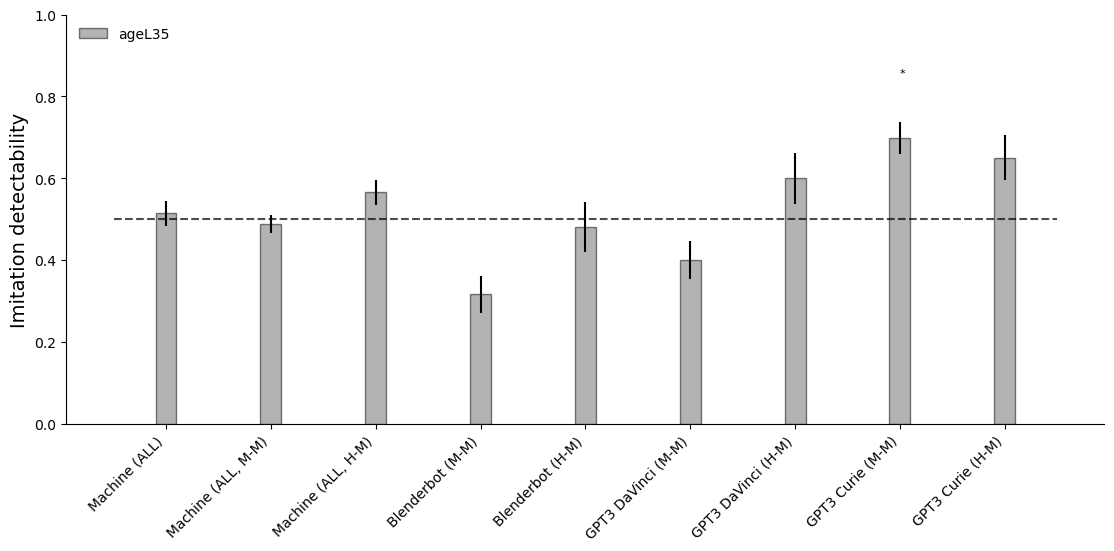

In [43]:

# Age comparison
condition_chosen_list = ['ageL35', 'ageG35L45', 'ageG45']
plotpathname = f'./plots_elisa/Task3_{key}_demor_AgeBarPlotOverall'
facebarcolor = ['dimgray', 'darkgrey', 'lightgrey']
compute_stats_and_plot_demographics(condition_chosen_list, TextFilePath, plotpathname, facebarcolor, key)